In [1]:
import pandas as pd 
import numpy as np 
import os

#To allow markdowns in Python Cells: 
from IPython.display import display, Markdown 
# display (Markdown("# Hello world!"))

#To Plot Pretty Figures:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12) 
%matplotlib inline

# allowing for any single variable to print out without using the print statement: 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Path to access images
from pathlib import Path

from tensorflow import keras
# in-built keras image pre-processing library 
from keras.preprocessing import image

# Path to folders with trainin g data
parasitized_path = Path(r'C:\Users\kgajera\Music\600\PROJECT\cell_images') / 'Parasitized'
not_parasitized_path = Path(r'C:\Users\kgajera\Music\600\PROJECT\cell_images') / 'Uninfected'

# making sure the directories exist 
parasitized_path.is_dir() 
not_parasitized_path.is_dir()



True

True

In [3]:
images = []
labels = []

In [31]:
# import library to resize images: 
from skimage import transform
# setting the new shape of image: 
new_shape = (50, 50, 3)

In [ ]:
import warnings;
warnings.filterwarnings('ignore');
from tensorflow.keras.preprocessing import image

# Load all the non-malaria images and setting their y label as 0 
for img in not_parasitized_path.glob("*.png"):



    # Load the image from disk
    img = keras.preprocessing.image.load_img(img)

    # Convert the image to a numpy array
    image_array = keras.preprocessing.image.img_to_array(img)
    
    # resize the image (must be done after it has turned into a np array):
    image_array = transform.resize(image_array, new_shape, anti_aliasing=True)
    
    # scaling the image data to fall between 0-1 since images have 255 brightness values: 
    image_array /= 255
    
    # Add the image to the list of images
    images.append(image_array)
    
    # For each 'not parasitized' image, the expected value should be o
    labels.append(0)

Text(0.5, 1.0, 'Sample Uninfected Cell')

'Dimensions of image:'

(50, 50, 3)

'Images Labels we have imported thus far:'

55116

55116

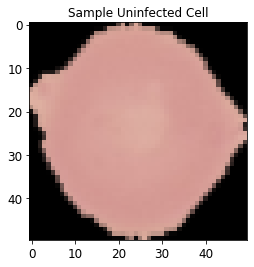

In [32]:
plt.imshow(images[0])
plt.title('Sample Uninfected Cell') 
"Dimensions of image:"
images[0].shape

"Images Labels we have imported thus far:" 
len(images)
len(labels)

In [ ]:
import warnings;
warnings.filterwarnings('ignore');

# Load all the malaria images and setting their Y label as 1 
for img in parasitized_path.glob("*.png"):

    # Load the image from disk
    img =tensorflow.keras.preprocessing.image.load_img(img)
    
    # Convert the image to a numpy array
    image_array = tensorflow.keras.preprocessing.image.load_img(img)
    
    # resize the image (must be done after it has turned into a np array):
    image_array = transform.resize(image_array, new_shape, anti_aliasing=True)

    # scaling the image data to fall between 0-1 since images have 255 brightness values: 
    image_array /= 255.0

    # Add the image to the list of images
    images.append(image_array)
    
    # For each 'parasitized' image, the expected value should be 1
    labels.append(1)

Text(0.5, 1.0, 'Sample Infected Cell')

'Dimensions of image:'

(50, 50, 3)

'Images Labels we have imported thus far:'

41337

41337

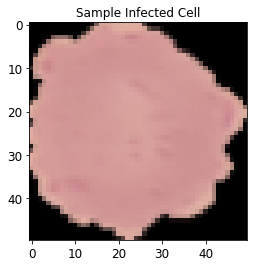

In [15]:
plt.imshow(images[-1])
plt.title('Sample Infected Cell')
"Dimensions of image:"
images [-1].shape
"Images Labels we have imported thus far:" 
len(images) 
len(labels)

'1 means it is infected:'

0

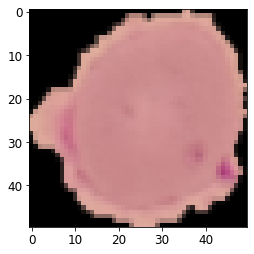

In [16]:
 # checking to make sure that the order is still in place: 
plt.imshow(images[-6])
"1 means it is infected:"
labels [-6]


In [44]:
# Create a single numpy array with all the images we loaded (list to np array) 
x_data = np.array(images)
# Also convert the labels to a numpy array from a list
y_data = np.array(labels)

In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
                                                    
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)


In [46]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [47]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (55116, 50, 50, 3)
X_test shape: (13779, 50, 50, 3)


In [48]:
print(y_train[0:3])

[0 0 0]


In [49]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [50]:
print(y_train[:3])


[[1.]
 [1.]
 [1.]]


In [51]:
#from tensorflow.keras.utils import to_categorial
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test=to_categorical(y_test)

In [59]:
test_image = r"C:/Users/kgajera/Music/600/PROJECT/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png"
test_image

'C:/Users/kgajera/Music/600/PROJECT/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'

In [69]:
#statastical finding LBP

In [82]:
import cv2
import numpy as np
img = cv2.imread('C:/Users/kgajera/Music/600/PROJECT/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')

# Load the image

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate the mean and standard deviation
mean, std_dev = cv2.meanStdDev(gray)

# Print the results
print('Mean:', mean)
print('Standard Deviation:', std_dev)


Mean: [[127.4946427]]
Standard Deviation: [[82.56094629]]


In [86]:
import os
import numpy as np
from skimage import io, img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

# Define the path to the directory containing images
path = r"C:/Users/kgajera/Music/600/PROJECT/cell_images/Parasitized"

# Define a disk structuring element for entropy calculation
selem = disk(3)

# Loop through each image in the directory
for file in os.listdir(path):
    # Read the image
    img = io.imread(os.path.join(path, file))
    
    # Convert the image to grayscale
    gray = img_as_ubyte(color.rgb2gray(img))
    
    # Calculate the entropy of the grayscale image
    ent = entropy(gray, selem=selem)
    
    # Calculate the mean entropy of the image
    mean_ent = np.mean(ent)
    
    # Print the mean entropy of the image
    print(f"Image {file} has mean entropy {mean_ent:.2f}")


Image C100P61ThinF_IMG_20150918_144104_cell_162.png has mean entropy 1.96
Image C100P61ThinF_IMG_20150918_144104_cell_163.png has mean entropy 1.70
Image C100P61ThinF_IMG_20150918_144104_cell_164.png has mean entropy 1.80
Image C100P61ThinF_IMG_20150918_144104_cell_165.png has mean entropy 1.73
Image C100P61ThinF_IMG_20150918_144104_cell_166.png has mean entropy 1.72
Image C100P61ThinF_IMG_20150918_144104_cell_167.png has mean entropy 1.73
Image C100P61ThinF_IMG_20150918_144104_cell_168.png has mean entropy 1.74
Image C100P61ThinF_IMG_20150918_144104_cell_169.png has mean entropy 1.78
Image C100P61ThinF_IMG_20150918_144104_cell_170.png has mean entropy 1.70
Image C100P61ThinF_IMG_20150918_144104_cell_171.png has mean entropy 1.88
Image C100P61ThinF_IMG_20150918_144348_cell_138.png has mean entropy 1.88
Image C100P61ThinF_IMG_20150918_144348_cell_139.png has mean entropy 1.65
Image C100P61ThinF_IMG_20150918_144348_cell_140.png has mean entropy 1.82
Image C100P61ThinF_IMG_20150918_144348

Image C101P62ThinF_IMG_20150918_151239_cell_81.png has mean entropy 1.68
Image C101P62ThinF_IMG_20150918_151239_cell_82.png has mean entropy 2.34
Image C101P62ThinF_IMG_20150918_151239_cell_83.png has mean entropy 2.08
Image C101P62ThinF_IMG_20150918_151239_cell_84.png has mean entropy 2.32
Image C101P62ThinF_IMG_20150918_151239_cell_85.png has mean entropy 1.90
Image C101P62ThinF_IMG_20150918_151239_cell_86.png has mean entropy 2.00
Image C101P62ThinF_IMG_20150918_151239_cell_87.png has mean entropy 2.25
Image C101P62ThinF_IMG_20150918_151239_cell_88.png has mean entropy 1.96
Image C101P62ThinF_IMG_20150918_151239_cell_89.png has mean entropy 1.79
Image C101P62ThinF_IMG_20150918_151239_cell_90.png has mean entropy 1.68
Image C101P62ThinF_IMG_20150918_151239_cell_91.png has mean entropy 1.83
Image C101P62ThinF_IMG_20150918_151239_cell_92.png has mean entropy 2.03
Image C101P62ThinF_IMG_20150918_151239_cell_93.png has mean entropy 1.89
Image C101P62ThinF_IMG_20150918_151239_cell_94.png 

Image C101P62ThinF_IMG_20150918_155731_cell_64.png has mean entropy 1.97
Image C101P62ThinF_IMG_20150918_155731_cell_65.png has mean entropy 2.00
Image C101P62ThinF_IMG_20150918_155731_cell_66.png has mean entropy 1.91
Image C101P62ThinF_IMG_20150918_155731_cell_67.png has mean entropy 2.11
Image C101P62ThinF_IMG_20150918_155731_cell_68.png has mean entropy 2.34
Image C101P62ThinF_IMG_20150918_155731_cell_69.png has mean entropy 2.12
Image C101P62ThinF_IMG_20150918_155731_cell_70.png has mean entropy 2.26
Image C101P62ThinF_IMG_20150918_155731_cell_71.png has mean entropy 1.78
Image C101P62ThinF_IMG_20150918_155731_cell_72.png has mean entropy 2.17
Image C101P62ThinF_IMG_20150918_155731_cell_73.png has mean entropy 1.77
Image C101P62ThinF_IMG_20150918_155731_cell_74.png has mean entropy 2.04
Image C101P62ThinF_IMG_20150918_155731_cell_75.png has mean entropy 2.87
Image C101P62ThinF_IMG_20150918_155731_cell_76.png has mean entropy 1.96
Image C101P62ThinF_IMG_20150918_155731_cell_77.png 

Image C101P62ThinF_IMG_20150923_170246_cell_88.png has mean entropy 1.88
Image C101P62ThinF_IMG_20150923_170246_cell_89.png has mean entropy 1.49
Image C101P62ThinF_IMG_20150923_170246_cell_90.png has mean entropy 2.10
Image C101P62ThinF_IMG_20150923_170344_cell_100.png has mean entropy 2.23
Image C101P62ThinF_IMG_20150923_170344_cell_71.png has mean entropy 2.15
Image C101P62ThinF_IMG_20150923_170344_cell_72.png has mean entropy 1.86
Image C101P62ThinF_IMG_20150923_170344_cell_73.png has mean entropy 1.81
Image C101P62ThinF_IMG_20150923_170344_cell_74.png has mean entropy 1.94
Image C101P62ThinF_IMG_20150923_170344_cell_75.png has mean entropy 2.13
Image C101P62ThinF_IMG_20150923_170344_cell_76.png has mean entropy 1.76
Image C101P62ThinF_IMG_20150923_170344_cell_77.png has mean entropy 1.93
Image C101P62ThinF_IMG_20150923_170344_cell_78.png has mean entropy 2.04
Image C101P62ThinF_IMG_20150923_170344_cell_79.png has mean entropy 2.10
Image C101P62ThinF_IMG_20150923_170344_cell_80.png

Image C104P65ThinF_IMG_20150918_172537_cell_149.png has mean entropy 1.52
Image C104P65ThinF_IMG_20150918_172639_cell_182.png has mean entropy 1.69
Image C104P65ThinF_IMG_20150918_172639_cell_183.png has mean entropy 1.49
Image C104P65ThinF_IMG_20150918_172639_cell_184.png has mean entropy 2.12
Image C105P66ThinF_IMG_20150924_094800_cell_136.png has mean entropy 1.66
Image C105P66ThinF_IMG_20150924_094800_cell_137.png has mean entropy 1.60
Image C105P66ThinF_IMG_20150924_095034_cell_148.png has mean entropy 1.72
Image C105P66ThinF_IMG_20150924_095034_cell_149.png has mean entropy 1.60
Image C105P66ThinF_IMG_20150924_095034_cell_150.png has mean entropy 1.35
Image C105P66ThinF_IMG_20150924_095130_cell_155.png has mean entropy 1.77
Image C105P66ThinF_IMG_20150924_095130_cell_156.png has mean entropy 1.69
Image C105P66ThinF_IMG_20150924_095130_cell_157.png has mean entropy 1.36
Image C105P66ThinF_IMG_20150924_095130_cell_158.png has mean entropy 1.59
Image C105P66ThinF_IMG_20150924_095633

Image C108P69ThinF_IMG_20150924_225511_cell_182.png has mean entropy 2.24
Image C108P69ThinF_IMG_20150924_225511_cell_183.png has mean entropy 2.12
Image C108P69ThinF_IMG_20150924_225511_cell_184.png has mean entropy 2.31
Image C109P70ThinF_IMG_20150930_102716_cell_185.png has mean entropy 1.90
Image C109P70ThinF_IMG_20150930_102716_cell_186.png has mean entropy 1.92
Image C109P70ThinF_IMG_20150930_102716_cell_187.png has mean entropy 1.98
Image C109P70ThinF_IMG_20150930_102944_cell_171.png has mean entropy 1.88
Image C109P70ThinF_IMG_20150930_102944_cell_172.png has mean entropy 1.89
Image C109P70ThinF_IMG_20150930_103113_cell_160.png has mean entropy 1.75
Image C109P70ThinF_IMG_20150930_103113_cell_161.png has mean entropy 1.73
Image C109P70ThinF_IMG_20150930_103113_cell_162.png has mean entropy 1.73
Image C109P70ThinF_IMG_20150930_103214_cell_182.png has mean entropy 2.02
Image C109P70ThinF_IMG_20150930_103214_cell_183.png has mean entropy 1.72
Image C109P70ThinF_IMG_20150930_103214

Image C113P74ThinF_IMG_20150930_134751_cell_178.png has mean entropy 2.24
Image C113P74ThinF_IMG_20150930_134751_cell_179.png has mean entropy 1.81
Image C113P74ThinF_IMG_20150930_134751_cell_180.png has mean entropy 1.69
Image C113P74ThinF_IMG_20150930_134751_cell_181.png has mean entropy 1.66
Image C113P74ThinF_IMG_20150930_134949_cell_158.png has mean entropy 1.95
Image C113P74ThinF_IMG_20150930_134949_cell_159.png has mean entropy 1.95
Image C113P74ThinF_IMG_20150930_134949_cell_160.png has mean entropy 1.86
Image C113P74ThinF_IMG_20150930_134949_cell_161.png has mean entropy 1.29
Image C113P74ThinF_IMG_20150930_134949_cell_162.png has mean entropy 1.89
Image C113P74ThinF_IMG_20150930_134949_cell_163.png has mean entropy 1.64
Image C113P74ThinF_IMG_20150930_135904_cell_180.png has mean entropy 2.06
Image C113P74ThinF_IMG_20150930_135904_cell_181.png has mean entropy 1.85
Image C113P74ThinF_IMG_20150930_135904_cell_182.png has mean entropy 1.92
Image C113P74ThinF_IMG_20150930_135904

Image C116P77ThinF_IMG_20150930_171448_cell_116.png has mean entropy 2.33
Image C116P77ThinF_IMG_20150930_171448_cell_117.png has mean entropy 2.66
Image C116P77ThinF_IMG_20150930_171448_cell_118.png has mean entropy 2.46
Image C116P77ThinF_IMG_20150930_171448_cell_119.png has mean entropy 2.45
Image C116P77ThinF_IMG_20150930_171448_cell_120.png has mean entropy 2.57
Image C116P77ThinF_IMG_20150930_171448_cell_121.png has mean entropy 2.30
Image C116P77ThinF_IMG_20150930_171448_cell_122.png has mean entropy 2.38
Image C116P77ThinF_IMG_20150930_171448_cell_123.png has mean entropy 2.72
Image C116P77ThinF_IMG_20150930_171448_cell_124.png has mean entropy 2.60
Image C116P77ThinF_IMG_20150930_171448_cell_125.png has mean entropy 2.61
Image C116P77ThinF_IMG_20150930_171448_cell_126.png has mean entropy 2.61
Image C116P77ThinF_IMG_20150930_171448_cell_127.png has mean entropy 2.39
Image C116P77ThinF_IMG_20150930_171448_cell_128.png has mean entropy 2.85
Image C116P77ThinF_IMG_20150930_171448

Image C116P77ThinF_IMG_20150930_171635_cell_115.png has mean entropy 2.31
Image C116P77ThinF_IMG_20150930_171635_cell_70.png has mean entropy 2.43
Image C116P77ThinF_IMG_20150930_171635_cell_71.png has mean entropy 2.24
Image C116P77ThinF_IMG_20150930_171635_cell_72.png has mean entropy 2.44
Image C116P77ThinF_IMG_20150930_171635_cell_73.png has mean entropy 2.27
Image C116P77ThinF_IMG_20150930_171635_cell_74.png has mean entropy 2.42
Image C116P77ThinF_IMG_20150930_171635_cell_75.png has mean entropy 2.66
Image C116P77ThinF_IMG_20150930_171635_cell_76.png has mean entropy 2.54
Image C116P77ThinF_IMG_20150930_171635_cell_77.png has mean entropy 2.29
Image C116P77ThinF_IMG_20150930_171635_cell_78.png has mean entropy 2.33
Image C116P77ThinF_IMG_20150930_171635_cell_79.png has mean entropy 2.34
Image C116P77ThinF_IMG_20150930_171635_cell_80.png has mean entropy 2.21
Image C116P77ThinF_IMG_20150930_171635_cell_81.png has mean entropy 2.50
Image C116P77ThinF_IMG_20150930_171635_cell_82.png

Image C116P77ThinF_IMG_20150930_171844_cell_107.png has mean entropy 2.38
Image C116P77ThinF_IMG_20150930_171844_cell_108.png has mean entropy 2.37
Image C116P77ThinF_IMG_20150930_171844_cell_109.png has mean entropy 2.33
Image C116P77ThinF_IMG_20150930_171844_cell_110.png has mean entropy 2.39
Image C116P77ThinF_IMG_20150930_171844_cell_111.png has mean entropy 2.63
Image C116P77ThinF_IMG_20150930_171844_cell_112.png has mean entropy 2.28
Image C116P77ThinF_IMG_20150930_171844_cell_113.png has mean entropy 2.59
Image C116P77ThinF_IMG_20150930_171844_cell_114.png has mean entropy 2.33
Image C116P77ThinF_IMG_20150930_171844_cell_115.png has mean entropy 2.27
Image C116P77ThinF_IMG_20150930_171844_cell_116.png has mean entropy 2.25
Image C116P77ThinF_IMG_20150930_171844_cell_117.png has mean entropy 2.18
Image C116P77ThinF_IMG_20150930_171844_cell_118.png has mean entropy 2.41
Image C116P77ThinF_IMG_20150930_171844_cell_119.png has mean entropy 2.32
Image C116P77ThinF_IMG_20150930_171844

Image C116P77ThinF_IMG_20150930_172112_cell_77.png has mean entropy 2.33
Image C116P77ThinF_IMG_20150930_172112_cell_78.png has mean entropy 2.16
Image C116P77ThinF_IMG_20150930_172112_cell_79.png has mean entropy 2.24
Image C116P77ThinF_IMG_20150930_172112_cell_80.png has mean entropy 2.36
Image C116P77ThinF_IMG_20150930_172112_cell_81.png has mean entropy 2.43
Image C116P77ThinF_IMG_20150930_172112_cell_82.png has mean entropy 2.53
Image C116P77ThinF_IMG_20150930_172112_cell_83.png has mean entropy 2.26
Image C116P77ThinF_IMG_20150930_172112_cell_84.png has mean entropy 2.31
Image C116P77ThinF_IMG_20150930_172112_cell_85.png has mean entropy 2.27
Image C116P77ThinF_IMG_20150930_172112_cell_86.png has mean entropy 2.27
Image C116P77ThinF_IMG_20150930_172112_cell_87.png has mean entropy 2.51
Image C116P77ThinF_IMG_20150930_172112_cell_88.png has mean entropy 2.36
Image C116P77ThinF_IMG_20150930_172112_cell_89.png has mean entropy 2.43
Image C116P77ThinF_IMG_20150930_172112_cell_90.png 

Image C118P79ThinF_IMG_20151002_104831_cell_159.png has mean entropy 1.69
Image C118P79ThinF_IMG_20151002_104831_cell_160.png has mean entropy 1.77
Image C118P79ThinF_IMG_20151002_104831_cell_161.png has mean entropy 2.22
Image C118P79ThinF_IMG_20151002_104831_cell_162.png has mean entropy 1.92
Image C118P79ThinF_IMG_20151002_104831_cell_163.png has mean entropy 1.67
Image C118P79ThinF_IMG_20151002_104831_cell_164.png has mean entropy 2.01
Image C118P79ThinF_IMG_20151002_104831_cell_165.png has mean entropy 1.79
Image C118P79ThinF_IMG_20151002_104831_cell_166.png has mean entropy 1.84
Image C118P79ThinF_IMG_20151002_104831_cell_167.png has mean entropy 1.72
Image C118P79ThinF_IMG_20151002_104831_cell_168.png has mean entropy 1.82
Image C118P79ThinF_IMG_20151002_105018_cell_133.png has mean entropy 2.50
Image C118P79ThinF_IMG_20151002_105018_cell_134.png has mean entropy 1.44
Image C118P79ThinF_IMG_20151002_105018_cell_135.png has mean entropy 1.86
Image C118P79ThinF_IMG_20151002_105018

Image C118P79ThinF_IMG_20151002_105827_cell_133.png has mean entropy 1.82
Image C118P79ThinF_IMG_20151002_105827_cell_134.png has mean entropy 1.46
Image C118P79ThinF_IMG_20151002_105827_cell_135.png has mean entropy 1.87
Image C118P79ThinF_IMG_20151002_105827_cell_136.png has mean entropy 1.84
Image C118P79ThinF_IMG_20151002_105827_cell_137.png has mean entropy 2.10
Image C118P79ThinF_IMG_20151002_105827_cell_138.png has mean entropy 1.70
Image C118P79ThinF_IMG_20151002_105827_cell_139.png has mean entropy 1.80
Image C118P79ThinF_IMG_20151002_105827_cell_140.png has mean entropy 1.84
Image C118P79ThinF_IMG_20151002_105827_cell_141.png has mean entropy 1.91
Image C118P79ThinF_IMG_20151002_105827_cell_142.png has mean entropy 1.67
Image C118P79ThinF_IMG_20151002_105827_cell_143.png has mean entropy 2.26
Image C118P79ThinF_IMG_20151002_105827_cell_144.png has mean entropy 1.73
Image C118P79ThinF_IMG_20151002_105827_cell_145.png has mean entropy 1.87
Image C118P79ThinF_IMG_20151002_105827

Image C118P79ThinF_IMG_20151002_110834_cell_137.png has mean entropy 1.67
Image C118P79ThinF_IMG_20151002_110834_cell_138.png has mean entropy 2.07
Image C118P79ThinF_IMG_20151002_110834_cell_139.png has mean entropy 1.78
Image C118P79ThinF_IMG_20151002_110834_cell_140.png has mean entropy 2.01
Image C118P79ThinF_IMG_20151002_110834_cell_141.png has mean entropy 2.10
Image C118P79ThinF_IMG_20151002_110834_cell_142.png has mean entropy 1.76
Image C118P79ThinF_IMG_20151002_110834_cell_143.png has mean entropy 1.79
Image C118P79ThinF_IMG_20151002_110834_cell_144.png has mean entropy 1.76
Image C118P79ThinF_IMG_20151002_110834_cell_145.png has mean entropy 1.95
Image C118P79ThinF_IMG_20151002_110834_cell_146.png has mean entropy 1.93
Image C118P79ThinF_IMG_20151002_110834_cell_147.png has mean entropy 1.94
Image C118P79ThinF_IMG_20151002_110834_cell_148.png has mean entropy 2.12
Image C118P79ThinF_IMG_20151002_110834_cell_149.png has mean entropy 1.58
Image C118P79ThinF_IMG_20151002_110834

Image C119P80ThinF_IMG_20151002_124304_cell_165.png has mean entropy 1.86
Image C119P80ThinF_IMG_20151002_124304_cell_166.png has mean entropy 1.85
Image C119P80ThinF_IMG_20151002_124304_cell_167.png has mean entropy 1.86
Image C119P80ThinF_IMG_20151002_124304_cell_168.png has mean entropy 1.86
Image C119P80ThinF_IMG_20151002_124304_cell_169.png has mean entropy 1.88
Image C119P80ThinF_IMG_20151002_124304_cell_170.png has mean entropy 1.87
Image C119P80ThinF_IMG_20151002_124304_cell_171.png has mean entropy 2.06
Image C119P80ThinF_IMG_20151002_124304_cell_172.png has mean entropy 2.15
Image C119P80ThinF_IMG_20151002_124304_cell_173.png has mean entropy 2.02
Image C119P80ThinF_IMG_20151002_124345_cell_142.png has mean entropy 1.96
Image C119P80ThinF_IMG_20151002_124345_cell_143.png has mean entropy 2.01
Image C119P80ThinF_IMG_20151002_124345_cell_144.png has mean entropy 2.04
Image C119P80ThinF_IMG_20151002_124345_cell_145.png has mean entropy 2.00
Image C119P80ThinF_IMG_20151002_124345

Image C120P81ThinF_IMG_20151002_130918_cell_196.png has mean entropy 1.59
Image C120P81ThinF_IMG_20151002_130918_cell_197.png has mean entropy 2.09
Image C120P81ThinF_IMG_20151002_130918_cell_198.png has mean entropy 1.81
Image C120P81ThinF_IMG_20151002_130918_cell_199.png has mean entropy 1.99
Image C120P81ThinF_IMG_20151002_130918_cell_200.png has mean entropy 2.07
Image C120P81ThinF_IMG_20151002_130918_cell_201.png has mean entropy 1.93
Image C120P81ThinF_IMG_20151002_130918_cell_202.png has mean entropy 2.08
Image C120P81ThinF_IMG_20151002_130918_cell_203.png has mean entropy 1.97
Image C120P81ThinF_IMG_20151002_130918_cell_204.png has mean entropy 2.14
Image C120P81ThinF_IMG_20151002_130918_cell_205.png has mean entropy 2.32
Image C120P81ThinF_IMG_20151002_130918_cell_206.png has mean entropy 2.14
Image C120P81ThinF_IMG_20151002_130918_cell_207.png has mean entropy 1.97
Image C120P81ThinF_IMG_20151002_130918_cell_208.png has mean entropy 1.94
Image C120P81ThinF_IMG_20151002_130918

Image C124P85ThinF_IMG_20151002_153825_cell_193.png has mean entropy 1.59
Image C124P85ThinF_IMG_20151002_153825_cell_194.png has mean entropy 1.68
Image C124P85ThinF_IMG_20151002_153825_cell_195.png has mean entropy 1.77
Image C124P85ThinF_IMG_20151002_154502_cell_156.png has mean entropy 2.02
Image C124P85ThinF_IMG_20151002_154502_cell_157.png has mean entropy 1.80
Image C124P85ThinF_IMG_20151002_154502_cell_158.png has mean entropy 1.94
Image C124P85ThinF_IMG_20151002_154808_cell_136.png has mean entropy 2.09
Image C124P85ThinF_IMG_20151002_154808_cell_137.png has mean entropy 1.95
Image C124P85ThinF_IMG_20151002_154808_cell_138.png has mean entropy 1.64
Image C124P85ThinF_IMG_20151002_154808_cell_139.png has mean entropy 1.99
Image C124P85ThinF_IMG_20151002_154808_cell_140.png has mean entropy 1.85
Image C124P85ThinF_IMG_20151002_154808_cell_141.png has mean entropy 1.82
Image C124P85ThinF_IMG_20151002_154808_cell_142.png has mean entropy 1.94
Image C124P85ThinF_IMG_20151002_154808

Image C127P88ThinF_IMG_20151004_111526_cell_101.png has mean entropy 2.00
Image C127P88ThinF_IMG_20151004_111651_cell_133.png has mean entropy 2.21
Image C127P88ThinF_IMG_20151004_111755_cell_117.png has mean entropy 1.65
Image C127P88ThinF_IMG_20151004_111755_cell_118.png has mean entropy 2.29
Image C127P88ThinF_IMG_20151004_112126_cell_107.png has mean entropy 1.79
Image C127P88ThinF_IMG_20151004_112301_cell_123.png has mean entropy 1.83
Image C127P88ThinF_IMG_20151004_112301_cell_124.png has mean entropy 2.05
Image C127P88ThinF_IMG_20151004_112301_cell_125.png has mean entropy 2.17
Image C127P88ThinF_IMG_20151004_112418_cell_143.png has mean entropy 1.77
Image C128P89ThinF_IMG_20151004_130408_cell_146.png has mean entropy 1.84
Image C128P89ThinF_IMG_20151004_130408_cell_147.png has mean entropy 1.65
Image C128P89ThinF_IMG_20151004_130408_cell_148.png has mean entropy 1.84
Image C128P89ThinF_IMG_20151004_130408_cell_149.png has mean entropy 1.81
Image C128P89ThinF_IMG_20151004_130408

Image C128P89ThinF_IMG_20151004_131231_cell_155.png has mean entropy 1.94
Image C128P89ThinF_IMG_20151004_131231_cell_156.png has mean entropy 2.00
Image C128P89ThinF_IMG_20151004_131231_cell_157.png has mean entropy 2.02
Image C128P89ThinF_IMG_20151004_131231_cell_158.png has mean entropy 2.00
Image C128P89ThinF_IMG_20151004_131231_cell_159.png has mean entropy 1.95
Image C128P89ThinF_IMG_20151004_131231_cell_160.png has mean entropy 1.80
Image C128P89ThinF_IMG_20151004_131632_cell_163.png has mean entropy 1.75
Image C128P89ThinF_IMG_20151004_131632_cell_164.png has mean entropy 1.79
Image C128P89ThinF_IMG_20151004_131632_cell_165.png has mean entropy 1.81
Image C128P89ThinF_IMG_20151004_131632_cell_166.png has mean entropy 1.96
Image C128P89ThinF_IMG_20151004_131632_cell_167.png has mean entropy 1.71
Image C128P89ThinF_IMG_20151004_131632_cell_168.png has mean entropy 1.99
Image C128P89ThinF_IMG_20151004_131632_cell_169.png has mean entropy 2.03
Image C128P89ThinF_IMG_20151004_131632

Image C129P90ThinF_IMG_20151004_133538_cell_103.png has mean entropy 1.96
Image C129P90ThinF_IMG_20151004_133538_cell_104.png has mean entropy 1.95
Image C129P90ThinF_IMG_20151004_133538_cell_105.png has mean entropy 1.81
Image C129P90ThinF_IMG_20151004_133538_cell_106.png has mean entropy 1.96
Image C129P90ThinF_IMG_20151004_133538_cell_107.png has mean entropy 2.01
Image C129P90ThinF_IMG_20151004_133538_cell_75.png has mean entropy 1.83
Image C129P90ThinF_IMG_20151004_133538_cell_76.png has mean entropy 1.80
Image C129P90ThinF_IMG_20151004_133538_cell_77.png has mean entropy 2.04
Image C129P90ThinF_IMG_20151004_133538_cell_78.png has mean entropy 1.95
Image C129P90ThinF_IMG_20151004_133538_cell_79.png has mean entropy 1.92
Image C129P90ThinF_IMG_20151004_133538_cell_80.png has mean entropy 1.90
Image C129P90ThinF_IMG_20151004_133538_cell_81.png has mean entropy 2.06
Image C129P90ThinF_IMG_20151004_133538_cell_82.png has mean entropy 2.22
Image C129P90ThinF_IMG_20151004_133538_cell_83

Image C129P90ThinF_IMG_20151004_134306_cell_149.png has mean entropy 2.20
Image C129P90ThinF_IMG_20151004_134306_cell_150.png has mean entropy 2.06
Image C129P90ThinF_IMG_20151004_134520_cell_100.png has mean entropy 2.05
Image C129P90ThinF_IMG_20151004_134520_cell_101.png has mean entropy 1.80
Image C129P90ThinF_IMG_20151004_134520_cell_102.png has mean entropy 1.92
Image C129P90ThinF_IMG_20151004_134520_cell_103.png has mean entropy 1.93
Image C129P90ThinF_IMG_20151004_134520_cell_104.png has mean entropy 1.92
Image C129P90ThinF_IMG_20151004_134520_cell_105.png has mean entropy 2.00
Image C129P90ThinF_IMG_20151004_134520_cell_106.png has mean entropy 1.91
Image C129P90ThinF_IMG_20151004_134520_cell_107.png has mean entropy 2.05
Image C129P90ThinF_IMG_20151004_134520_cell_108.png has mean entropy 1.98
Image C129P90ThinF_IMG_20151004_134520_cell_109.png has mean entropy 2.07
Image C129P90ThinF_IMG_20151004_134520_cell_110.png has mean entropy 1.91
Image C129P90ThinF_IMG_20151004_134520

Image C129P90ThinF_IMG_20151004_134944_cell_28.png has mean entropy 1.84
Image C129P90ThinF_IMG_20151004_134944_cell_29.png has mean entropy 1.86
Image C129P90ThinF_IMG_20151004_134944_cell_3.png has mean entropy 1.93
Image C129P90ThinF_IMG_20151004_134944_cell_30.png has mean entropy 2.11
Image C129P90ThinF_IMG_20151004_134944_cell_4.png has mean entropy 1.94
Image C129P90ThinF_IMG_20151004_134944_cell_5.png has mean entropy 1.96
Image C129P90ThinF_IMG_20151004_134944_cell_6.png has mean entropy 1.75
Image C129P90ThinF_IMG_20151004_134944_cell_7.png has mean entropy 2.29
Image C129P90ThinF_IMG_20151004_134944_cell_8.png has mean entropy 1.93
Image C129P90ThinF_IMG_20151004_134944_cell_9.png has mean entropy 2.07
Image C130P91ThinF_IMG_20151004_135449_cell_120.png has mean entropy 1.83
Image C130P91ThinF_IMG_20151004_135449_cell_121.png has mean entropy 1.76
Image C130P91ThinF_IMG_20151004_135449_cell_122.png has mean entropy 1.56
Image C130P91ThinF_IMG_20151004_135449_cell_123.png has

Image C130P91ThinF_IMG_20151004_142951_cell_149.png has mean entropy 1.75
Image C130P91ThinF_IMG_20151004_142951_cell_150.png has mean entropy 1.96
Image C130P91ThinF_IMG_20151004_142951_cell_151.png has mean entropy 1.90
Image C130P91ThinF_IMG_20151004_142951_cell_152.png has mean entropy 1.87
Image C130P91ThinF_IMG_20151004_142951_cell_153.png has mean entropy 1.94
Image C130P91ThinF_IMG_20151004_142951_cell_154.png has mean entropy 1.67
Image C130P91ThinF_IMG_20151004_142951_cell_155.png has mean entropy 1.84
Image C130P91ThinF_IMG_20151004_142951_cell_156.png has mean entropy 1.88
Image C130P91ThinF_IMG_20151004_142951_cell_157.png has mean entropy 1.74
Image C130P91ThinF_IMG_20151004_142951_cell_158.png has mean entropy 1.80
Image C130P91ThinF_IMG_20151004_142951_cell_159.png has mean entropy 1.74
Image C130P91ThinF_IMG_20151004_142951_cell_160.png has mean entropy 1.77
Image C130P91ThinF_IMG_20151004_142951_cell_161.png has mean entropy 1.57
Image C130P91ThinF_IMG_20151004_142951

Image C132P93ThinF_IMG_20151004_151701_cell_175.png has mean entropy 2.68
Image C132P93ThinF_IMG_20151004_151701_cell_176.png has mean entropy 2.20
Image C132P93ThinF_IMG_20151004_151701_cell_177.png has mean entropy 1.91
Image C132P93ThinF_IMG_20151004_151701_cell_178.png has mean entropy 2.38
Image C132P93ThinF_IMG_20151004_151701_cell_179.png has mean entropy 2.41
Image C132P93ThinF_IMG_20151004_151701_cell_180.png has mean entropy 2.36
Image C132P93ThinF_IMG_20151004_151701_cell_181.png has mean entropy 2.65
Image C132P93ThinF_IMG_20151004_151701_cell_182.png has mean entropy 2.26
Image C132P93ThinF_IMG_20151004_151701_cell_183.png has mean entropy 2.45
Image C132P93ThinF_IMG_20151004_151701_cell_184.png has mean entropy 2.27
Image C132P93ThinF_IMG_20151004_151733_cell_135.png has mean entropy 2.37
Image C132P93ThinF_IMG_20151004_151733_cell_136.png has mean entropy 2.39
Image C132P93ThinF_IMG_20151004_151733_cell_137.png has mean entropy 2.37
Image C132P93ThinF_IMG_20151004_151733

Image C132P93ThinF_IMG_20151004_151811_cell_173.png has mean entropy 2.33
Image C132P93ThinF_IMG_20151004_151941_cell_1.png has mean entropy 2.49
Image C132P93ThinF_IMG_20151004_151941_cell_10.png has mean entropy 2.52
Image C132P93ThinF_IMG_20151004_151941_cell_11.png has mean entropy 2.25
Image C132P93ThinF_IMG_20151004_151941_cell_12.png has mean entropy 2.29
Image C132P93ThinF_IMG_20151004_151941_cell_13.png has mean entropy 2.14
Image C132P93ThinF_IMG_20151004_151941_cell_14.png has mean entropy 2.62
Image C132P93ThinF_IMG_20151004_151941_cell_15.png has mean entropy 2.20
Image C132P93ThinF_IMG_20151004_151941_cell_16.png has mean entropy 2.49
Image C132P93ThinF_IMG_20151004_151941_cell_17.png has mean entropy 2.23
Image C132P93ThinF_IMG_20151004_151941_cell_18.png has mean entropy 2.22
Image C132P93ThinF_IMG_20151004_151941_cell_19.png has mean entropy 2.27
Image C132P93ThinF_IMG_20151004_151941_cell_2.png has mean entropy 2.13
Image C132P93ThinF_IMG_20151004_151941_cell_20.png h

Image C132P93ThinF_IMG_20151004_152257_cell_111.png has mean entropy 2.49
Image C132P93ThinF_IMG_20151004_152257_cell_112.png has mean entropy 2.27
Image C132P93ThinF_IMG_20151004_152257_cell_113.png has mean entropy 2.11
Image C132P93ThinF_IMG_20151004_152257_cell_114.png has mean entropy 2.19
Image C132P93ThinF_IMG_20151004_152257_cell_115.png has mean entropy 2.05
Image C132P93ThinF_IMG_20151004_152257_cell_116.png has mean entropy 2.30
Image C132P93ThinF_IMG_20151004_152257_cell_117.png has mean entropy 2.19
Image C132P93ThinF_IMG_20151004_152257_cell_118.png has mean entropy 2.36
Image C132P93ThinF_IMG_20151004_152257_cell_119.png has mean entropy 2.21
Image C132P93ThinF_IMG_20151004_152257_cell_120.png has mean entropy 2.12
Image C132P93ThinF_IMG_20151004_152257_cell_121.png has mean entropy 2.13
Image C132P93ThinF_IMG_20151004_152257_cell_122.png has mean entropy 2.06
Image C132P93ThinF_IMG_20151004_152257_cell_123.png has mean entropy 2.16
Image C132P93ThinF_IMG_20151004_152257

Image C132P93ThinF_IMG_20151004_152505_cell_127.png has mean entropy 2.11
Image C132P93ThinF_IMG_20151004_152505_cell_128.png has mean entropy 2.45
Image C132P93ThinF_IMG_20151004_152505_cell_129.png has mean entropy 2.44
Image C132P93ThinF_IMG_20151004_152505_cell_130.png has mean entropy 2.11
Image C132P93ThinF_IMG_20151004_152505_cell_131.png has mean entropy 2.15
Image C132P93ThinF_IMG_20151004_152505_cell_132.png has mean entropy 2.27
Image C132P93ThinF_IMG_20151004_152505_cell_133.png has mean entropy 2.11
Image C132P93ThinF_IMG_20151004_152505_cell_134.png has mean entropy 2.26
Image C132P93ThinF_IMG_20151004_152505_cell_135.png has mean entropy 2.17
Image C132P93ThinF_IMG_20151004_152505_cell_136.png has mean entropy 2.21
Image C132P93ThinF_IMG_20151004_152505_cell_137.png has mean entropy 2.29
Image C132P93ThinF_IMG_20151004_152505_cell_138.png has mean entropy 1.97
Image C132P93ThinF_IMG_20151004_152505_cell_139.png has mean entropy 2.63
Image C132P93ThinF_IMG_20151004_152505

Image C132P93ThinF_IMG_20151004_152808_cell_31.png has mean entropy 2.51
Image C132P93ThinF_IMG_20151004_152808_cell_32.png has mean entropy 2.16
Image C132P93ThinF_IMG_20151004_152808_cell_33.png has mean entropy 2.26
Image C132P93ThinF_IMG_20151004_152808_cell_34.png has mean entropy 2.57
Image C132P93ThinF_IMG_20151004_152808_cell_35.png has mean entropy 2.18
Image C132P93ThinF_IMG_20151004_152808_cell_36.png has mean entropy 2.31
Image C132P93ThinF_IMG_20151004_152808_cell_37.png has mean entropy 2.19
Image C132P93ThinF_IMG_20151004_152808_cell_38.png has mean entropy 2.26
Image C132P93ThinF_IMG_20151004_152808_cell_39.png has mean entropy 2.16
Image C132P93ThinF_IMG_20151004_152808_cell_4.png has mean entropy 2.32
Image C132P93ThinF_IMG_20151004_152808_cell_40.png has mean entropy 2.50
Image C132P93ThinF_IMG_20151004_152808_cell_41.png has mean entropy 2.53
Image C132P93ThinF_IMG_20151004_152808_cell_42.png has mean entropy 2.26
Image C132P93ThinF_IMG_20151004_152808_cell_43.png h

Image C133P94ThinF_IMG_20151004_154351_cell_100.png has mean entropy 2.49
Image C133P94ThinF_IMG_20151004_154351_cell_101.png has mean entropy 1.97
Image C133P94ThinF_IMG_20151004_154351_cell_102.png has mean entropy 2.02
Image C133P94ThinF_IMG_20151004_154351_cell_103.png has mean entropy 2.01
Image C133P94ThinF_IMG_20151004_154351_cell_104.png has mean entropy 2.45
Image C133P94ThinF_IMG_20151004_154351_cell_105.png has mean entropy 1.93
Image C133P94ThinF_IMG_20151004_154351_cell_106.png has mean entropy 2.04
Image C133P94ThinF_IMG_20151004_154351_cell_107.png has mean entropy 2.07
Image C133P94ThinF_IMG_20151004_154351_cell_108.png has mean entropy 2.35
Image C133P94ThinF_IMG_20151004_154351_cell_109.png has mean entropy 2.13
Image C133P94ThinF_IMG_20151004_154351_cell_110.png has mean entropy 2.01
Image C133P94ThinF_IMG_20151004_154351_cell_111.png has mean entropy 1.99
Image C133P94ThinF_IMG_20151004_154351_cell_112.png has mean entropy 2.04
Image C133P94ThinF_IMG_20151004_154351

Image C133P94ThinF_IMG_20151004_155012_cell_1.png has mean entropy 2.07
Image C133P94ThinF_IMG_20151004_155012_cell_10.png has mean entropy 1.99
Image C133P94ThinF_IMG_20151004_155012_cell_11.png has mean entropy 1.92
Image C133P94ThinF_IMG_20151004_155012_cell_12.png has mean entropy 2.25
Image C133P94ThinF_IMG_20151004_155012_cell_13.png has mean entropy 2.07
Image C133P94ThinF_IMG_20151004_155012_cell_14.png has mean entropy 2.07
Image C133P94ThinF_IMG_20151004_155012_cell_15.png has mean entropy 1.78
Image C133P94ThinF_IMG_20151004_155012_cell_16.png has mean entropy 2.40
Image C133P94ThinF_IMG_20151004_155012_cell_17.png has mean entropy 1.86
Image C133P94ThinF_IMG_20151004_155012_cell_18.png has mean entropy 2.00
Image C133P94ThinF_IMG_20151004_155012_cell_19.png has mean entropy 2.21
Image C133P94ThinF_IMG_20151004_155012_cell_2.png has mean entropy 2.37
Image C133P94ThinF_IMG_20151004_155012_cell_20.png has mean entropy 1.65
Image C133P94ThinF_IMG_20151004_155012_cell_21.png ha

Image C133P94ThinF_IMG_20151004_155721_cell_122.png has mean entropy 2.20
Image C133P94ThinF_IMG_20151004_155721_cell_123.png has mean entropy 2.03
Image C133P94ThinF_IMG_20151004_155721_cell_124.png has mean entropy 2.61
Image C133P94ThinF_IMG_20151004_155912_cell_1.png has mean entropy 2.08
Image C133P94ThinF_IMG_20151004_155912_cell_10.png has mean entropy 2.18
Image C133P94ThinF_IMG_20151004_155912_cell_11.png has mean entropy 2.16
Image C133P94ThinF_IMG_20151004_155912_cell_12.png has mean entropy 2.27
Image C133P94ThinF_IMG_20151004_155912_cell_13.png has mean entropy 2.03
Image C133P94ThinF_IMG_20151004_155912_cell_14.png has mean entropy 2.02
Image C133P94ThinF_IMG_20151004_155912_cell_15.png has mean entropy 1.95
Image C133P94ThinF_IMG_20151004_155912_cell_16.png has mean entropy 2.45
Image C133P94ThinF_IMG_20151004_155912_cell_17.png has mean entropy 2.29
Image C133P94ThinF_IMG_20151004_155912_cell_18.png has mean entropy 2.01
Image C133P94ThinF_IMG_20151004_155912_cell_19.pn

Image C136P97ThinF_IMG_20151005_140646_cell_119.png has mean entropy 2.16
Image C136P97ThinF_IMG_20151005_140646_cell_120.png has mean entropy 1.84
Image C136P97ThinF_IMG_20151005_140646_cell_121.png has mean entropy 1.77
Image C136P97ThinF_IMG_20151005_140646_cell_122.png has mean entropy 1.83
Image C136P97ThinF_IMG_20151005_140646_cell_123.png has mean entropy 1.64
Image C136P97ThinF_IMG_20151005_140646_cell_124.png has mean entropy 2.17
Image C136P97ThinF_IMG_20151005_140646_cell_125.png has mean entropy 1.79
Image C136P97ThinF_IMG_20151005_140646_cell_96.png has mean entropy 2.06
Image C136P97ThinF_IMG_20151005_140646_cell_97.png has mean entropy 1.74
Image C136P97ThinF_IMG_20151005_140646_cell_98.png has mean entropy 1.74
Image C136P97ThinF_IMG_20151005_140646_cell_99.png has mean entropy 1.75
Image C136P97ThinF_IMG_20151005_141321_cell_100.png has mean entropy 2.02
Image C136P97ThinF_IMG_20151005_141321_cell_101.png has mean entropy 1.98
Image C136P97ThinF_IMG_20151005_141321_cel

Image C136P97ThinF_IMG_20151005_142437_cell_114.png has mean entropy 1.85
Image C136P97ThinF_IMG_20151005_142437_cell_115.png has mean entropy 1.76
Image C136P97ThinF_IMG_20151005_142437_cell_116.png has mean entropy 2.13
Image C136P97ThinF_IMG_20151005_142437_cell_117.png has mean entropy 1.48
Image C136P97ThinF_IMG_20151005_142437_cell_118.png has mean entropy 2.06
Image C136P97ThinF_IMG_20151005_142437_cell_119.png has mean entropy 2.06
Image C136P97ThinF_IMG_20151005_142437_cell_120.png has mean entropy 1.74
Image C136P97ThinF_IMG_20151005_142437_cell_121.png has mean entropy 2.15
Image C136P97ThinF_IMG_20151005_142437_cell_122.png has mean entropy 2.09
Image C136P97ThinF_IMG_20151005_142437_cell_123.png has mean entropy 1.91
Image C136P97ThinF_IMG_20151005_142437_cell_124.png has mean entropy 1.88
Image C136P97ThinF_IMG_20151005_142437_cell_125.png has mean entropy 2.17
Image C136P97ThinF_IMG_20151005_142437_cell_126.png has mean entropy 1.92
Image C136P97ThinF_IMG_20151005_142437

Image C136P97ThinF_IMG_20151005_144449_cell_21.png has mean entropy 2.08
Image C136P97ThinF_IMG_20151005_144449_cell_22.png has mean entropy 2.17
Image C136P97ThinF_IMG_20151005_144449_cell_23.png has mean entropy 1.91
Image C136P97ThinF_IMG_20151005_144449_cell_24.png has mean entropy 1.95
Image C136P97ThinF_IMG_20151005_144449_cell_25.png has mean entropy 2.28
Image C136P97ThinF_IMG_20151005_144449_cell_26.png has mean entropy 1.76
Image C136P97ThinF_IMG_20151005_144449_cell_27.png has mean entropy 2.07
Image C136P97ThinF_IMG_20151005_144449_cell_28.png has mean entropy 2.19
Image C136P97ThinF_IMG_20151005_144449_cell_29.png has mean entropy 2.11
Image C136P97ThinF_IMG_20151005_144449_cell_3.png has mean entropy 2.16
Image C136P97ThinF_IMG_20151005_144449_cell_30.png has mean entropy 2.07
Image C136P97ThinF_IMG_20151005_144449_cell_31.png has mean entropy 1.75
Image C136P97ThinF_IMG_20151005_144449_cell_32.png has mean entropy 1.48
Image C136P97ThinF_IMG_20151005_144449_cell_33.png h

Image C137P98ThinF_IMG_20151005_160918_cell_65.png has mean entropy 2.08
Image C137P98ThinF_IMG_20151005_160918_cell_66.png has mean entropy 1.75
Image C137P98ThinF_IMG_20151005_160918_cell_67.png has mean entropy 1.84
Image C137P98ThinF_IMG_20151005_160918_cell_68.png has mean entropy 1.75
Image C137P98ThinF_IMG_20151005_160918_cell_69.png has mean entropy 1.82
Image C137P98ThinF_IMG_20151005_160918_cell_70.png has mean entropy 1.74
Image C137P98ThinF_IMG_20151005_160918_cell_71.png has mean entropy 1.90
Image C137P98ThinF_IMG_20151005_160918_cell_72.png has mean entropy 1.63
Image C137P98ThinF_IMG_20151005_160918_cell_73.png has mean entropy 1.65
Image C137P98ThinF_IMG_20151005_160918_cell_74.png has mean entropy 2.13
Image C137P98ThinF_IMG_20151005_160918_cell_75.png has mean entropy 2.21
Image C137P98ThinF_IMG_20151005_160918_cell_76.png has mean entropy 1.83
Image C137P98ThinF_IMG_20151005_160918_cell_77.png has mean entropy 1.97
Image C137P98ThinF_IMG_20151005_160918_cell_78.png 

Image C137P98ThinF_IMG_20151005_162348_cell_11.png has mean entropy 1.86
Image C137P98ThinF_IMG_20151005_162348_cell_12.png has mean entropy 1.97
Image C137P98ThinF_IMG_20151005_162348_cell_13.png has mean entropy 1.96
Image C137P98ThinF_IMG_20151005_162348_cell_14.png has mean entropy 1.69
Image C137P98ThinF_IMG_20151005_162348_cell_15.png has mean entropy 1.83
Image C137P98ThinF_IMG_20151005_162348_cell_16.png has mean entropy 1.83
Image C137P98ThinF_IMG_20151005_162348_cell_17.png has mean entropy 1.62
Image C137P98ThinF_IMG_20151005_162348_cell_18.png has mean entropy 1.16
Image C137P98ThinF_IMG_20151005_162348_cell_2.png has mean entropy 1.37
Image C137P98ThinF_IMG_20151005_162348_cell_3.png has mean entropy 1.73
Image C137P98ThinF_IMG_20151005_162348_cell_4.png has mean entropy 2.16
Image C137P98ThinF_IMG_20151005_162348_cell_5.png has mean entropy 1.90
Image C137P98ThinF_IMG_20151005_162348_cell_6.png has mean entropy 1.83
Image C137P98ThinF_IMG_20151005_162348_cell_7.png has me

Image C137P98ThinF_IMG_20151005_163901_cell_77.png has mean entropy 1.62
Image C137P98ThinF_IMG_20151005_163901_cell_78.png has mean entropy 1.86
Image C137P98ThinF_IMG_20151005_163901_cell_79.png has mean entropy 1.80
Image C137P98ThinF_IMG_20151005_163901_cell_80.png has mean entropy 1.64
Image C137P98ThinF_IMG_20151005_163901_cell_81.png has mean entropy 1.86
Image C137P98ThinF_IMG_20151005_163901_cell_82.png has mean entropy 1.65
Image C137P98ThinF_IMG_20151005_163901_cell_83.png has mean entropy 1.63
Image C137P98ThinF_IMG_20151005_163901_cell_84.png has mean entropy 1.77
Image C137P98ThinF_IMG_20151005_163901_cell_85.png has mean entropy 1.86
Image C137P98ThinF_IMG_20151005_163946_cell_1.png has mean entropy 1.71
Image C137P98ThinF_IMG_20151005_163946_cell_10.png has mean entropy 1.77
Image C137P98ThinF_IMG_20151005_163946_cell_11.png has mean entropy 1.77
Image C137P98ThinF_IMG_20151005_163946_cell_12.png has mean entropy 1.66
Image C137P98ThinF_IMG_20151005_163946_cell_13.png h

Image C140P101ThinF_IMG_20151005_210026_cell_181.png has mean entropy 1.83
Image C140P101ThinF_IMG_20151005_210207_cell_161.png has mean entropy 2.18
Image C140P101ThinF_IMG_20151005_210207_cell_162.png has mean entropy 1.79
Image C140P101ThinF_IMG_20151005_210207_cell_163.png has mean entropy 1.98
Image C140P101ThinF_IMG_20151005_210207_cell_164.png has mean entropy 2.04
Image C140P101ThinF_IMG_20151005_210207_cell_165.png has mean entropy 1.99
Image C140P101ThinF_IMG_20151005_210207_cell_166.png has mean entropy 1.98
Image C140P101ThinF_IMG_20151005_210207_cell_167.png has mean entropy 1.95
Image C140P101ThinF_IMG_20151005_210207_cell_168.png has mean entropy 2.13
Image C140P101ThinF_IMG_20151005_210207_cell_169.png has mean entropy 2.37
Image C140P101ThinF_IMG_20151005_210207_cell_170.png has mean entropy 2.10
Image C140P101ThinF_IMG_20151005_210207_cell_171.png has mean entropy 1.95
Image C140P101ThinF_IMG_20151005_210309_cell_175.png has mean entropy 2.08
Image C140P101ThinF_IMG_2

Image C144P105ThinF_IMG_20151015_155004_cell_304.png has mean entropy 2.25
Image C144P105ThinF_IMG_20151015_155004_cell_305.png has mean entropy 2.37
Image C144P105ThinF_IMG_20151015_155004_cell_306.png has mean entropy 2.27
Image C144P105ThinF_IMG_20151015_155004_cell_307.png has mean entropy 2.01
Image C144P105ThinF_IMG_20151015_155004_cell_308.png has mean entropy 2.49
Image C144P105ThinF_IMG_20151015_155004_cell_309.png has mean entropy 2.19
Image C144P105ThinF_IMG_20151015_155004_cell_310.png has mean entropy 2.30
Image C144P105ThinF_IMG_20151015_155004_cell_311.png has mean entropy 2.31
Image C144P105ThinF_IMG_20151015_155004_cell_312.png has mean entropy 2.26
Image C144P105ThinF_IMG_20151015_155004_cell_313.png has mean entropy 2.28
Image C144P105ThinF_IMG_20151015_155004_cell_314.png has mean entropy 2.32
Image C144P105ThinF_IMG_20151015_155149_cell_300.png has mean entropy 2.10
Image C144P105ThinF_IMG_20151015_155149_cell_301.png has mean entropy 2.26
Image C144P105ThinF_IMG_2

Image C145P106ThinF_IMG_20151016_155121_cell_196.png has mean entropy 2.51
Image C146P107ThinF_IMG_20151018_134554_cell_247.png has mean entropy 2.36
Image C146P107ThinF_IMG_20151018_134554_cell_248.png has mean entropy 2.29
Image C146P107ThinF_IMG_20151018_134554_cell_249.png has mean entropy 2.17
Image C146P107ThinF_IMG_20151018_134554_cell_250.png has mean entropy 2.25
Image C146P107ThinF_IMG_20151018_134554_cell_251.png has mean entropy 1.92
Image C146P107ThinF_IMG_20151018_134554_cell_252.png has mean entropy 2.20
Image C146P107ThinF_IMG_20151018_134554_cell_253.png has mean entropy 2.26
Image C146P107ThinF_IMG_20151018_134554_cell_254.png has mean entropy 2.38
Image C146P107ThinF_IMG_20151018_134554_cell_255.png has mean entropy 2.29
Image C146P107ThinF_IMG_20151018_134554_cell_256.png has mean entropy 2.40
Image C146P107ThinF_IMG_20151018_134554_cell_257.png has mean entropy 2.22
Image C146P107ThinF_IMG_20151018_135703_cell_219.png has mean entropy 1.91
Image C146P107ThinF_IMG_2

Image C149P110ThinF_IMG_20151115_114910_cell_283.png has mean entropy 2.19
Image C149P110ThinF_IMG_20151115_114910_cell_284.png has mean entropy 1.81
Image C149P110ThinF_IMG_20151115_114910_cell_285.png has mean entropy 2.53
Image C149P110ThinF_IMG_20151115_114910_cell_286.png has mean entropy 2.48
Image C149P110ThinF_IMG_20151115_114910_cell_287.png has mean entropy 2.43
Image C149P110ThinF_IMG_20151115_114910_cell_288.png has mean entropy 2.58
Image C149P110ThinF_IMG_20151115_114910_cell_289.png has mean entropy 2.57
Image C149P110ThinF_IMG_20151115_114910_cell_290.png has mean entropy 2.45
Image C149P110ThinF_IMG_20151115_114910_cell_291.png has mean entropy 2.49
Image C149P110ThinF_IMG_20151115_114910_cell_292.png has mean entropy 2.49
Image C149P110ThinF_IMG_20151115_114910_cell_293.png has mean entropy 2.62
Image C149P110ThinF_IMG_20151115_115154_cell_249.png has mean entropy 2.46
Image C149P110ThinF_IMG_20151115_115154_cell_250.png has mean entropy 2.68
Image C149P110ThinF_IMG_2

Image C157P118ThinF_IMG_20151115_163611_cell_216.png has mean entropy 2.53
Image C157P118ThinF_IMG_20151115_163611_cell_217.png has mean entropy 2.53
Image C157P118ThinF_IMG_20151115_163759_cell_185.png has mean entropy 2.39
Image C157P118ThinF_IMG_20151115_163759_cell_186.png has mean entropy 2.55
Image C157P118ThinF_IMG_20151115_163759_cell_187.png has mean entropy 2.43
Image C157P118ThinF_IMG_20151115_163759_cell_188.png has mean entropy 2.70
Image C157P118ThinF_IMG_20151115_163759_cell_189.png has mean entropy 2.60
Image C157P118ThinF_IMG_20151115_163915_cell_172.png has mean entropy 2.48
Image C157P118ThinF_IMG_20151115_163915_cell_173.png has mean entropy 2.20
Image C157P118ThinF_IMG_20151115_163915_cell_174.png has mean entropy 2.50
Image C157P118ThinF_IMG_20151115_163915_cell_175.png has mean entropy 2.46
Image C157P118ThinF_IMG_20151115_163915_cell_176.png has mean entropy 2.63
Image C157P118ThinF_IMG_20151115_164026_cell_227.png has mean entropy 2.58
Image C157P118ThinF_IMG_2

Image C159P120ThinF_IMG_20151115_190421_cell_198.png has mean entropy 2.35
Image C159P120ThinF_IMG_20151115_190421_cell_199.png has mean entropy 2.39
Image C159P120ThinF_IMG_20151115_190421_cell_200.png has mean entropy 2.31
Image C159P120ThinF_IMG_20151115_190421_cell_201.png has mean entropy 2.30
Image C159P120ThinF_IMG_20151115_190421_cell_202.png has mean entropy 2.50
Image C159P120ThinF_IMG_20151115_190421_cell_203.png has mean entropy 2.51
Image C159P120ThinF_IMG_20151115_190421_cell_204.png has mean entropy 2.35
Image C159P120ThinF_IMG_20151115_190421_cell_205.png has mean entropy 2.35
Image C159P120ThinF_IMG_20151115_190421_cell_206.png has mean entropy 2.35
Image C159P120ThinF_IMG_20151115_190421_cell_207.png has mean entropy 2.40
Image C159P120ThinF_IMG_20151115_190421_cell_208.png has mean entropy 2.16
Image C159P120ThinF_IMG_20151115_190642_cell_195.png has mean entropy 2.50
Image C159P120ThinF_IMG_20151115_190642_cell_196.png has mean entropy 2.38
Image C159P120ThinF_IMG_2

Image C165P126ThinF_IMG_20151117_171006_cell_222.png has mean entropy 2.14
Image C166P127ThinF_IMG_20151117_193235_cell_212.png has mean entropy 2.32
Image C166P127ThinF_IMG_20151117_193235_cell_213.png has mean entropy 2.37
Image C166P127ThinF_IMG_20151117_193235_cell_214.png has mean entropy 2.51
Image C166P127ThinF_IMG_20151117_193235_cell_215.png has mean entropy 2.37
Image C166P127ThinF_IMG_20151117_193235_cell_216.png has mean entropy 2.58
Image C166P127ThinF_IMG_20151117_193931_cell_206.png has mean entropy 2.25
Image C166P127ThinF_IMG_20151117_193931_cell_207.png has mean entropy 2.34
Image C166P127ThinF_IMG_20151117_193931_cell_208.png has mean entropy 2.44
Image C166P127ThinF_IMG_20151117_193931_cell_209.png has mean entropy 2.46
Image C166P127ThinF_IMG_20151117_193931_cell_210.png has mean entropy 2.35
Image C166P127ThinF_IMG_20151117_193931_cell_211.png has mean entropy 2.16
Image C166P127ThinF_IMG_20151117_194147_cell_220.png has mean entropy 2.57
Image C166P127ThinF_IMG_2

Image C167P128ReThinF_IMG_20151201_110011_cell_226.png has mean entropy 2.27
Image C167P128ReThinF_IMG_20151201_110011_cell_227.png has mean entropy 2.34
Image C167P128ReThinF_IMG_20151201_110011_cell_228.png has mean entropy 2.24
Image C167P128ReThinF_IMG_20151201_110011_cell_229.png has mean entropy 2.25
Image C167P128ReThinF_IMG_20151201_110011_cell_230.png has mean entropy 1.93
Image C167P128ReThinF_IMG_20151201_110011_cell_231.png has mean entropy 2.19
Image C167P128ReThinF_IMG_20151201_110011_cell_232.png has mean entropy 2.16
Image C167P128ReThinF_IMG_20151201_110011_cell_233.png has mean entropy 2.29
Image C167P128ReThinF_IMG_20151201_110011_cell_234.png has mean entropy 2.34
Image C167P128ReThinF_IMG_20151201_110011_cell_235.png has mean entropy 1.70
Image C167P128ReThinF_IMG_20151201_110011_cell_236.png has mean entropy 1.92
Image C167P128ReThinF_IMG_20151201_110011_cell_237.png has mean entropy 2.04
Image C167P128ReThinF_IMG_20151201_110011_cell_238.png has mean entropy 2.16

Image C171P132ThinF_IMG_20151119_153512_cell_190.png has mean entropy 2.37
Image C171P132ThinF_IMG_20151119_153512_cell_191.png has mean entropy 2.53
Image C171P132ThinF_IMG_20151119_153851_cell_248.png has mean entropy 2.49
Image C171P132ThinF_IMG_20151119_153851_cell_249.png has mean entropy 2.42
Image C172P133ThinF_IMG_20151119_154936_cell_252.png has mean entropy 2.07
Image C172P133ThinF_IMG_20151119_154936_cell_253.png has mean entropy 2.20
Image C172P133ThinF_IMG_20151119_154936_cell_254.png has mean entropy 2.18
Image C172P133ThinF_IMG_20151119_154936_cell_255.png has mean entropy 1.85
Image C172P133ThinF_IMG_20151119_154936_cell_256.png has mean entropy 2.10
Image C172P133ThinF_IMG_20151119_154936_cell_257.png has mean entropy 2.22
Image C172P133ThinF_IMG_20151119_154936_cell_258.png has mean entropy 2.20
Image C172P133ThinF_IMG_20151119_154936_cell_259.png has mean entropy 2.05
Image C172P133ThinF_IMG_20151119_154936_cell_260.png has mean entropy 2.18
Image C172P133ThinF_IMG_2

Image C174P135NThinF_IMG_20151127_135311_cell_209.png has mean entropy 2.38
Image C174P135NThinF_IMG_20151127_135311_cell_210.png has mean entropy 2.48
Image C174P135NThinF_IMG_20151127_135311_cell_211.png has mean entropy 2.38
Image C174P135NThinF_IMG_20151127_135342_cell_213.png has mean entropy 2.18
Image C174P135NThinF_IMG_20151127_135342_cell_214.png has mean entropy 2.56
Image C174P135NThinF_IMG_20151127_135342_cell_215.png has mean entropy 2.28
Image C174P135NThinF_IMG_20151127_135342_cell_216.png has mean entropy 2.42
Image C174P135NThinF_IMG_20151127_135342_cell_217.png has mean entropy 2.42
Image C174P135NThinF_IMG_20151127_135342_cell_218.png has mean entropy 2.45
Image C174P135NThinF_IMG_20151127_135342_cell_219.png has mean entropy 2.65
Image C174P135NThinF_IMG_20151127_135342_cell_220.png has mean entropy 2.63
Image C174P135NThinF_IMG_20151127_135342_cell_221.png has mean entropy 2.43
Image C174P135NThinF_IMG_20151127_135342_cell_222.png has mean entropy 2.65
Image C174P1

Image C175P136NThinF_IMG_20151127_141253_cell_247.png has mean entropy 2.36
Image C175P136NThinF_IMG_20151127_141253_cell_248.png has mean entropy 2.19
Image C175P136NThinF_IMG_20151127_141253_cell_249.png has mean entropy 2.15
Image C175P136NThinF_IMG_20151127_141253_cell_250.png has mean entropy 2.18
Image C175P136NThinF_IMG_20151127_141253_cell_251.png has mean entropy 2.31
Image C175P136NThinF_IMG_20151127_141253_cell_252.png has mean entropy 2.08
Image C175P136NThinF_IMG_20151127_141253_cell_253.png has mean entropy 2.21
Image C175P136NThinF_IMG_20151127_141253_cell_254.png has mean entropy 2.08
Image C175P136NThinF_IMG_20151127_141253_cell_255.png has mean entropy 2.39
Image C175P136NThinF_IMG_20151127_141253_cell_256.png has mean entropy 2.23
Image C175P136NThinF_IMG_20151127_141253_cell_257.png has mean entropy 2.24
Image C175P136NThinF_IMG_20151127_141253_cell_258.png has mean entropy 2.22
Image C175P136NThinF_IMG_20151127_141325_cell_216.png has mean entropy 1.91
Image C175P1

Image C175P136NThinF_IMG_20151127_142326_cell_236.png has mean entropy 2.17
Image C175P136NThinF_IMG_20151127_142326_cell_237.png has mean entropy 2.16
Image C175P136NThinF_IMG_20151127_142326_cell_238.png has mean entropy 2.01
Image C175P136NThinF_IMG_20151127_142326_cell_239.png has mean entropy 2.16
Image C175P136NThinF_IMG_20151127_142326_cell_240.png has mean entropy 2.06
Image C176P137NThinF_IMG_20151201_114035_cell_117.png has mean entropy 2.03
Image C176P137NThinF_IMG_20151201_114035_cell_118.png has mean entropy 2.21
Image C176P137NThinF_IMG_20151201_114035_cell_119.png has mean entropy 1.97
Image C176P137NThinF_IMG_20151201_114035_cell_120.png has mean entropy 1.94
Image C176P137NThinF_IMG_20151201_114035_cell_121.png has mean entropy 2.12
Image C176P137NThinF_IMG_20151201_114035_cell_122.png has mean entropy 1.97
Image C176P137NThinF_IMG_20151201_114035_cell_123.png has mean entropy 2.03
Image C176P137NThinF_IMG_20151201_114035_cell_124.png has mean entropy 1.59
Image C176P1

Image C176P137NThinF_IMG_20151201_121030_cell_4.png has mean entropy 2.45
Image C176P137NThinF_IMG_20151201_121030_cell_5.png has mean entropy 1.53
Image C176P137NThinF_IMG_20151201_121030_cell_6.png has mean entropy 1.61
Image C176P137NThinF_IMG_20151201_121030_cell_7.png has mean entropy 2.38
Image C176P137NThinF_IMG_20151201_121030_cell_8.png has mean entropy 1.68
Image C176P137NThinF_IMG_20151201_121030_cell_9.png has mean entropy 1.66
Image C176P137NThinF_IMG_20151201_121303_cell_106.png has mean entropy 2.26
Image C176P137NThinF_IMG_20151201_121303_cell_107.png has mean entropy 2.10
Image C176P137NThinF_IMG_20151201_121303_cell_108.png has mean entropy 2.13
Image C176P137NThinF_IMG_20151201_121303_cell_109.png has mean entropy 1.91
Image C176P137NThinF_IMG_20151201_121303_cell_110.png has mean entropy 1.51
Image C176P137NThinF_IMG_20151201_121303_cell_111.png has mean entropy 2.21
Image C176P137NThinF_IMG_20151201_121303_cell_112.png has mean entropy 1.81
Image C176P137NThinF_IMG

Image C176P137NThinF_IMG_20151201_122811_cell_137.png has mean entropy 1.90
Image C176P137NThinF_IMG_20151201_122811_cell_138.png has mean entropy 2.01
Image C176P137NThinF_IMG_20151201_122811_cell_139.png has mean entropy 2.09
Image C176P137NThinF_IMG_20151201_122811_cell_140.png has mean entropy 2.01
Image C176P137NThinF_IMG_20151201_122811_cell_141.png has mean entropy 2.11
Image C176P137NThinF_IMG_20151201_122811_cell_142.png has mean entropy 2.14
Image C176P137NThinF_IMG_20151201_122811_cell_143.png has mean entropy 2.13
Image C176P137NThinF_IMG_20151201_122811_cell_144.png has mean entropy 2.20
Image C176P137NThinF_IMG_20151201_122811_cell_145.png has mean entropy 1.98
Image C176P137NThinF_IMG_20151201_122811_cell_146.png has mean entropy 2.11
Image C176P137NThinF_IMG_20151201_122811_cell_147.png has mean entropy 1.85
Image C176P137NThinF_IMG_20151201_122811_cell_148.png has mean entropy 1.94
Image C176P137NThinF_IMG_20151201_122811_cell_149.png has mean entropy 1.99
Image C176P1

Image C179P140ThinF_IMG_20151127_153350_cell_182.png has mean entropy 1.91
Image C179P140ThinF_IMG_20151127_153350_cell_183.png has mean entropy 2.26
Image C179P140ThinF_IMG_20151127_153350_cell_184.png has mean entropy 2.08
Image C179P140ThinF_IMG_20151127_153420_cell_169.png has mean entropy 2.10
Image C179P140ThinF_IMG_20151127_153420_cell_170.png has mean entropy 2.03
Image C179P140ThinF_IMG_20151127_153420_cell_171.png has mean entropy 2.16
Image C179P140ThinF_IMG_20151127_153420_cell_172.png has mean entropy 2.14
Image C179P140ThinF_IMG_20151127_153420_cell_173.png has mean entropy 1.96
Image C179P140ThinF_IMG_20151127_153420_cell_174.png has mean entropy 1.97
Image C179P140ThinF_IMG_20151127_153420_cell_175.png has mean entropy 2.15
Image C179P140ThinF_IMG_20151127_153420_cell_176.png has mean entropy 2.03
Image C179P140ThinF_IMG_20151127_153420_cell_177.png has mean entropy 2.35
Image C179P140ThinF_IMG_20151127_153420_cell_178.png has mean entropy 1.96
Image C179P140ThinF_IMG_2

Image C179P140ThinF_IMG_20151127_153852_cell_175.png has mean entropy 2.00
Image C179P140ThinF_IMG_20151127_153852_cell_176.png has mean entropy 2.08
Image C180P141NThinF_IMG_20151201_163702_cell_169.png has mean entropy 2.13
Image C180P141NThinF_IMG_20151201_163702_cell_170.png has mean entropy 1.92
Image C180P141NThinF_IMG_20151201_163702_cell_171.png has mean entropy 2.22
Image C180P141NThinF_IMG_20151201_163702_cell_172.png has mean entropy 2.04
Image C180P141NThinF_IMG_20151201_163702_cell_173.png has mean entropy 1.89
Image C180P141NThinF_IMG_20151201_163702_cell_174.png has mean entropy 1.79
Image C180P141NThinF_IMG_20151201_163702_cell_175.png has mean entropy 1.88
Image C180P141NThinF_IMG_20151201_163702_cell_176.png has mean entropy 2.05
Image C180P141NThinF_IMG_20151201_163702_cell_177.png has mean entropy 1.66
Image C180P141NThinF_IMG_20151201_163702_cell_178.png has mean entropy 2.08
Image C180P141NThinF_IMG_20151201_163702_cell_179.png has mean entropy 1.98
Image C180P141

Image C180P141NThinF_IMG_20151201_163848_cell_161.png has mean entropy 1.87
Image C180P141NThinF_IMG_20151201_163848_cell_162.png has mean entropy 1.98
Image C180P141NThinF_IMG_20151201_163848_cell_163.png has mean entropy 2.00
Image C180P141NThinF_IMG_20151201_163848_cell_164.png has mean entropy 1.83
Image C180P141NThinF_IMG_20151201_163848_cell_165.png has mean entropy 1.94
Image C180P141NThinF_IMG_20151201_163848_cell_166.png has mean entropy 1.92
Image C180P141NThinF_IMG_20151201_163848_cell_167.png has mean entropy 1.89
Image C180P141NThinF_IMG_20151201_163848_cell_168.png has mean entropy 1.97
Image C180P141NThinF_IMG_20151201_163848_cell_169.png has mean entropy 1.96
Image C180P141NThinF_IMG_20151201_163848_cell_170.png has mean entropy 2.26
Image C180P141NThinF_IMG_20151201_163848_cell_171.png has mean entropy 1.92
Image C180P141NThinF_IMG_20151201_163848_cell_172.png has mean entropy 2.06
Image C180P141NThinF_IMG_20151201_163848_cell_173.png has mean entropy 1.97
Image C180P1

Image C180P141NThinF_IMG_20151201_165453_cell_24.png has mean entropy 1.72
Image C180P141NThinF_IMG_20151201_165453_cell_25.png has mean entropy 2.15
Image C180P141NThinF_IMG_20151201_165453_cell_26.png has mean entropy 2.12
Image C180P141NThinF_IMG_20151201_165453_cell_27.png has mean entropy 2.11
Image C180P141NThinF_IMG_20151201_165453_cell_28.png has mean entropy 1.87
Image C180P141NThinF_IMG_20151201_165453_cell_29.png has mean entropy 2.02
Image C180P141NThinF_IMG_20151201_165453_cell_3.png has mean entropy 1.98
Image C180P141NThinF_IMG_20151201_165453_cell_30.png has mean entropy 1.76
Image C180P141NThinF_IMG_20151201_165453_cell_31.png has mean entropy 1.91
Image C180P141NThinF_IMG_20151201_165453_cell_32.png has mean entropy 2.02
Image C180P141NThinF_IMG_20151201_165453_cell_33.png has mean entropy 2.14
Image C180P141NThinF_IMG_20151201_165453_cell_34.png has mean entropy 2.06
Image C180P141NThinF_IMG_20151201_165453_cell_35.png has mean entropy 1.84
Image C180P141NThinF_IMG_2

Image C180P141NThinF_IMG_20151201_165601_cell_174.png has mean entropy 2.12
Image C180P141NThinF_IMG_20151201_165601_cell_175.png has mean entropy 1.86
Image C180P141NThinF_IMG_20151201_165601_cell_176.png has mean entropy 1.83
Image C180P141NThinF_IMG_20151201_165601_cell_177.png has mean entropy 1.89
Image C180P141NThinF_IMG_20151201_165601_cell_178.png has mean entropy 2.03
Image C180P141NThinF_IMG_20151201_165601_cell_179.png has mean entropy 1.90
Image C180P141NThinF_IMG_20151201_165601_cell_180.png has mean entropy 1.87
Image C180P141NThinF_IMG_20151201_165601_cell_181.png has mean entropy 1.37
Image C180P141NThinF_IMG_20151201_165601_cell_182.png has mean entropy 1.94
Image C180P141NThinF_IMG_20151201_165601_cell_183.png has mean entropy 2.00
Image C180P141NThinF_IMG_20151201_165601_cell_184.png has mean entropy 1.89
Image C180P141NThinF_IMG_20151201_165601_cell_185.png has mean entropy 1.31
Image C180P141NThinF_IMG_20151201_165601_cell_186.png has mean entropy 2.15
Image C180P1

Image C180P141NThinF_IMG_20151201_170021_cell_32.png has mean entropy 1.23
Image C180P141NThinF_IMG_20151201_170021_cell_33.png has mean entropy 2.04
Image C180P141NThinF_IMG_20151201_170021_cell_34.png has mean entropy 2.11
Image C180P141NThinF_IMG_20151201_170021_cell_35.png has mean entropy 1.84
Image C180P141NThinF_IMG_20151201_170021_cell_36.png has mean entropy 1.89
Image C180P141NThinF_IMG_20151201_170021_cell_37.png has mean entropy 2.05
Image C180P141NThinF_IMG_20151201_170021_cell_38.png has mean entropy 2.10
Image C180P141NThinF_IMG_20151201_170021_cell_39.png has mean entropy 1.92
Image C180P141NThinF_IMG_20151201_170021_cell_4.png has mean entropy 1.87
Image C180P141NThinF_IMG_20151201_170021_cell_5.png has mean entropy 2.52
Image C180P141NThinF_IMG_20151201_170021_cell_6.png has mean entropy 1.25
Image C180P141NThinF_IMG_20151201_170021_cell_7.png has mean entropy 1.83
Image C180P141NThinF_IMG_20151201_170021_cell_8.png has mean entropy 2.02
Image C180P141NThinF_IMG_20151

Image C181P142ThinF_IMG_20151127_160434_cell_157.png has mean entropy 1.86
Image C181P142ThinF_IMG_20151127_160434_cell_158.png has mean entropy 1.97
Image C181P142ThinF_IMG_20151127_160434_cell_159.png has mean entropy 1.91
Image C181P142ThinF_IMG_20151127_160434_cell_160.png has mean entropy 1.80
Image C181P142ThinF_IMG_20151127_160434_cell_161.png has mean entropy 2.15
Image C181P142ThinF_IMG_20151127_160434_cell_162.png has mean entropy 1.89
Image C181P142ThinF_IMG_20151127_160434_cell_163.png has mean entropy 1.98
Image C181P142ThinF_IMG_20151127_160434_cell_164.png has mean entropy 1.94
Image C181P142ThinF_IMG_20151127_160434_cell_165.png has mean entropy 1.88
Image C181P142ThinF_IMG_20151127_160434_cell_166.png has mean entropy 1.86
Image C181P142ThinF_IMG_20151127_160434_cell_167.png has mean entropy 2.12
Image C181P142ThinF_IMG_20151127_160434_cell_168.png has mean entropy 1.94
Image C181P142ThinF_IMG_20151127_160434_cell_169.png has mean entropy 2.16
Image C181P142ThinF_IMG_2

Image C182P143NThinF_IMG_20151201_171836_cell_145.png has mean entropy 2.18
Image C182P143NThinF_IMG_20151201_171836_cell_146.png has mean entropy 2.07
Image C182P143NThinF_IMG_20151201_171836_cell_147.png has mean entropy 2.11
Image C182P143NThinF_IMG_20151201_171836_cell_148.png has mean entropy 2.02
Image C182P143NThinF_IMG_20151201_171836_cell_149.png has mean entropy 2.05
Image C182P143NThinF_IMG_20151201_171836_cell_150.png has mean entropy 2.27
Image C182P143NThinF_IMG_20151201_171836_cell_151.png has mean entropy 2.04
Image C182P143NThinF_IMG_20151201_171836_cell_152.png has mean entropy 2.13
Image C182P143NThinF_IMG_20151201_171836_cell_153.png has mean entropy 2.07
Image C182P143NThinF_IMG_20151201_171836_cell_154.png has mean entropy 2.06
Image C182P143NThinF_IMG_20151201_171836_cell_155.png has mean entropy 2.00
Image C182P143NThinF_IMG_20151201_171836_cell_156.png has mean entropy 1.91
Image C182P143NThinF_IMG_20151201_171836_cell_157.png has mean entropy 2.01
Image C182P1

Image C182P143NThinF_IMG_20151201_171950_cell_169.png has mean entropy 1.91
Image C182P143NThinF_IMG_20151201_171950_cell_170.png has mean entropy 2.38
Image C182P143NThinF_IMG_20151201_171950_cell_171.png has mean entropy 2.03
Image C182P143NThinF_IMG_20151201_171950_cell_172.png has mean entropy 2.01
Image C182P143NThinF_IMG_20151201_171950_cell_173.png has mean entropy 2.05
Image C182P143NThinF_IMG_20151201_171950_cell_174.png has mean entropy 2.13
Image C182P143NThinF_IMG_20151201_171950_cell_175.png has mean entropy 2.24
Image C182P143NThinF_IMG_20151201_171950_cell_176.png has mean entropy 1.97
Image C182P143NThinF_IMG_20151201_171950_cell_177.png has mean entropy 2.15
Image C182P143NThinF_IMG_20151201_171950_cell_178.png has mean entropy 2.10
Image C182P143NThinF_IMG_20151201_171950_cell_179.png has mean entropy 1.93
Image C182P143NThinF_IMG_20151201_171950_cell_180.png has mean entropy 2.08
Image C182P143NThinF_IMG_20151201_171950_cell_181.png has mean entropy 2.10
Image C182P1

Image C182P143NThinF_IMG_20151201_172216_cell_136.png has mean entropy 1.87
Image C182P143NThinF_IMG_20151201_172216_cell_137.png has mean entropy 2.10
Image C182P143NThinF_IMG_20151201_172216_cell_138.png has mean entropy 2.10
Image C182P143NThinF_IMG_20151201_172216_cell_139.png has mean entropy 2.12
Image C182P143NThinF_IMG_20151201_172216_cell_140.png has mean entropy 2.24
Image C182P143NThinF_IMG_20151201_172216_cell_141.png has mean entropy 1.93
Image C182P143NThinF_IMG_20151201_172216_cell_142.png has mean entropy 1.79
Image C182P143NThinF_IMG_20151201_172216_cell_143.png has mean entropy 2.18
Image C182P143NThinF_IMG_20151201_172216_cell_144.png has mean entropy 2.05
Image C182P143NThinF_IMG_20151201_172216_cell_145.png has mean entropy 2.24
Image C182P143NThinF_IMG_20151201_172216_cell_146.png has mean entropy 2.05
Image C182P143NThinF_IMG_20151201_172216_cell_147.png has mean entropy 1.97
Image C182P143NThinF_IMG_20151201_172216_cell_148.png has mean entropy 2.11
Image C182P1

Image C182P143NThinF_IMG_20151201_172257_cell_187.png has mean entropy 1.85
Image C182P143NThinF_IMG_20151201_172257_cell_188.png has mean entropy 2.03
Image C182P143NThinF_IMG_20151201_172257_cell_189.png has mean entropy 2.16
Image C182P143NThinF_IMG_20151201_172257_cell_190.png has mean entropy 1.96
Image C182P143NThinF_IMG_20151201_172257_cell_191.png has mean entropy 2.07
Image C182P143NThinF_IMG_20151201_172257_cell_192.png has mean entropy 2.16
Image C182P143NThinF_IMG_20151201_172257_cell_193.png has mean entropy 2.18
Image C182P143NThinF_IMG_20151201_172257_cell_194.png has mean entropy 1.99
Image C182P143NThinF_IMG_20151201_172257_cell_195.png has mean entropy 2.08
Image C182P143NThinF_IMG_20151201_172257_cell_196.png has mean entropy 1.76
Image C182P143NThinF_IMG_20151201_172257_cell_197.png has mean entropy 1.99
Image C182P143NThinF_IMG_20151201_172257_cell_198.png has mean entropy 1.90
Image C182P143NThinF_IMG_20151201_172524_cell_162.png has mean entropy 2.34
Image C182P1

Image C182P143NThinF_IMG_20151201_172607_cell_8.png has mean entropy 2.26
Image C182P143NThinF_IMG_20151201_172607_cell_9.png has mean entropy 2.09
Image C182P143NThinF_IMG_20151201_172759_cell_1.png has mean entropy 2.26
Image C182P143NThinF_IMG_20151201_172759_cell_10.png has mean entropy 2.26
Image C182P143NThinF_IMG_20151201_172759_cell_11.png has mean entropy 2.10
Image C182P143NThinF_IMG_20151201_172759_cell_12.png has mean entropy 2.19
Image C182P143NThinF_IMG_20151201_172759_cell_13.png has mean entropy 2.27
Image C182P143NThinF_IMG_20151201_172759_cell_14.png has mean entropy 2.39
Image C182P143NThinF_IMG_20151201_172759_cell_15.png has mean entropy 2.13
Image C182P143NThinF_IMG_20151201_172759_cell_16.png has mean entropy 1.99
Image C182P143NThinF_IMG_20151201_172759_cell_17.png has mean entropy 2.40
Image C182P143NThinF_IMG_20151201_172759_cell_18.png has mean entropy 2.42
Image C182P143NThinF_IMG_20151201_172759_cell_19.png has mean entropy 2.03
Image C182P143NThinF_IMG_201

Image C183P144NThinF_IMG_20151201_222119_cell_129.png has mean entropy 2.46
Image C183P144NThinF_IMG_20151201_222119_cell_130.png has mean entropy 1.94
Image C183P144NThinF_IMG_20151201_222119_cell_131.png has mean entropy 2.62
Image C183P144NThinF_IMG_20151201_222119_cell_132.png has mean entropy 2.48
Image C183P144NThinF_IMG_20151201_222119_cell_133.png has mean entropy 2.33
Image C183P144NThinF_IMG_20151201_222119_cell_134.png has mean entropy 2.00
Image C183P144NThinF_IMG_20151201_222119_cell_135.png has mean entropy 2.42
Image C183P144NThinF_IMG_20151201_222119_cell_136.png has mean entropy 2.45
Image C183P144NThinF_IMG_20151201_222119_cell_137.png has mean entropy 2.26
Image C183P144NThinF_IMG_20151201_222119_cell_138.png has mean entropy 2.26
Image C183P144NThinF_IMG_20151201_222119_cell_139.png has mean entropy 2.41
Image C183P144NThinF_IMG_20151201_222119_cell_140.png has mean entropy 2.30
Image C183P144NThinF_IMG_20151201_222119_cell_141.png has mean entropy 2.54
Image C183P1

Image C183P144NThinF_IMG_20151201_224107_cell_127.png has mean entropy 2.21
Image C183P144NThinF_IMG_20151201_224107_cell_128.png has mean entropy 2.23
Image C183P144NThinF_IMG_20151201_224107_cell_129.png has mean entropy 2.09
Image C183P144NThinF_IMG_20151201_224107_cell_130.png has mean entropy 2.34
Image C183P144NThinF_IMG_20151201_224107_cell_131.png has mean entropy 2.10
Image C183P144NThinF_IMG_20151201_224107_cell_132.png has mean entropy 2.06
Image C183P144NThinF_IMG_20151201_224107_cell_133.png has mean entropy 1.97
Image C183P144NThinF_IMG_20151201_224107_cell_134.png has mean entropy 2.00
Image C183P144NThinF_IMG_20151201_224458_cell_115.png has mean entropy 2.37
Image C183P144NThinF_IMG_20151201_224458_cell_116.png has mean entropy 2.24
Image C183P144NThinF_IMG_20151201_224458_cell_117.png has mean entropy 2.53
Image C183P144NThinF_IMG_20151201_224458_cell_118.png has mean entropy 2.35
Image C183P144NThinF_IMG_20151201_224458_cell_119.png has mean entropy 2.34
Image C183P1

Image C184P145ThinF_IMG_20151203_102543_cell_181.png has mean entropy 2.40
Image C184P145ThinF_IMG_20151203_102721_cell_1.png has mean entropy 1.96
Image C184P145ThinF_IMG_20151203_102721_cell_10.png has mean entropy 2.17
Image C184P145ThinF_IMG_20151203_102721_cell_11.png has mean entropy 2.37
Image C184P145ThinF_IMG_20151203_102721_cell_12.png has mean entropy 2.27
Image C184P145ThinF_IMG_20151203_102721_cell_13.png has mean entropy 2.21
Image C184P145ThinF_IMG_20151203_102721_cell_14.png has mean entropy 2.29
Image C184P145ThinF_IMG_20151203_102721_cell_15.png has mean entropy 2.29
Image C184P145ThinF_IMG_20151203_102721_cell_16.png has mean entropy 2.35
Image C184P145ThinF_IMG_20151203_102721_cell_17.png has mean entropy 2.38
Image C184P145ThinF_IMG_20151203_102721_cell_18.png has mean entropy 2.31
Image C184P145ThinF_IMG_20151203_102721_cell_19.png has mean entropy 2.07
Image C184P145ThinF_IMG_20151203_102721_cell_2.png has mean entropy 2.49
Image C184P145ThinF_IMG_20151203_102721

Image C184P145ThinF_IMG_20151203_103326_cell_155.png has mean entropy 2.42
Image C184P145ThinF_IMG_20151203_103326_cell_156.png has mean entropy 2.18
Image C184P145ThinF_IMG_20151203_103326_cell_157.png has mean entropy 2.27
Image C184P145ThinF_IMG_20151203_103326_cell_158.png has mean entropy 2.32
Image C184P145ThinF_IMG_20151203_103326_cell_159.png has mean entropy 2.30
Image C184P145ThinF_IMG_20151203_103326_cell_160.png has mean entropy 2.41
Image C184P145ThinF_IMG_20151203_103326_cell_161.png has mean entropy 2.41
Image C184P145ThinF_IMG_20151203_103326_cell_162.png has mean entropy 2.37
Image C184P145ThinF_IMG_20151203_103326_cell_163.png has mean entropy 2.31
Image C184P145ThinF_IMG_20151203_103637_cell_142.png has mean entropy 2.52
Image C184P145ThinF_IMG_20151203_103637_cell_143.png has mean entropy 2.24
Image C184P145ThinF_IMG_20151203_103637_cell_144.png has mean entropy 2.32
Image C184P145ThinF_IMG_20151203_103637_cell_145.png has mean entropy 2.38
Image C184P145ThinF_IMG_2

Image C184P145ThinF_IMG_20151203_104030_cell_22.png has mean entropy 2.66
Image C184P145ThinF_IMG_20151203_104030_cell_23.png has mean entropy 2.35
Image C184P145ThinF_IMG_20151203_104030_cell_24.png has mean entropy 2.12
Image C184P145ThinF_IMG_20151203_104030_cell_25.png has mean entropy 2.15
Image C184P145ThinF_IMG_20151203_104030_cell_26.png has mean entropy 2.58
Image C184P145ThinF_IMG_20151203_104030_cell_27.png has mean entropy 2.48
Image C184P145ThinF_IMG_20151203_104030_cell_28.png has mean entropy 2.39
Image C184P145ThinF_IMG_20151203_104030_cell_29.png has mean entropy 2.19
Image C184P145ThinF_IMG_20151203_104030_cell_3.png has mean entropy 2.17
Image C184P145ThinF_IMG_20151203_104030_cell_30.png has mean entropy 2.49
Image C184P145ThinF_IMG_20151203_104030_cell_31.png has mean entropy 2.29
Image C184P145ThinF_IMG_20151203_104030_cell_32.png has mean entropy 2.50
Image C184P145ThinF_IMG_20151203_104030_cell_33.png has mean entropy 2.47
Image C184P145ThinF_IMG_20151203_104030

Image C184P145ThinF_IMG_20151203_104334_cell_27.png has mean entropy 2.49
Image C184P145ThinF_IMG_20151203_104334_cell_28.png has mean entropy 2.15
Image C184P145ThinF_IMG_20151203_104334_cell_29.png has mean entropy 2.35
Image C184P145ThinF_IMG_20151203_104334_cell_3.png has mean entropy 2.46
Image C184P145ThinF_IMG_20151203_104334_cell_30.png has mean entropy 2.51
Image C184P145ThinF_IMG_20151203_104334_cell_31.png has mean entropy 2.37
Image C184P145ThinF_IMG_20151203_104334_cell_32.png has mean entropy 2.15
Image C184P145ThinF_IMG_20151203_104334_cell_33.png has mean entropy 2.45
Image C184P145ThinF_IMG_20151203_104334_cell_34.png has mean entropy 2.38
Image C184P145ThinF_IMG_20151203_104334_cell_35.png has mean entropy 2.24
Image C184P145ThinF_IMG_20151203_104334_cell_36.png has mean entropy 2.40
Image C184P145ThinF_IMG_20151203_104334_cell_37.png has mean entropy 2.52
Image C184P145ThinF_IMG_20151203_104334_cell_38.png has mean entropy 2.16
Image C184P145ThinF_IMG_20151203_104334

Image C186P147NThinF_IMG_20151203_150222_cell_166.png has mean entropy 2.21
Image C186P147NThinF_IMG_20151203_150222_cell_167.png has mean entropy 2.13
Image C186P147NThinF_IMG_20151203_150222_cell_168.png has mean entropy 2.06
Image C186P147NThinF_IMG_20151203_150222_cell_169.png has mean entropy 2.18
Image C186P147NThinF_IMG_20151203_150222_cell_170.png has mean entropy 2.07
Image C186P147NThinF_IMG_20151203_150222_cell_171.png has mean entropy 2.13
Image C186P147NThinF_IMG_20151203_150222_cell_172.png has mean entropy 2.43
Image C186P147NThinF_IMG_20151203_150222_cell_173.png has mean entropy 2.25
Image C186P147NThinF_IMG_20151203_150222_cell_174.png has mean entropy 2.14
Image C186P147NThinF_IMG_20151203_150222_cell_175.png has mean entropy 1.99
Image C186P147NThinF_IMG_20151203_150222_cell_176.png has mean entropy 2.50
Image C186P147NThinF_IMG_20151203_150222_cell_177.png has mean entropy 2.27
Image C186P147NThinF_IMG_20151203_150322_cell_157.png has mean entropy 1.82
Image C186P1

Image C187P148NThinF_IMG_20151203_153036_cell_130.png has mean entropy 1.49
Image C187P148NThinF_IMG_20151203_153410_cell_148.png has mean entropy 2.08
Image C187P148NThinF_IMG_20151203_153410_cell_149.png has mean entropy 1.91
Image C187P148NThinF_IMG_20151203_153713_cell_194.png has mean entropy 1.56
Image C187P148NThinF_IMG_20151203_153713_cell_195.png has mean entropy 1.85
Image C187P148NThinF_IMG_20151203_153713_cell_196.png has mean entropy 1.69
Image C187P148NThinF_IMG_20151203_153713_cell_197.png has mean entropy 2.04
Image C187P148NThinF_IMG_20151203_154111_cell_128.png has mean entropy 1.83
Image C187P148NThinF_IMG_20151203_154111_cell_129.png has mean entropy 1.73
Image C187P148NThinF_IMG_20151203_154200_cell_135.png has mean entropy 1.75
Image C187P148NThinF_IMG_20151203_154200_cell_136.png has mean entropy 1.65
Image C187P148NThinF_IMG_20151203_154249_cell_136.png has mean entropy 2.16
Image C187P148NThinF_IMG_20151203_154249_cell_137.png has mean entropy 1.80
Image C187P1

Image C189P150ThinF_IMG_20151203_140902_cell_127.png has mean entropy 2.49
Image C189P150ThinF_IMG_20151203_141004_cell_72.png has mean entropy 2.30
Image C189P150ThinF_IMG_20151203_141004_cell_73.png has mean entropy 2.50
Image C189P150ThinF_IMG_20151203_141004_cell_74.png has mean entropy 2.40
Image C189P150ThinF_IMG_20151203_141004_cell_75.png has mean entropy 2.48
Image C189P150ThinF_IMG_20151203_141004_cell_76.png has mean entropy 2.39
Image C189P150ThinF_IMG_20151203_141004_cell_77.png has mean entropy 2.34
Image C189P150ThinF_IMG_20151203_141004_cell_78.png has mean entropy 2.09
Image C189P150ThinF_IMG_20151203_141004_cell_79.png has mean entropy 2.21
Image C189P150ThinF_IMG_20151203_141004_cell_80.png has mean entropy 2.33
Image C189P150ThinF_IMG_20151203_141004_cell_81.png has mean entropy 2.29
Image C189P150ThinF_IMG_20151203_141110_cell_73.png has mean entropy 2.36
Image C189P150ThinF_IMG_20151203_141110_cell_74.png has mean entropy 2.37
Image C189P150ThinF_IMG_20151203_1411

Image C189P150ThinF_IMG_20151203_142224_cell_79.png has mean entropy 2.24
Image C189P150ThinF_IMG_20151203_142224_cell_80.png has mean entropy 1.93
Image C189P150ThinF_IMG_20151203_142224_cell_81.png has mean entropy 2.19
Image C189P150ThinF_IMG_20151203_142224_cell_82.png has mean entropy 2.60
Image C189P150ThinF_IMG_20151203_142224_cell_83.png has mean entropy 2.40
Image C189P150ThinF_IMG_20151203_142224_cell_84.png has mean entropy 2.23
Image C189P150ThinF_IMG_20151203_142224_cell_85.png has mean entropy 2.59
Image C189P150ThinF_IMG_20151203_142224_cell_86.png has mean entropy 2.25
Image C189P150ThinF_IMG_20151203_142224_cell_87.png has mean entropy 2.26
Image C189P150ThinF_IMG_20151203_142224_cell_88.png has mean entropy 2.37
Image C189P150ThinF_IMG_20151203_142224_cell_89.png has mean entropy 2.10
Image C189P150ThinF_IMG_20151203_142224_cell_90.png has mean entropy 2.14
Image C189P150ThinF_IMG_20151203_142224_cell_91.png has mean entropy 2.43
Image C189P150ThinF_IMG_20151203_14222

Image C39P4thinF_original_IMG_20150622_105253_cell_92.png has mean entropy 1.48
Image C39P4thinF_original_IMG_20150622_105253_cell_93.png has mean entropy 2.19
Image C39P4thinF_original_IMG_20150622_105253_cell_94.png has mean entropy 1.94
Image C39P4thinF_original_IMG_20150622_105253_cell_95.png has mean entropy 1.90
Image C39P4thinF_original_IMG_20150622_105253_cell_96.png has mean entropy 2.18
Image C39P4thinF_original_IMG_20150622_105253_cell_97.png has mean entropy 2.25
Image C39P4thinF_original_IMG_20150622_105253_cell_98.png has mean entropy 1.61
Image C39P4thinF_original_IMG_20150622_105253_cell_99.png has mean entropy 1.88
Image C39P4thinF_original_IMG_20150622_105335_cell_1.png has mean entropy 1.70
Image C39P4thinF_original_IMG_20150622_105335_cell_10.png has mean entropy 2.67
Image C39P4thinF_original_IMG_20150622_105335_cell_11.png has mean entropy 2.47
Image C39P4thinF_original_IMG_20150622_105335_cell_12.png has mean entropy 2.30
Image C39P4thinF_original_IMG_20150622_10

Image C39P4thinF_original_IMG_20150622_110115_cell_106.png has mean entropy 2.02
Image C39P4thinF_original_IMG_20150622_110115_cell_107.png has mean entropy 2.01
Image C39P4thinF_original_IMG_20150622_110115_cell_108.png has mean entropy 2.17
Image C39P4thinF_original_IMG_20150622_110115_cell_109.png has mean entropy 1.97
Image C39P4thinF_original_IMG_20150622_110115_cell_110.png has mean entropy 2.19
Image C39P4thinF_original_IMG_20150622_110115_cell_111.png has mean entropy 1.99
Image C39P4thinF_original_IMG_20150622_110115_cell_112.png has mean entropy 2.16
Image C39P4thinF_original_IMG_20150622_110115_cell_113.png has mean entropy 2.05
Image C39P4thinF_original_IMG_20150622_110115_cell_114.png has mean entropy 2.02
Image C39P4thinF_original_IMG_20150622_110115_cell_115.png has mean entropy 1.89
Image C39P4thinF_original_IMG_20150622_110115_cell_116.png has mean entropy 1.89
Image C39P4thinF_original_IMG_20150622_110115_cell_117.png has mean entropy 2.11
Image C39P4thinF_original_IM

Image C39P4thinF_original_IMG_20150622_110435_cell_96.png has mean entropy 1.91
Image C39P4thinF_original_IMG_20150622_110435_cell_97.png has mean entropy 2.46
Image C39P4thinF_original_IMG_20150622_110435_cell_98.png has mean entropy 2.04
Image C39P4thinF_original_IMG_20150622_110435_cell_99.png has mean entropy 2.51
Image C39P4thinF_original_IMG_20150622_110900_cell_1.png has mean entropy 1.90
Image C39P4thinF_original_IMG_20150622_110900_cell_10.png has mean entropy 2.20
Image C39P4thinF_original_IMG_20150622_110900_cell_11.png has mean entropy 1.51
Image C39P4thinF_original_IMG_20150622_110900_cell_12.png has mean entropy 2.16
Image C39P4thinF_original_IMG_20150622_110900_cell_13.png has mean entropy 1.89
Image C39P4thinF_original_IMG_20150622_110900_cell_14.png has mean entropy 1.87
Image C39P4thinF_original_IMG_20150622_110900_cell_15.png has mean entropy 1.85
Image C39P4thinF_original_IMG_20150622_110900_cell_16.png has mean entropy 1.96
Image C39P4thinF_original_IMG_20150622_11

Image C39P4thinF_original_IMG_20150622_111723_cell_91.png has mean entropy 1.88
Image C39P4thinF_original_IMG_20150622_111723_cell_92.png has mean entropy 1.90
Image C39P4thinF_original_IMG_20150622_111723_cell_93.png has mean entropy 1.79
Image C39P4thinF_original_IMG_20150622_111723_cell_94.png has mean entropy 1.89
Image C39P4thinF_original_IMG_20150622_111723_cell_95.png has mean entropy 2.16
Image C39P4thinF_original_IMG_20150622_111723_cell_96.png has mean entropy 1.73
Image C39P4thinF_original_IMG_20150622_111723_cell_97.png has mean entropy 1.65
Image C39P4thinF_original_IMG_20150622_111723_cell_98.png has mean entropy 1.52
Image C39P4thinF_original_IMG_20150622_111723_cell_99.png has mean entropy 1.67
Image C39P4thinF_original_IMG_20150622_111942_cell_1.png has mean entropy 1.61
Image C39P4thinF_original_IMG_20150622_111942_cell_10.png has mean entropy 1.84
Image C39P4thinF_original_IMG_20150622_111942_cell_11.png has mean entropy 1.64
Image C39P4thinF_original_IMG_20150622_11

Image C39P4thinF_original_IMG_20150622_113632_cell_15.png has mean entropy 2.49
Image C39P4thinF_original_IMG_20150622_113632_cell_16.png has mean entropy 2.48
Image C39P4thinF_original_IMG_20150622_113632_cell_17.png has mean entropy 1.66
Image C39P4thinF_original_IMG_20150622_113632_cell_18.png has mean entropy 2.32
Image C39P4thinF_original_IMG_20150622_113632_cell_19.png has mean entropy 1.42
Image C39P4thinF_original_IMG_20150622_113632_cell_2.png has mean entropy 2.09
Image C39P4thinF_original_IMG_20150622_113632_cell_20.png has mean entropy 2.07
Image C39P4thinF_original_IMG_20150622_113632_cell_21.png has mean entropy 2.41
Image C39P4thinF_original_IMG_20150622_113632_cell_22.png has mean entropy 2.16
Image C39P4thinF_original_IMG_20150622_113632_cell_23.png has mean entropy 2.19
Image C39P4thinF_original_IMG_20150622_113632_cell_24.png has mean entropy 2.48
Image C39P4thinF_original_IMG_20150622_113632_cell_25.png has mean entropy 2.21
Image C39P4thinF_original_IMG_20150622_11

Image C39P4thinF_original_IMG_20150622_114609_cell_24.png has mean entropy 2.15
Image C39P4thinF_original_IMG_20150622_114609_cell_25.png has mean entropy 2.11
Image C39P4thinF_original_IMG_20150622_114609_cell_26.png has mean entropy 2.35
Image C39P4thinF_original_IMG_20150622_114609_cell_27.png has mean entropy 2.12
Image C39P4thinF_original_IMG_20150622_114609_cell_28.png has mean entropy 2.36
Image C39P4thinF_original_IMG_20150622_114609_cell_29.png has mean entropy 2.10
Image C39P4thinF_original_IMG_20150622_114609_cell_3.png has mean entropy 2.39
Image C39P4thinF_original_IMG_20150622_114609_cell_30.png has mean entropy 1.99
Image C39P4thinF_original_IMG_20150622_114609_cell_31.png has mean entropy 2.40
Image C39P4thinF_original_IMG_20150622_114609_cell_32.png has mean entropy 2.19
Image C39P4thinF_original_IMG_20150622_114609_cell_4.png has mean entropy 2.14
Image C39P4thinF_original_IMG_20150622_114609_cell_5.png has mean entropy 2.33
Image C39P4thinF_original_IMG_20150622_1146

Image C45P6ThinF_IMG_20151130_155110_cell_205.png has mean entropy 2.47
Image C45P6ThinF_IMG_20151130_155110_cell_206.png has mean entropy 2.31
Image C45P6ThinF_IMG_20151130_155110_cell_207.png has mean entropy 2.39
Image C45P6ThinF_IMG_20151130_155110_cell_208.png has mean entropy 2.35
Image C45P6ThinF_IMG_20151130_155110_cell_209.png has mean entropy 2.24
Image C45P6ThinF_IMG_20151130_155110_cell_210.png has mean entropy 2.56
Image C45P6ThinF_IMG_20151130_160135_cell_202.png has mean entropy 2.32
Image C45P6ThinF_IMG_20151130_160135_cell_203.png has mean entropy 2.24
Image C45P6ThinF_IMG_20151130_160135_cell_204.png has mean entropy 2.50
Image C45P6ThinF_IMG_20151130_160135_cell_205.png has mean entropy 2.31
Image C45P6ThinF_IMG_20151130_160135_cell_206.png has mean entropy 2.36
Image C45P6ThinF_IMG_20151130_160135_cell_207.png has mean entropy 1.94
Image C45P6ThinF_IMG_20151130_160135_cell_208.png has mean entropy 2.28
Image C45P6ThinF_IMG_20151130_160135_cell_209.png has mean entro

Image C46P7ThinF_IMG_20151130_210123_cell_122.png has mean entropy 2.23
Image C46P7ThinF_IMG_20151130_210123_cell_123.png has mean entropy 2.18
Image C46P7ThinF_IMG_20151130_210123_cell_124.png has mean entropy 1.94
Image C46P7ThinF_IMG_20151130_210123_cell_125.png has mean entropy 1.80
Image C46P7ThinF_IMG_20151130_210123_cell_126.png has mean entropy 2.20
Image C46P7ThinF_IMG_20151130_210309_cell_152.png has mean entropy 2.09
Image C46P7ThinF_IMG_20151130_210309_cell_153.png has mean entropy 2.33
Image C46P7ThinF_IMG_20151130_210309_cell_154.png has mean entropy 2.45
Image C46P7ThinF_IMG_20151130_210309_cell_155.png has mean entropy 2.16
Image C46P7ThinF_IMG_20151130_210309_cell_156.png has mean entropy 2.17
Image C46P7ThinF_IMG_20151130_210309_cell_157.png has mean entropy 2.14
Image C46P7ThinF_IMG_20151130_210309_cell_158.png has mean entropy 2.22
Image C46P7ThinF_IMG_20151130_210309_cell_159.png has mean entropy 1.93
Image C46P7ThinF_IMG_20151130_210309_cell_160.png has mean entro

Image C48P9thinF_IMG_20150721_160406_cell_232.png has mean entropy 1.68
Image C48P9thinF_IMG_20150721_160406_cell_233.png has mean entropy 2.12
Image C48P9thinF_IMG_20150721_160406_cell_234.png has mean entropy 1.87
Image C48P9thinF_IMG_20150721_160406_cell_235.png has mean entropy 1.99
Image C48P9thinF_IMG_20150721_160406_cell_236.png has mean entropy 2.00
Image C48P9thinF_IMG_20150721_160406_cell_237.png has mean entropy 2.13
Image C48P9thinF_IMG_20150721_160406_cell_238.png has mean entropy 1.76
Image C48P9thinF_IMG_20150721_160406_cell_239.png has mean entropy 1.89
Image C48P9thinF_IMG_20150721_160406_cell_240.png has mean entropy 2.31
Image C48P9thinF_IMG_20150721_160406_cell_241.png has mean entropy 1.75
Image C48P9thinF_IMG_20150721_160406_cell_242.png has mean entropy 1.70
Image C48P9thinF_IMG_20150721_160406_cell_243.png has mean entropy 1.98
Image C48P9thinF_IMG_20150721_160406_cell_244.png has mean entropy 1.68
Image C48P9thinF_IMG_20150721_160406_cell_245.png has mean entro

Image C48P9thinF_IMG_20150721_161243_cell_168.png has mean entropy 1.61
Image C48P9thinF_IMG_20150721_161243_cell_169.png has mean entropy 1.99
Image C48P9thinF_IMG_20150721_161243_cell_170.png has mean entropy 1.77
Image C48P9thinF_IMG_20150721_161412_cell_173.png has mean entropy 2.10
Image C48P9thinF_IMG_20150721_161412_cell_174.png has mean entropy 2.05
Image C48P9thinF_IMG_20150721_161412_cell_175.png has mean entropy 1.71
Image C48P9thinF_IMG_20150721_161412_cell_176.png has mean entropy 1.94
Image C48P9thinF_IMG_20150721_161412_cell_177.png has mean entropy 1.73
Image C48P9thinF_IMG_20150721_161412_cell_178.png has mean entropy 2.01
Image C48P9thinF_IMG_20150721_161412_cell_179.png has mean entropy 2.12
Image C48P9thinF_IMG_20150721_161412_cell_180.png has mean entropy 1.69
Image C48P9thinF_IMG_20150721_161412_cell_181.png has mean entropy 2.01
Image C48P9thinF_IMG_20150721_161412_cell_182.png has mean entropy 1.67
Image C48P9thinF_IMG_20150721_161412_cell_183.png has mean entro

Image C48P9thinF_IMG_20150721_164129_cell_20.png has mean entropy 1.86
Image C48P9thinF_IMG_20150721_164129_cell_21.png has mean entropy 1.72
Image C48P9thinF_IMG_20150721_164129_cell_22.png has mean entropy 1.82
Image C48P9thinF_IMG_20150721_164129_cell_23.png has mean entropy 1.57
Image C48P9thinF_IMG_20150721_164129_cell_24.png has mean entropy 1.49
Image C48P9thinF_IMG_20150721_164129_cell_25.png has mean entropy 2.02
Image C48P9thinF_IMG_20150721_164129_cell_26.png has mean entropy 1.93
Image C48P9thinF_IMG_20150721_164129_cell_27.png has mean entropy 2.01
Image C48P9thinF_IMG_20150721_164129_cell_28.png has mean entropy 1.92
Image C48P9thinF_IMG_20150721_164129_cell_29.png has mean entropy 2.05
Image C48P9thinF_IMG_20150721_164129_cell_3.png has mean entropy 1.88
Image C48P9thinF_IMG_20150721_164129_cell_30.png has mean entropy 1.66
Image C48P9thinF_IMG_20150721_164129_cell_31.png has mean entropy 1.82
Image C48P9thinF_IMG_20150721_164129_cell_32.png has mean entropy 1.85
Image C

Image C50P11thinF_IMG_20150724_120553_cell_146.png has mean entropy 1.67
Image C50P11thinF_IMG_20150724_120553_cell_147.png has mean entropy 1.85
Image C50P11thinF_IMG_20150724_120553_cell_148.png has mean entropy 1.84
Image C50P11thinF_IMG_20150724_120553_cell_149.png has mean entropy 2.15
Image C50P11thinF_IMG_20150724_120716_cell_150.png has mean entropy 2.38
Image C50P11thinF_IMG_20150724_120716_cell_151.png has mean entropy 2.19
Image C50P11thinF_IMG_20150724_120716_cell_152.png has mean entropy 2.06
Image C50P11thinF_IMG_20150724_120716_cell_153.png has mean entropy 2.15
Image C50P11thinF_IMG_20150724_120716_cell_154.png has mean entropy 1.90
Image C50P11thinF_IMG_20150724_120716_cell_155.png has mean entropy 1.78
Image C50P11thinF_IMG_20150724_120716_cell_156.png has mean entropy 1.91
Image C51AP12thinF_IMG_20150724_153313_cell_100.png has mean entropy 1.76
Image C51AP12thinF_IMG_20150724_153313_cell_101.png has mean entropy 1.98
Image C51AP12thinF_IMG_20150724_153313_cell_102.p

Image C51AP12thinF_IMG_20150724_160140_cell_61.png has mean entropy 1.54
Image C51AP12thinF_IMG_20150724_160140_cell_62.png has mean entropy 1.54
Image C51AP12thinF_IMG_20150724_160140_cell_63.png has mean entropy 1.90
Image C51AP12thinF_IMG_20150724_160140_cell_64.png has mean entropy 1.81
Image C51AP12thinF_IMG_20150724_160140_cell_65.png has mean entropy 1.50
Image C51AP12thinF_IMG_20150724_160140_cell_66.png has mean entropy 1.94
Image C51AP12thinF_IMG_20150724_160140_cell_67.png has mean entropy 1.55
Image C51AP12thinF_IMG_20150724_160140_cell_68.png has mean entropy 1.78
Image C51AP12thinF_IMG_20150724_160140_cell_69.png has mean entropy 1.69
Image C51AP12thinF_IMG_20150724_161126_cell_114.png has mean entropy 1.82
Image C51AP12thinF_IMG_20150724_161126_cell_115.png has mean entropy 1.99
Image C51AP12thinF_IMG_20150724_161126_cell_116.png has mean entropy 1.65
Image C51AP12thinF_IMG_20150724_161126_cell_117.png has mean entropy 2.00
Image C51AP12thinF_IMG_20150724_161126_cell_118

Image C59P20thinF_IMG_20150803_111244_cell_165.png has mean entropy 2.77
Image C59P20thinF_IMG_20150803_111244_cell_166.png has mean entropy 2.63
Image C59P20thinF_IMG_20150803_111244_cell_167.png has mean entropy 2.59
Image C59P20thinF_IMG_20150803_111244_cell_168.png has mean entropy 2.13
Image C59P20thinF_IMG_20150803_111244_cell_169.png has mean entropy 2.44
Image C59P20thinF_IMG_20150803_111244_cell_170.png has mean entropy 2.47
Image C59P20thinF_IMG_20150803_111244_cell_171.png has mean entropy 2.59
Image C59P20thinF_IMG_20150803_111244_cell_172.png has mean entropy 2.72
Image C59P20thinF_IMG_20150803_111244_cell_173.png has mean entropy 2.59
Image C59P20thinF_IMG_20150803_111244_cell_174.png has mean entropy 2.31
Image C59P20thinF_IMG_20150803_111244_cell_175.png has mean entropy 2.58
Image C59P20thinF_IMG_20150803_111244_cell_176.png has mean entropy 2.45
Image C59P20thinF_IMG_20150803_111244_cell_177.png has mean entropy 2.45
Image C59P20thinF_IMG_20150803_111244_cell_178.png 

Image C59P20thinF_IMG_20150803_112733_cell_188.png has mean entropy 2.18
Image C59P20thinF_IMG_20150803_112733_cell_189.png has mean entropy 2.57
Image C59P20thinF_IMG_20150803_112733_cell_190.png has mean entropy 2.43
Image C59P20thinF_IMG_20150803_112733_cell_191.png has mean entropy 1.96
Image C59P20thinF_IMG_20150803_112733_cell_192.png has mean entropy 2.44
Image C59P20thinF_IMG_20150803_112733_cell_193.png has mean entropy 2.51
Image C59P20thinF_IMG_20150803_112733_cell_194.png has mean entropy 2.00
Image C59P20thinF_IMG_20150803_112733_cell_195.png has mean entropy 2.37
Image C59P20thinF_IMG_20150803_112733_cell_196.png has mean entropy 2.27
Image C59P20thinF_IMG_20150803_112733_cell_197.png has mean entropy 2.22
Image C59P20thinF_IMG_20150803_112733_cell_198.png has mean entropy 2.31
Image C59P20thinF_IMG_20150803_112733_cell_199.png has mean entropy 2.21
Image C59P20thinF_IMG_20150803_112733_cell_200.png has mean entropy 2.23
Image C59P20thinF_IMG_20150803_112733_cell_201.png 

Image C59P20thinF_IMG_20150803_112858_cell_177.png has mean entropy 2.67
Image C59P20thinF_IMG_20150803_112858_cell_178.png has mean entropy 2.56
Image C59P20thinF_IMG_20150803_112858_cell_179.png has mean entropy 2.59
Image C59P20thinF_IMG_20150803_112858_cell_180.png has mean entropy 2.47
Image C59P20thinF_IMG_20150803_112858_cell_181.png has mean entropy 2.64
Image C59P20thinF_IMG_20150803_112858_cell_182.png has mean entropy 2.46
Image C59P20thinF_IMG_20150803_112858_cell_183.png has mean entropy 2.56
Image C59P20thinF_IMG_20150803_112858_cell_184.png has mean entropy 2.47
Image C59P20thinF_IMG_20150803_112858_cell_185.png has mean entropy 2.50
Image C59P20thinF_IMG_20150803_112858_cell_186.png has mean entropy 2.75
Image C59P20thinF_IMG_20150803_112858_cell_187.png has mean entropy 2.56
Image C59P20thinF_IMG_20150803_112858_cell_188.png has mean entropy 2.21
Image C59P20thinF_IMG_20150803_112858_cell_189.png has mean entropy 2.52
Image C59P20thinF_IMG_20150803_112858_cell_190.png 

Image C59P20thinF_IMG_20150803_113139_cell_50.png has mean entropy 2.68
Image C59P20thinF_IMG_20150803_113139_cell_51.png has mean entropy 2.44
Image C59P20thinF_IMG_20150803_113139_cell_52.png has mean entropy 2.63
Image C59P20thinF_IMG_20150803_113139_cell_53.png has mean entropy 2.31
Image C59P20thinF_IMG_20150803_113139_cell_54.png has mean entropy 2.57
Image C59P20thinF_IMG_20150803_113139_cell_55.png has mean entropy 2.52
Image C59P20thinF_IMG_20150803_113139_cell_56.png has mean entropy 1.87
Image C59P20thinF_IMG_20150803_113139_cell_57.png has mean entropy 2.55
Image C59P20thinF_IMG_20150803_113139_cell_58.png has mean entropy 2.45
Image C59P20thinF_IMG_20150803_113139_cell_59.png has mean entropy 2.31
Image C59P20thinF_IMG_20150803_113139_cell_6.png has mean entropy 2.33
Image C59P20thinF_IMG_20150803_113139_cell_7.png has mean entropy 2.38
Image C59P20thinF_IMG_20150803_113139_cell_8.png has mean entropy 2.47
Image C59P20thinF_IMG_20150803_113139_cell_9.png has mean entropy 2

Image C59P20thinF_IMG_20150803_113809_cell_7.png has mean entropy 2.39
Image C59P20thinF_IMG_20150803_113809_cell_8.png has mean entropy 2.41
Image C59P20thinF_IMG_20150803_113809_cell_9.png has mean entropy 2.33
Image C59P20thinF_IMG_20150803_115303_cell_1.png has mean entropy 2.51
Image C59P20thinF_IMG_20150803_115303_cell_10.png has mean entropy 2.37
Image C59P20thinF_IMG_20150803_115303_cell_11.png has mean entropy 2.53
Image C59P20thinF_IMG_20150803_115303_cell_12.png has mean entropy 2.72
Image C59P20thinF_IMG_20150803_115303_cell_13.png has mean entropy 2.61
Image C59P20thinF_IMG_20150803_115303_cell_14.png has mean entropy 2.61
Image C59P20thinF_IMG_20150803_115303_cell_15.png has mean entropy 2.56
Image C59P20thinF_IMG_20150803_115303_cell_16.png has mean entropy 2.63
Image C59P20thinF_IMG_20150803_115303_cell_17.png has mean entropy 2.69
Image C59P20thinF_IMG_20150803_115303_cell_18.png has mean entropy 2.59
Image C59P20thinF_IMG_20150803_115303_cell_19.png has mean entropy 2

Image C60P21thinF_IMG_20150804_105034_cell_113.png has mean entropy 1.52
Image C60P21thinF_IMG_20150804_105034_cell_114.png has mean entropy 1.71
Image C60P21thinF_IMG_20150804_105034_cell_115.png has mean entropy 1.28
Image C60P21thinF_IMG_20150804_105034_cell_116.png has mean entropy 1.37
Image C60P21thinF_IMG_20150804_105034_cell_117.png has mean entropy 1.58
Image C60P21thinF_IMG_20150804_105034_cell_118.png has mean entropy 1.42
Image C60P21thinF_IMG_20150804_105034_cell_119.png has mean entropy 1.36
Image C60P21thinF_IMG_20150804_105034_cell_120.png has mean entropy 1.60
Image C60P21thinF_IMG_20150804_105034_cell_121.png has mean entropy 1.71
Image C60P21thinF_IMG_20150804_105034_cell_122.png has mean entropy 1.60
Image C60P21thinF_IMG_20150804_105034_cell_123.png has mean entropy 1.99
Image C60P21thinF_IMG_20150804_105034_cell_124.png has mean entropy 1.58
Image C60P21thinF_IMG_20150804_105034_cell_125.png has mean entropy 1.67
Image C60P21thinF_IMG_20150804_105034_cell_126.png 

Image C62P23N_ThinF_IMG_20150818_133527_cell_194.png has mean entropy 2.30
Image C62P23N_ThinF_IMG_20150818_133527_cell_195.png has mean entropy 2.25
Image C62P23N_ThinF_IMG_20150818_133527_cell_196.png has mean entropy 2.23
Image C62P23N_ThinF_IMG_20150818_133527_cell_197.png has mean entropy 2.31
Image C62P23N_ThinF_IMG_20150818_133527_cell_198.png has mean entropy 2.12
Image C62P23N_ThinF_IMG_20150818_133527_cell_199.png has mean entropy 2.28
Image C62P23N_ThinF_IMG_20150818_133527_cell_200.png has mean entropy 2.45
Image C62P23N_ThinF_IMG_20150818_133527_cell_201.png has mean entropy 2.15
Image C63P24N_ThinF_IMG_20150818_142948_cell_169.png has mean entropy 2.08
Image C63P24N_ThinF_IMG_20150818_142948_cell_170.png has mean entropy 1.95
Image C63P24N_ThinF_IMG_20150818_142948_cell_171.png has mean entropy 2.26
Image C63P24N_ThinF_IMG_20150818_142948_cell_172.png has mean entropy 2.01
Image C63P24N_ThinF_IMG_20150818_142948_cell_173.png has mean entropy 1.87
Image C63P24N_ThinF_IMG_2

Image C66P27N_ThinF_IMG_20150818_163551_cell_177.png has mean entropy 2.04
Image C66P27N_ThinF_IMG_20150818_163551_cell_178.png has mean entropy 2.00
Image C66P27N_ThinF_IMG_20150818_163551_cell_179.png has mean entropy 1.97
Image C66P27N_ThinF_IMG_20150818_163551_cell_180.png has mean entropy 2.10
Image C66P27N_ThinF_IMG_20150818_163551_cell_181.png has mean entropy 2.26
Image C66P27N_ThinF_IMG_20150818_163551_cell_182.png has mean entropy 1.94
Image C66P27N_ThinF_IMG_20150818_163551_cell_183.png has mean entropy 2.04
Image C66P27N_ThinF_IMG_20150818_163551_cell_184.png has mean entropy 1.95
Image C66P27N_ThinF_IMG_20150818_163551_cell_185.png has mean entropy 1.96
Image C66P27N_ThinF_IMG_20150818_163551_cell_186.png has mean entropy 1.77
Image C66P27N_ThinF_IMG_20150818_163551_cell_187.png has mean entropy 2.01
Image C66P27N_ThinF_IMG_20150818_164008_cell_148.png has mean entropy 1.85
Image C66P27N_ThinF_IMG_20150818_164008_cell_149.png has mean entropy 2.03
Image C66P27N_ThinF_IMG_2

Image C67P28N_ThinF_IMG_20150819_132441_cell_165.png has mean entropy 1.93
Image C67P28N_ThinF_IMG_20150819_132441_cell_166.png has mean entropy 1.79
Image C67P28N_ThinF_IMG_20150819_132441_cell_167.png has mean entropy 1.90
Image C67P28N_ThinF_IMG_20150819_132441_cell_168.png has mean entropy 1.90
Image C67P28N_ThinF_IMG_20150819_132441_cell_169.png has mean entropy 1.64
Image C67P28N_ThinF_IMG_20150819_132441_cell_170.png has mean entropy 1.73
Image C67P28N_ThinF_IMG_20150819_132441_cell_171.png has mean entropy 1.75
Image C67P28N_ThinF_IMG_20150819_132441_cell_172.png has mean entropy 2.16
Image C67P28N_ThinF_IMG_20150819_132441_cell_173.png has mean entropy 2.05
Image C67P28N_ThinF_IMG_20150819_132441_cell_174.png has mean entropy 2.06
Image C67P28N_ThinF_IMG_20150819_132441_cell_175.png has mean entropy 1.95
Image C67P28N_ThinF_IMG_20150819_132441_cell_176.png has mean entropy 1.99
Image C67P28N_ThinF_IMG_20150819_133000_cell_167.png has mean entropy 2.11
Image C67P28N_ThinF_IMG_2

Image C68P29N_ThinF_IMG_20150819_133350_cell_132.png has mean entropy 2.15
Image C68P29N_ThinF_IMG_20150819_133350_cell_133.png has mean entropy 2.27
Image C68P29N_ThinF_IMG_20150819_133350_cell_134.png has mean entropy 2.17
Image C68P29N_ThinF_IMG_20150819_133350_cell_135.png has mean entropy 2.29
Image C68P29N_ThinF_IMG_20150819_133350_cell_136.png has mean entropy 2.40
Image C68P29N_ThinF_IMG_20150819_133350_cell_137.png has mean entropy 2.18
Image C68P29N_ThinF_IMG_20150819_133350_cell_138.png has mean entropy 1.94
Image C68P29N_ThinF_IMG_20150819_133350_cell_139.png has mean entropy 2.12
Image C68P29N_ThinF_IMG_20150819_133350_cell_140.png has mean entropy 2.01
Image C68P29N_ThinF_IMG_20150819_133350_cell_141.png has mean entropy 2.25
Image C68P29N_ThinF_IMG_20150819_133350_cell_142.png has mean entropy 2.43
Image C68P29N_ThinF_IMG_20150819_133350_cell_143.png has mean entropy 2.51
Image C68P29N_ThinF_IMG_20150819_133350_cell_144.png has mean entropy 2.54
Image C68P29N_ThinF_IMG_2

Image C68P29N_ThinF_IMG_20150819_133447_cell_164.png has mean entropy 2.28
Image C68P29N_ThinF_IMG_20150819_133447_cell_165.png has mean entropy 2.16
Image C68P29N_ThinF_IMG_20150819_133447_cell_166.png has mean entropy 2.33
Image C68P29N_ThinF_IMG_20150819_133447_cell_167.png has mean entropy 1.76
Image C68P29N_ThinF_IMG_20150819_133447_cell_168.png has mean entropy 2.17
Image C68P29N_ThinF_IMG_20150819_133447_cell_169.png has mean entropy 2.33
Image C68P29N_ThinF_IMG_20150819_133447_cell_170.png has mean entropy 2.21
Image C68P29N_ThinF_IMG_20150819_133447_cell_171.png has mean entropy 2.33
Image C68P29N_ThinF_IMG_20150819_133447_cell_172.png has mean entropy 1.97
Image C68P29N_ThinF_IMG_20150819_133447_cell_173.png has mean entropy 2.22
Image C68P29N_ThinF_IMG_20150819_133447_cell_174.png has mean entropy 1.91
Image C68P29N_ThinF_IMG_20150819_133447_cell_175.png has mean entropy 1.91
Image C68P29N_ThinF_IMG_20150819_133447_cell_176.png has mean entropy 2.07
Image C68P29N_ThinF_IMG_2

Image C68P29N_ThinF_IMG_20150819_134326_cell_149.png has mean entropy 1.68
Image C68P29N_ThinF_IMG_20150819_134326_cell_150.png has mean entropy 1.84
Image C68P29N_ThinF_IMG_20150819_134326_cell_151.png has mean entropy 1.66
Image C68P29N_ThinF_IMG_20150819_134326_cell_152.png has mean entropy 1.90
Image C68P29N_ThinF_IMG_20150819_134326_cell_153.png has mean entropy 1.75
Image C68P29N_ThinF_IMG_20150819_134326_cell_154.png has mean entropy 1.71
Image C68P29N_ThinF_IMG_20150819_134326_cell_155.png has mean entropy 1.83
Image C68P29N_ThinF_IMG_20150819_134326_cell_156.png has mean entropy 1.62
Image C68P29N_ThinF_IMG_20150819_134326_cell_157.png has mean entropy 2.07
Image C68P29N_ThinF_IMG_20150819_134326_cell_158.png has mean entropy 1.68
Image C68P29N_ThinF_IMG_20150819_134326_cell_159.png has mean entropy 1.85
Image C68P29N_ThinF_IMG_20150819_134326_cell_160.png has mean entropy 1.57
Image C68P29N_ThinF_IMG_20150819_134326_cell_161.png has mean entropy 1.46
Image C68P29N_ThinF_IMG_2

Image C68P29N_ThinF_IMG_20150819_134625_cell_21.png has mean entropy 2.01
Image C68P29N_ThinF_IMG_20150819_134625_cell_22.png has mean entropy 1.68
Image C68P29N_ThinF_IMG_20150819_134625_cell_23.png has mean entropy 1.54
Image C68P29N_ThinF_IMG_20150819_134625_cell_24.png has mean entropy 1.67
Image C68P29N_ThinF_IMG_20150819_134625_cell_25.png has mean entropy 1.58
Image C68P29N_ThinF_IMG_20150819_134625_cell_26.png has mean entropy 1.89
Image C68P29N_ThinF_IMG_20150819_134625_cell_27.png has mean entropy 1.62
Image C68P29N_ThinF_IMG_20150819_134625_cell_28.png has mean entropy 1.40
Image C68P29N_ThinF_IMG_20150819_134625_cell_29.png has mean entropy 1.81
Image C68P29N_ThinF_IMG_20150819_134625_cell_3.png has mean entropy 1.97
Image C68P29N_ThinF_IMG_20150819_134625_cell_30.png has mean entropy 1.83
Image C68P29N_ThinF_IMG_20150819_134625_cell_31.png has mean entropy 1.55
Image C68P29N_ThinF_IMG_20150819_134625_cell_32.png has mean entropy 1.81
Image C68P29N_ThinF_IMG_20150819_134625

Image C68P29N_ThinF_IMG_20150819_134712_cell_63.png has mean entropy 1.73
Image C68P29N_ThinF_IMG_20150819_134712_cell_64.png has mean entropy 1.48
Image C68P29N_ThinF_IMG_20150819_134712_cell_65.png has mean entropy 1.93
Image C68P29N_ThinF_IMG_20150819_134712_cell_66.png has mean entropy 1.53
Image C68P29N_ThinF_IMG_20150819_134712_cell_67.png has mean entropy 2.15
Image C68P29N_ThinF_IMG_20150819_134712_cell_68.png has mean entropy 1.53
Image C68P29N_ThinF_IMG_20150819_134712_cell_69.png has mean entropy 2.11
Image C68P29N_ThinF_IMG_20150819_134712_cell_7.png has mean entropy 1.96
Image C68P29N_ThinF_IMG_20150819_134712_cell_70.png has mean entropy 1.76
Image C68P29N_ThinF_IMG_20150819_134712_cell_71.png has mean entropy 1.92
Image C68P29N_ThinF_IMG_20150819_134712_cell_72.png has mean entropy 2.36
Image C68P29N_ThinF_IMG_20150819_134712_cell_73.png has mean entropy 1.58
Image C68P29N_ThinF_IMG_20150819_134712_cell_74.png has mean entropy 1.87
Image C68P29N_ThinF_IMG_20150819_134712

Image C70P31_ThinF_IMG_20150813_130332_cell_105.png has mean entropy 1.75
Image C70P31_ThinF_IMG_20150813_130332_cell_106.png has mean entropy 2.01
Image C70P31_ThinF_IMG_20150813_130332_cell_107.png has mean entropy 2.29
Image C70P31_ThinF_IMG_20150813_130332_cell_108.png has mean entropy 2.03
Image C70P31_ThinF_IMG_20150813_130332_cell_109.png has mean entropy 2.00
Image C70P31_ThinF_IMG_20150813_130332_cell_110.png has mean entropy 1.85
Image C70P31_ThinF_IMG_20150813_130332_cell_96.png has mean entropy 1.92
Image C70P31_ThinF_IMG_20150813_130332_cell_97.png has mean entropy 2.13
Image C70P31_ThinF_IMG_20150813_130332_cell_98.png has mean entropy 2.14
Image C70P31_ThinF_IMG_20150813_130332_cell_99.png has mean entropy 2.20
Image C70P31_ThinF_IMG_20150813_130510_cell_81.png has mean entropy 2.07
Image C70P31_ThinF_IMG_20150813_130510_cell_82.png has mean entropy 1.95
Image C70P31_ThinF_IMG_20150813_130510_cell_83.png has mean entropy 2.29
Image C70P31_ThinF_IMG_20150813_130510_cell_8

Image C70P31_ThinF_IMG_20150813_131924_cell_3.png has mean entropy 1.99
Image C70P31_ThinF_IMG_20150813_131924_cell_4.png has mean entropy 2.05
Image C70P31_ThinF_IMG_20150813_131924_cell_5.png has mean entropy 1.98
Image C70P31_ThinF_IMG_20150813_131924_cell_6.png has mean entropy 1.98
Image C70P31_ThinF_IMG_20150813_131924_cell_7.png has mean entropy 2.09
Image C70P31_ThinF_IMG_20150813_131924_cell_8.png has mean entropy 2.19
Image C70P31_ThinF_IMG_20150813_131924_cell_9.png has mean entropy 1.98
Image C70P31_ThinF_IMG_20150813_132732_cell_1.png has mean entropy 1.61
Image C70P31_ThinF_IMG_20150813_132732_cell_10.png has mean entropy 1.73
Image C70P31_ThinF_IMG_20150813_132732_cell_11.png has mean entropy 1.74
Image C70P31_ThinF_IMG_20150813_132732_cell_12.png has mean entropy 1.90
Image C70P31_ThinF_IMG_20150813_132732_cell_13.png has mean entropy 1.86
Image C70P31_ThinF_IMG_20150813_132732_cell_14.png has mean entropy 1.84
Image C70P31_ThinF_IMG_20150813_132732_cell_15.png has mean

Image C71P32_ThinF_IMG_20150813_162146_cell_216.png has mean entropy 1.52
Image C71P32_ThinF_IMG_20150813_162146_cell_217.png has mean entropy 1.62
Image C71P32_ThinF_IMG_20150813_162554_cell_189.png has mean entropy 1.55
Image C71P32_ThinF_IMG_20150813_162554_cell_190.png has mean entropy 1.96
Image C71P32_ThinF_IMG_20150813_163120_cell_202.png has mean entropy 1.63
Image C71P32_ThinF_IMG_20150813_163655_cell_199.png has mean entropy 1.65
Image C72P33_ThinF_IMG_20150815_104045_cell_208.png has mean entropy 2.23
Image C72P33_ThinF_IMG_20150815_104045_cell_209.png has mean entropy 2.31
Image C72P33_ThinF_IMG_20150815_104307_cell_222.png has mean entropy 2.41
Image C72P33_ThinF_IMG_20150815_104307_cell_223.png has mean entropy 2.15
Image C72P33_ThinF_IMG_20150815_104923_cell_232.png has mean entropy 2.25
Image C72P33_ThinF_IMG_20150815_105823_cell_241.png has mean entropy 2.59
Image C73P34_ThinF_IMG_20150815_111653_cell_179.png has mean entropy 1.88
Image C73P34_ThinF_IMG_20150815_111653

Image C76P37ThinF_IMG_20150815_172902_cell_217.png has mean entropy 1.97
Image C76P37ThinF_IMG_20150815_172902_cell_218.png has mean entropy 2.08
Image C76P37ThinF_IMG_20150815_172902_cell_219.png has mean entropy 1.64
Image C76P37ThinF_IMG_20150815_172902_cell_220.png has mean entropy 2.36
Image C76P37ThinF_IMG_20150815_172902_cell_221.png has mean entropy 2.36
Image C76P37ThinF_IMG_20150815_172902_cell_222.png has mean entropy 2.40
Image C76P37ThinF_IMG_20150815_172902_cell_223.png has mean entropy 2.12
Image C76P37ThinF_IMG_20150815_172902_cell_224.png has mean entropy 2.42
Image C76P37ThinF_IMG_20150815_172902_cell_225.png has mean entropy 1.93
Image C76P37ThinF_IMG_20150815_172902_cell_226.png has mean entropy 2.13
Image C76P37ThinF_IMG_20150815_173019_cell_227.png has mean entropy 1.91
Image C76P37ThinF_IMG_20150815_173019_cell_228.png has mean entropy 2.12
Image C76P37ThinF_IMG_20150815_173019_cell_229.png has mean entropy 2.34
Image C76P37ThinF_IMG_20150815_173019_cell_230.png 

Image C80P41ThinF_IMG_20150817_110608_cell_143.png has mean entropy 2.02
Image C80P41ThinF_IMG_20150817_110608_cell_144.png has mean entropy 2.22
Image C80P41ThinF_IMG_20150817_110608_cell_145.png has mean entropy 2.21
Image C80P41ThinF_IMG_20150817_110608_cell_146.png has mean entropy 2.03
Image C80P41ThinF_IMG_20150817_110608_cell_147.png has mean entropy 2.39
Image C80P41ThinF_IMG_20150817_110608_cell_148.png has mean entropy 2.24
Image C80P41ThinF_IMG_20150817_110608_cell_149.png has mean entropy 2.22
Image C80P41ThinF_IMG_20150817_110608_cell_150.png has mean entropy 2.43
Image C80P41ThinF_IMG_20150817_110608_cell_151.png has mean entropy 2.41
Image C80P41ThinF_IMG_20150817_110608_cell_152.png has mean entropy 2.05
Image C80P41ThinF_IMG_20150817_110608_cell_153.png has mean entropy 2.30
Image C80P41ThinF_IMG_20150817_110608_cell_154.png has mean entropy 2.41
Image C80P41ThinF_IMG_20150817_110608_cell_155.png has mean entropy 2.34
Image C80P41ThinF_IMG_20150817_110608_cell_156.png 

Image C80P41ThinF_IMG_20150817_111246_cell_122.png has mean entropy 2.60
Image C80P41ThinF_IMG_20150817_111246_cell_123.png has mean entropy 2.29
Image C80P41ThinF_IMG_20150817_111246_cell_124.png has mean entropy 2.38
Image C80P41ThinF_IMG_20150817_111246_cell_125.png has mean entropy 2.05
Image C80P41ThinF_IMG_20150817_111246_cell_126.png has mean entropy 2.28
Image C80P41ThinF_IMG_20150817_111246_cell_127.png has mean entropy 1.85
Image C80P41ThinF_IMG_20150817_111246_cell_128.png has mean entropy 2.09
Image C80P41ThinF_IMG_20150817_111246_cell_129.png has mean entropy 1.95
Image C80P41ThinF_IMG_20150817_111246_cell_130.png has mean entropy 2.12
Image C80P41ThinF_IMG_20150817_111246_cell_131.png has mean entropy 2.19
Image C80P41ThinF_IMG_20150817_111246_cell_132.png has mean entropy 1.71
Image C80P41ThinF_IMG_20150817_111246_cell_133.png has mean entropy 2.20
Image C80P41ThinF_IMG_20150817_111246_cell_134.png has mean entropy 2.25
Image C80P41ThinF_IMG_20150817_111246_cell_135.png 

Image C80P41ThinF_IMG_20150817_112557_cell_10.png has mean entropy 2.14
Image C80P41ThinF_IMG_20150817_112557_cell_11.png has mean entropy 2.30
Image C80P41ThinF_IMG_20150817_112557_cell_12.png has mean entropy 2.52
Image C80P41ThinF_IMG_20150817_112557_cell_13.png has mean entropy 2.41
Image C80P41ThinF_IMG_20150817_112557_cell_14.png has mean entropy 2.36
Image C80P41ThinF_IMG_20150817_112557_cell_15.png has mean entropy 2.54
Image C80P41ThinF_IMG_20150817_112557_cell_16.png has mean entropy 2.02
Image C80P41ThinF_IMG_20150817_112557_cell_17.png has mean entropy 2.56
Image C80P41ThinF_IMG_20150817_112557_cell_18.png has mean entropy 2.44
Image C80P41ThinF_IMG_20150817_112557_cell_19.png has mean entropy 2.28
Image C80P41ThinF_IMG_20150817_112557_cell_2.png has mean entropy 2.33
Image C80P41ThinF_IMG_20150817_112557_cell_20.png has mean entropy 2.28
Image C80P41ThinF_IMG_20150817_112557_cell_21.png has mean entropy 2.25
Image C80P41ThinF_IMG_20150817_112557_cell_3.png has mean entropy

Image C82P43ThinF_IMG_20150817_123500_cell_246.png has mean entropy 2.26
Image C82P43ThinF_IMG_20150817_123500_cell_247.png has mean entropy 2.24
Image C82P43ThinF_IMG_20150817_123652_cell_199.png has mean entropy 2.24
Image C82P43ThinF_IMG_20150817_123652_cell_200.png has mean entropy 2.28
Image C82P43ThinF_IMG_20150817_123652_cell_201.png has mean entropy 2.01
Image C82P43ThinF_IMG_20150817_123652_cell_202.png has mean entropy 2.07
Image C82P43ThinF_IMG_20150817_123652_cell_203.png has mean entropy 2.14
Image C82P43ThinF_IMG_20150817_123652_cell_204.png has mean entropy 2.00
Image C82P43ThinF_IMG_20150817_123652_cell_205.png has mean entropy 2.25
Image C82P43ThinF_IMG_20150817_123652_cell_206.png has mean entropy 1.95
Image C82P43ThinF_IMG_20150817_123652_cell_207.png has mean entropy 2.15
Image C82P43ThinF_IMG_20150817_123652_cell_208.png has mean entropy 1.90
Image C82P43ThinF_IMG_20150817_123652_cell_209.png has mean entropy 1.89
Image C82P43ThinF_IMG_20150817_123652_cell_210.png 

Image C82P43ThinF_IMG_20150817_124418_cell_164.png has mean entropy 2.15
Image C82P43ThinF_IMG_20150817_124418_cell_165.png has mean entropy 2.20
Image C82P43ThinF_IMG_20150817_124418_cell_166.png has mean entropy 2.52
Image C82P43ThinF_IMG_20150817_124418_cell_167.png has mean entropy 2.19
Image C82P43ThinF_IMG_20150817_124418_cell_168.png has mean entropy 2.40
Image C82P43ThinF_IMG_20150817_124418_cell_169.png has mean entropy 1.97
Image C82P43ThinF_IMG_20150817_124418_cell_170.png has mean entropy 1.96
Image C82P43ThinF_IMG_20150817_124418_cell_171.png has mean entropy 2.23
Image C82P43ThinF_IMG_20150817_124418_cell_172.png has mean entropy 2.33
Image C82P43ThinF_IMG_20150817_124418_cell_173.png has mean entropy 1.60
Image C82P43ThinF_IMG_20150817_124418_cell_174.png has mean entropy 1.96
Image C82P43ThinF_IMG_20150817_124418_cell_175.png has mean entropy 2.02
Image C82P43ThinF_IMG_20150817_124418_cell_176.png has mean entropy 2.32
Image C82P43ThinF_IMG_20150817_124418_cell_177.png 

Image C84P45ThinF_IMG_20150818_101146_cell_84.png has mean entropy 2.35
Image C84P45ThinF_IMG_20150818_101146_cell_85.png has mean entropy 2.20
Image C84P45ThinF_IMG_20150818_101146_cell_86.png has mean entropy 2.18
Image C84P45ThinF_IMG_20150818_101146_cell_87.png has mean entropy 2.25
Image C84P45ThinF_IMG_20150818_101146_cell_88.png has mean entropy 2.47
Image C84P45ThinF_IMG_20150818_101146_cell_89.png has mean entropy 2.21
Image C84P45ThinF_IMG_20150818_101146_cell_90.png has mean entropy 2.53
Image C84P45ThinF_IMG_20150818_101146_cell_91.png has mean entropy 2.27
Image C84P45ThinF_IMG_20150818_101146_cell_92.png has mean entropy 2.26
Image C84P45ThinF_IMG_20150818_101146_cell_93.png has mean entropy 2.50
Image C84P45ThinF_IMG_20150818_101146_cell_94.png has mean entropy 2.15
Image C84P45ThinF_IMG_20150818_101146_cell_95.png has mean entropy 2.55
Image C84P45ThinF_IMG_20150818_101146_cell_96.png has mean entropy 2.17
Image C84P45ThinF_IMG_20150818_101146_cell_97.png has mean entro

Image C84P45ThinF_IMG_20150818_102009_cell_6.png has mean entropy 2.05
Image C84P45ThinF_IMG_20150818_102009_cell_7.png has mean entropy 2.16
Image C84P45ThinF_IMG_20150818_102009_cell_8.png has mean entropy 2.08
Image C84P45ThinF_IMG_20150818_102009_cell_9.png has mean entropy 2.02
Image C84P45ThinF_IMG_20150818_102325_cell_100.png has mean entropy 2.68
Image C84P45ThinF_IMG_20150818_102325_cell_101.png has mean entropy 1.90
Image C84P45ThinF_IMG_20150818_102325_cell_102.png has mean entropy 2.53
Image C84P45ThinF_IMG_20150818_102325_cell_103.png has mean entropy 2.01
Image C84P45ThinF_IMG_20150818_102325_cell_104.png has mean entropy 1.63
Image C84P45ThinF_IMG_20150818_102325_cell_105.png has mean entropy 2.16
Image C84P45ThinF_IMG_20150818_102325_cell_106.png has mean entropy 2.30
Image C84P45ThinF_IMG_20150818_102325_cell_107.png has mean entropy 1.79
Image C84P45ThinF_IMG_20150818_102325_cell_92.png has mean entropy 2.38
Image C84P45ThinF_IMG_20150818_102325_cell_93.png has mean e

Image C84P45ThinF_IMG_20150818_104849_cell_22.png has mean entropy 2.21
Image C84P45ThinF_IMG_20150818_104849_cell_23.png has mean entropy 2.33
Image C84P45ThinF_IMG_20150818_104849_cell_24.png has mean entropy 2.12
Image C84P45ThinF_IMG_20150818_104849_cell_25.png has mean entropy 1.59
Image C84P45ThinF_IMG_20150818_104849_cell_26.png has mean entropy 2.15
Image C84P45ThinF_IMG_20150818_104849_cell_27.png has mean entropy 2.18
Image C84P45ThinF_IMG_20150818_104849_cell_3.png has mean entropy 2.30
Image C84P45ThinF_IMG_20150818_104849_cell_4.png has mean entropy 1.87
Image C84P45ThinF_IMG_20150818_104849_cell_5.png has mean entropy 1.77
Image C84P45ThinF_IMG_20150818_104849_cell_6.png has mean entropy 2.08
Image C84P45ThinF_IMG_20150818_104849_cell_7.png has mean entropy 2.07
Image C84P45ThinF_IMG_20150818_104849_cell_8.png has mean entropy 1.83
Image C84P45ThinF_IMG_20150818_104849_cell_9.png has mean entropy 2.33
Image C85P46ThinF_IMG_20150820_105154_cell_219.png has mean entropy 1.8

Image C89P50ThinF_IMG_20150820_162813_cell_211.png has mean entropy 1.67
Image C89P50ThinF_IMG_20150820_162813_cell_212.png has mean entropy 2.00
Image C89P50ThinF_IMG_20150820_162813_cell_213.png has mean entropy 1.59
Image C89P50ThinF_IMG_20150820_162813_cell_214.png has mean entropy 1.96
Image C89P50ThinF_IMG_20150820_162813_cell_215.png has mean entropy 1.97
Image C89P50ThinF_IMG_20150820_162813_cell_216.png has mean entropy 1.61
Image C89P50ThinF_IMG_20150820_163347_cell_200.png has mean entropy 1.98
Image C89P50ThinF_IMG_20150820_163347_cell_201.png has mean entropy 2.00
Image C89P50ThinF_IMG_20150820_163347_cell_202.png has mean entropy 2.42
Image C89P50ThinF_IMG_20150820_163347_cell_203.png has mean entropy 1.93
Image C89P50ThinF_IMG_20150820_163347_cell_204.png has mean entropy 2.19
Image C89P50ThinF_IMG_20150820_163347_cell_205.png has mean entropy 2.41
Image C89P50ThinF_IMG_20150820_163347_cell_206.png has mean entropy 2.48
Image C89P50ThinF_IMG_20150820_163728_cell_189.png 

Image C91P52ThinF_IMG_20150821_124311_cell_30.png has mean entropy 1.34
Image C91P52ThinF_IMG_20150821_124311_cell_31.png has mean entropy 1.19
Image C91P52ThinF_IMG_20150821_124311_cell_32.png has mean entropy 1.41
Image C91P52ThinF_IMG_20150821_124311_cell_33.png has mean entropy 1.51
Image C91P52ThinF_IMG_20150821_124311_cell_34.png has mean entropy 0.88
Image C91P52ThinF_IMG_20150821_124311_cell_35.png has mean entropy 1.36
Image C91P52ThinF_IMG_20150821_124311_cell_36.png has mean entropy 1.46
Image C91P52ThinF_IMG_20150821_124311_cell_37.png has mean entropy 1.39
Image C91P52ThinF_IMG_20150821_124311_cell_38.png has mean entropy 1.31
Image C91P52ThinF_IMG_20150821_124311_cell_39.png has mean entropy 1.37
Image C91P52ThinF_IMG_20150821_124311_cell_4.png has mean entropy 1.78
Image C91P52ThinF_IMG_20150821_124311_cell_5.png has mean entropy 1.23
Image C91P52ThinF_IMG_20150821_124311_cell_6.png has mean entropy 1.21
Image C91P52ThinF_IMG_20150821_124311_cell_7.png has mean entropy 1

Image C91P52ThinF_IMG_20150821_125154_cell_197.png has mean entropy 1.50
Image C91P52ThinF_IMG_20150821_125154_cell_198.png has mean entropy 0.77
Image C91P52ThinF_IMG_20150821_125154_cell_199.png has mean entropy 1.54
Image C91P52ThinF_IMG_20150821_125154_cell_200.png has mean entropy 1.50
Image C91P52ThinF_IMG_20150821_125154_cell_201.png has mean entropy 1.47
Image C91P52ThinF_IMG_20150821_125154_cell_202.png has mean entropy 1.56
Image C91P52ThinF_IMG_20150821_125154_cell_203.png has mean entropy 1.18
Image C91P52ThinF_IMG_20150821_125154_cell_204.png has mean entropy 1.26
Image C91P52ThinF_IMG_20150821_125154_cell_205.png has mean entropy 0.94
Image C91P52ThinF_IMG_20150821_125154_cell_206.png has mean entropy 1.54
Image C91P52ThinF_IMG_20150821_125154_cell_207.png has mean entropy 1.49
Image C91P52ThinF_IMG_20150821_125154_cell_208.png has mean entropy 1.96
Image C91P52ThinF_IMG_20150821_125154_cell_209.png has mean entropy 1.10
Image C91P52ThinF_IMG_20150821_125154_cell_210.png 

Image C93P54ThinF_IMG_20150821_162901_cell_194.png has mean entropy 1.74
Image C93P54ThinF_IMG_20150821_162901_cell_195.png has mean entropy 1.87
Image C93P54ThinF_IMG_20150821_162901_cell_196.png has mean entropy 1.51
Image C93P54ThinF_IMG_20150821_162901_cell_197.png has mean entropy 1.83
Image C93P54ThinF_IMG_20150821_162901_cell_198.png has mean entropy 1.51
Image C93P54ThinF_IMG_20150821_162901_cell_199.png has mean entropy 1.84
Image C93P54ThinF_IMG_20150821_162901_cell_200.png has mean entropy 1.79
Image C93P54ThinF_IMG_20150821_162901_cell_201.png has mean entropy 1.70
Image C93P54ThinF_IMG_20150821_162901_cell_202.png has mean entropy 1.90
Image C93P54ThinF_IMG_20150821_162901_cell_203.png has mean entropy 1.72
Image C93P54ThinF_IMG_20150821_162901_cell_204.png has mean entropy 1.94
Image C93P54ThinF_IMG_20150821_162901_cell_205.png has mean entropy 1.93
Image C93P54ThinF_IMG_20150821_163452_cell_205.png has mean entropy 1.67
Image C93P54ThinF_IMG_20150821_163452_cell_206.png 

Image C96P57ThinF_IMG_20150824_110812_cell_210.png has mean entropy 1.90
Image C96P57ThinF_IMG_20150824_111748_cell_215.png has mean entropy 1.53
Image C96P57ThinF_IMG_20150824_111748_cell_216.png has mean entropy 1.97
Image C96P57ThinF_IMG_20150824_111748_cell_217.png has mean entropy 1.98
Image C96P57ThinF_IMG_20150824_111748_cell_218.png has mean entropy 1.90
Image C96P57ThinF_IMG_20150824_111748_cell_219.png has mean entropy 1.93
Image C96P57ThinF_IMG_20150824_112132_cell_191.png has mean entropy 1.78
Image C96P57ThinF_IMG_20150824_112132_cell_192.png has mean entropy 1.68
Image C96P57ThinF_IMG_20150824_112442_cell_195.png has mean entropy 2.13
Image C97P58ThinF_IMG_20150917_145555_cell_165.png has mean entropy 2.14
Image C97P58ThinF_IMG_20150917_145555_cell_166.png has mean entropy 1.95
Image C97P58ThinF_IMG_20150917_145555_cell_167.png has mean entropy 2.10
Image C97P58ThinF_IMG_20150917_145555_cell_168.png has mean entropy 1.95
Image C97P58ThinF_IMG_20150917_145555_cell_169.png 

Image C97P58ThinF_IMG_20150917_151512_cell_169.png has mean entropy 1.62
Image C97P58ThinF_IMG_20150917_151512_cell_170.png has mean entropy 2.06
Image C97P58ThinF_IMG_20150917_151512_cell_171.png has mean entropy 1.93
Image C97P58ThinF_IMG_20150917_151512_cell_172.png has mean entropy 2.11
Image C97P58ThinF_IMG_20150917_151512_cell_173.png has mean entropy 1.72
Image C97P58ThinF_IMG_20150917_151512_cell_174.png has mean entropy 1.97
Image C97P58ThinF_IMG_20150917_151512_cell_175.png has mean entropy 1.81
Image C97P58ThinF_IMG_20150917_151512_cell_176.png has mean entropy 1.66
Image C97P58ThinF_IMG_20150917_151512_cell_177.png has mean entropy 1.86
Image C97P58ThinF_IMG_20150917_151551_cell_162.png has mean entropy 1.86
Image C97P58ThinF_IMG_20150917_151551_cell_163.png has mean entropy 1.83
Image C97P58ThinF_IMG_20150917_151551_cell_164.png has mean entropy 1.22
Image C97P58ThinF_IMG_20150917_151551_cell_165.png has mean entropy 2.10
Image C97P58ThinF_IMG_20150917_151551_cell_166.png 

Image C97P58ThinF_IMG_20150917_152225_cell_28.png has mean entropy 1.89
Image C97P58ThinF_IMG_20150917_152225_cell_3.png has mean entropy 1.61
Image C97P58ThinF_IMG_20150917_152225_cell_4.png has mean entropy 1.93
Image C97P58ThinF_IMG_20150917_152225_cell_5.png has mean entropy 1.92
Image C97P58ThinF_IMG_20150917_152225_cell_6.png has mean entropy 2.06
Image C97P58ThinF_IMG_20150917_152225_cell_7.png has mean entropy 1.68
Image C97P58ThinF_IMG_20150917_152225_cell_8.png has mean entropy 1.73
Image C97P58ThinF_IMG_20150917_152225_cell_9.png has mean entropy 1.71
Image C97P58ThinF_IMG_20150917_152437_cell_1.png has mean entropy 1.98
Image C97P58ThinF_IMG_20150917_152437_cell_10.png has mean entropy 2.01
Image C97P58ThinF_IMG_20150917_152437_cell_11.png has mean entropy 1.96
Image C97P58ThinF_IMG_20150917_152437_cell_12.png has mean entropy 1.89
Image C97P58ThinF_IMG_20150917_152437_cell_13.png has mean entropy 1.76
Image C97P58ThinF_IMG_20150917_152437_cell_14.png has mean entropy 1.92


Image C99P60ThinF_IMG_20150918_140900_cell_99.png has mean entropy 2.18
Image C99P60ThinF_IMG_20150918_141001_cell_100.png has mean entropy 1.78
Image C99P60ThinF_IMG_20150918_141001_cell_101.png has mean entropy 1.92
Image C99P60ThinF_IMG_20150918_141001_cell_102.png has mean entropy 2.03
Image C99P60ThinF_IMG_20150918_141001_cell_103.png has mean entropy 2.10
Image C99P60ThinF_IMG_20150918_141001_cell_104.png has mean entropy 2.23
Image C99P60ThinF_IMG_20150918_141001_cell_105.png has mean entropy 1.81
Image C99P60ThinF_IMG_20150918_141001_cell_106.png has mean entropy 2.06
Image C99P60ThinF_IMG_20150918_141001_cell_107.png has mean entropy 2.18
Image C99P60ThinF_IMG_20150918_141001_cell_108.png has mean entropy 2.40
Image C99P60ThinF_IMG_20150918_141001_cell_109.png has mean entropy 2.25
Image C99P60ThinF_IMG_20150918_141001_cell_110.png has mean entropy 1.47
Image C99P60ThinF_IMG_20150918_141001_cell_111.png has mean entropy 1.65
Image C99P60ThinF_IMG_20150918_141001_cell_112.png h

Image C99P60ThinF_IMG_20150918_141129_cell_135.png has mean entropy 2.23
Image C99P60ThinF_IMG_20150918_141129_cell_136.png has mean entropy 2.24
Image C99P60ThinF_IMG_20150918_141129_cell_137.png has mean entropy 1.90
Image C99P60ThinF_IMG_20150918_141129_cell_138.png has mean entropy 2.08
Image C99P60ThinF_IMG_20150918_141129_cell_139.png has mean entropy 2.01
Image C99P60ThinF_IMG_20150918_141129_cell_140.png has mean entropy 2.01
Image C99P60ThinF_IMG_20150918_141129_cell_141.png has mean entropy 2.15
Image C99P60ThinF_IMG_20150918_141129_cell_142.png has mean entropy 2.10
Image C99P60ThinF_IMG_20150918_141129_cell_143.png has mean entropy 2.19
Image C99P60ThinF_IMG_20150918_141129_cell_144.png has mean entropy 2.42
Image C99P60ThinF_IMG_20150918_141129_cell_145.png has mean entropy 2.09
Image C99P60ThinF_IMG_20150918_141129_cell_146.png has mean entropy 1.94
Image C99P60ThinF_IMG_20150918_141129_cell_147.png has mean entropy 2.15
Image C99P60ThinF_IMG_20150918_141129_cell_148.png 

Image C99P60ThinF_IMG_20150918_141351_cell_129.png has mean entropy 2.13
Image C99P60ThinF_IMG_20150918_141351_cell_130.png has mean entropy 2.06
Image C99P60ThinF_IMG_20150918_141351_cell_131.png has mean entropy 2.06
Image C99P60ThinF_IMG_20150918_141351_cell_132.png has mean entropy 2.11
Image C99P60ThinF_IMG_20150918_141351_cell_133.png has mean entropy 1.89
Image C99P60ThinF_IMG_20150918_141351_cell_134.png has mean entropy 2.26
Image C99P60ThinF_IMG_20150918_141351_cell_135.png has mean entropy 1.98
Image C99P60ThinF_IMG_20150918_141351_cell_136.png has mean entropy 2.42
Image C99P60ThinF_IMG_20150918_141351_cell_137.png has mean entropy 2.07
Image C99P60ThinF_IMG_20150918_141351_cell_138.png has mean entropy 1.91
Image C99P60ThinF_IMG_20150918_141351_cell_139.png has mean entropy 1.90
Image C99P60ThinF_IMG_20150918_141351_cell_140.png has mean entropy 2.06
Image C99P60ThinF_IMG_20150918_141351_cell_141.png has mean entropy 2.08
Image C99P60ThinF_IMG_20150918_141351_cell_142.png 

Image C99P60ThinF_IMG_20150918_141620_cell_41.png has mean entropy 1.55
Image C99P60ThinF_IMG_20150918_141620_cell_42.png has mean entropy 1.91
Image C99P60ThinF_IMG_20150918_141620_cell_43.png has mean entropy 2.13
Image C99P60ThinF_IMG_20150918_141620_cell_44.png has mean entropy 1.84
Image C99P60ThinF_IMG_20150918_141620_cell_45.png has mean entropy 1.79
Image C99P60ThinF_IMG_20150918_141620_cell_46.png has mean entropy 2.10
Image C99P60ThinF_IMG_20150918_141620_cell_47.png has mean entropy 2.24
Image C99P60ThinF_IMG_20150918_141620_cell_48.png has mean entropy 2.30
Image C99P60ThinF_IMG_20150918_141620_cell_49.png has mean entropy 1.87
Image C99P60ThinF_IMG_20150918_141620_cell_5.png has mean entropy 2.08
Image C99P60ThinF_IMG_20150918_141620_cell_50.png has mean entropy 1.98
Image C99P60ThinF_IMG_20150918_141620_cell_51.png has mean entropy 2.28
Image C99P60ThinF_IMG_20150918_141620_cell_52.png has mean entropy 2.10
Image C99P60ThinF_IMG_20150918_141620_cell_53.png has mean entrop

Image C99P60ThinF_IMG_20150918_142128_cell_89.png has mean entropy 2.38
Image C99P60ThinF_IMG_20150918_142128_cell_90.png has mean entropy 1.70
Image C99P60ThinF_IMG_20150918_142128_cell_91.png has mean entropy 1.81
Image C99P60ThinF_IMG_20150918_142128_cell_92.png has mean entropy 1.65
Image C99P60ThinF_IMG_20150918_142128_cell_93.png has mean entropy 2.11
Image C99P60ThinF_IMG_20150918_142128_cell_94.png has mean entropy 1.83
Image C99P60ThinF_IMG_20150918_142128_cell_95.png has mean entropy 2.02
Image C99P60ThinF_IMG_20150918_142128_cell_96.png has mean entropy 2.33
Image C99P60ThinF_IMG_20150918_142128_cell_97.png has mean entropy 2.39
Image C99P60ThinF_IMG_20150918_142128_cell_98.png has mean entropy 1.87
Image C99P60ThinF_IMG_20150918_142128_cell_99.png has mean entropy 2.05
Image C99P60ThinF_IMG_20150918_142334_cell_1.png has mean entropy 1.77
Image C99P60ThinF_IMG_20150918_142334_cell_10.png has mean entropy 2.00
Image C99P60ThinF_IMG_20150918_142334_cell_11.png has mean entrop

SyntaxError: not an FPX file; bad root CLSID (<string>)

In [ ]:
import os
import numpy as np
from skimage import io, img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

# Define the path to the directory containing images
path = r"C:/Users/kgajera/Music/600/PROJECT/cell_images/Uninfected"

# Define a disk structuring element for entropy calculation
selem = disk(3)

# Loop through each image in the directory
for file in os.listdir(path):
    # Read the image
    img = io.imread(os.path.join(path, file))
    
    # Convert the image to grayscale
    gray = img_as_ubyte(color.rgb2gray(img))
    
    # Calculate the entropy of the grayscale image
    ent = entropy(gray, selem=selem)
    
    # Calculate the mean entropy of the image
    mean_ent = np.mean(ent)
    
    # Print the mean entropy of the image
    print(f"Image {file} has mean entropy {mean_ent:.2f}")


Image C100P61ThinF_IMG_20150918_144104_cell_128.png has mean entropy 1.54
Image C100P61ThinF_IMG_20150918_144104_cell_131.png has mean entropy 1.75
Image C100P61ThinF_IMG_20150918_144104_cell_144.png has mean entropy 1.62
Image C100P61ThinF_IMG_20150918_144104_cell_21.png has mean entropy 1.64
Image C100P61ThinF_IMG_20150918_144104_cell_25.png has mean entropy 1.70
Image C100P61ThinF_IMG_20150918_144104_cell_34.png has mean entropy 1.83
Image C100P61ThinF_IMG_20150918_144104_cell_48.png has mean entropy 1.57
Image C100P61ThinF_IMG_20150918_144104_cell_65.png has mean entropy 1.97
Image C100P61ThinF_IMG_20150918_144348_cell_108.png has mean entropy 1.49
Image C100P61ThinF_IMG_20150918_144348_cell_120.png has mean entropy 1.75
Image C100P61ThinF_IMG_20150918_144348_cell_125.png has mean entropy 1.56
Image C100P61ThinF_IMG_20150918_144348_cell_131.png has mean entropy 1.66
Image C100P61ThinF_IMG_20150918_144348_cell_2.png has mean entropy 1.70
Image C100P61ThinF_IMG_20150918_144348_cell_2

Image C101P62ThinF_IMG_20150918_151942_cell_56.png has mean entropy 1.63
Image C101P62ThinF_IMG_20150918_151942_cell_57.png has mean entropy 1.37
Image C101P62ThinF_IMG_20150918_155731_cell_12.png has mean entropy 1.71
Image C101P62ThinF_IMG_20150918_155731_cell_19.png has mean entropy 1.58
Image C101P62ThinF_IMG_20150918_155731_cell_24.png has mean entropy 2.04
Image C101P62ThinF_IMG_20150918_155731_cell_25.png has mean entropy 1.28
Image C101P62ThinF_IMG_20150918_155731_cell_37.png has mean entropy 1.54
Image C101P62ThinF_IMG_20150918_155731_cell_56.png has mean entropy 1.52
Image C101P62ThinF_IMG_20150918_155731_cell_57.png has mean entropy 1.67
Image C101P62ThinF_IMG_20150923_170246_cell_1.png has mean entropy 1.53
Image C101P62ThinF_IMG_20150923_170246_cell_14.png has mean entropy 1.63
Image C101P62ThinF_IMG_20150923_170246_cell_19.png has mean entropy 1.59
Image C101P62ThinF_IMG_20150923_170246_cell_27.png has mean entropy 1.20
Image C101P62ThinF_IMG_20150923_170246_cell_30.png h

Image C103P64ThinF_IMG_20150918_164331_cell_3.png has mean entropy 1.51
Image C103P64ThinF_IMG_20150918_164331_cell_35.png has mean entropy 1.51
Image C103P64ThinF_IMG_20150918_164331_cell_72.png has mean entropy 1.71
Image C103P64ThinF_IMG_20150918_164331_cell_87.png has mean entropy 1.87
Image C103P64ThinF_IMG_20150918_164553_cell_133.png has mean entropy 1.43
Image C103P64ThinF_IMG_20150918_164553_cell_145.png has mean entropy 1.86
Image C103P64ThinF_IMG_20150918_164553_cell_148.png has mean entropy 1.56
Image C103P64ThinF_IMG_20150918_164553_cell_155.png has mean entropy 1.82
Image C103P64ThinF_IMG_20150918_164553_cell_160.png has mean entropy 1.89
Image C103P64ThinF_IMG_20150918_164553_cell_163.png has mean entropy 1.55
Image C103P64ThinF_IMG_20150918_164553_cell_35.png has mean entropy 1.79
Image C103P64ThinF_IMG_20150918_164553_cell_42.png has mean entropy 1.87
Image C103P64ThinF_IMG_20150918_164553_cell_45.png has mean entropy 1.50
Image C103P64ThinF_IMG_20150918_164553_cell_46

Image C104P65ThinF_IMG_20150918_172639_cell_120.png has mean entropy 1.70
Image C104P65ThinF_IMG_20150918_172639_cell_144.png has mean entropy 1.66
Image C104P65ThinF_IMG_20150918_172639_cell_163.png has mean entropy 1.76
Image C104P65ThinF_IMG_20150918_172639_cell_167.png has mean entropy 1.47
Image C104P65ThinF_IMG_20150918_172639_cell_34.png has mean entropy 1.81
Image C104P65ThinF_IMG_20150918_172639_cell_44.png has mean entropy 1.54
Image C104P65ThinF_IMG_20150918_172639_cell_5.png has mean entropy 1.70
Image C104P65ThinF_IMG_20150918_172639_cell_93.png has mean entropy 1.50
Image C104P65ThinF_IMG_20150918_172639_cell_95.png has mean entropy 1.71
Image C105P66ThinF_IMG_20150924_094800_cell_11.png has mean entropy 1.81
Image C105P66ThinF_IMG_20150924_094800_cell_132.png has mean entropy 1.64
Image C105P66ThinF_IMG_20150924_094800_cell_30.png has mean entropy 1.53
Image C105P66ThinF_IMG_20150924_094800_cell_39.png has mean entropy 1.45
Image C105P66ThinF_IMG_20150924_094800_cell_62.

Image C106P67ThinF_IMG_20150924_103245_cell_32.png has mean entropy 1.63
Image C106P67ThinF_IMG_20150924_103245_cell_96.png has mean entropy 1.32
Image C106P67ThinF_IMG_20150924_103636_cell_10.png has mean entropy 1.56
Image C106P67ThinF_IMG_20150924_103636_cell_108.png has mean entropy 1.88
Image C106P67ThinF_IMG_20150924_103636_cell_149.png has mean entropy 2.04
Image C106P67ThinF_IMG_20150924_103636_cell_162.png has mean entropy 1.75
Image C106P67ThinF_IMG_20150924_103636_cell_163.png has mean entropy 1.90
Image C106P67ThinF_IMG_20150924_103636_cell_5.png has mean entropy 1.69
Image C106P67ThinF_IMG_20150924_103636_cell_65.png has mean entropy 1.75
Image C106P67ThinF_IMG_20150924_103636_cell_7.png has mean entropy 1.82
Image C106P67ThinF_IMG_20150924_103636_cell_94.png has mean entropy 1.95
Image C106P67ThinF_IMG_20150924_103636_cell_99.png has mean entropy 1.63
Image C106P67ThinF_IMG_20150924_103811_cell_107.png has mean entropy 1.73
Image C106P67ThinF_IMG_20150924_103811_cell_123.

Image C108P69ThinF_IMG_20150924_223834_cell_71.png has mean entropy 1.45
Image C108P69ThinF_IMG_20150924_224038_cell_121.png has mean entropy 1.65
Image C108P69ThinF_IMG_20150924_224038_cell_124.png has mean entropy 1.64
Image C108P69ThinF_IMG_20150924_224038_cell_174.png has mean entropy 1.66
Image C108P69ThinF_IMG_20150924_224038_cell_186.png has mean entropy 1.62
Image C108P69ThinF_IMG_20150924_224038_cell_25.png has mean entropy 1.55
Image C108P69ThinF_IMG_20150924_224038_cell_36.png has mean entropy 1.64
Image C108P69ThinF_IMG_20150924_224038_cell_49.png has mean entropy 1.72
Image C108P69ThinF_IMG_20150924_224038_cell_6.png has mean entropy 1.60
Image C108P69ThinF_IMG_20150924_224038_cell_8.png has mean entropy 1.71
Image C108P69ThinF_IMG_20150924_224038_cell_85.png has mean entropy 1.71
Image C108P69ThinF_IMG_20150924_224616_cell_1.png has mean entropy 1.61
Image C108P69ThinF_IMG_20150924_224616_cell_102.png has mean entropy 1.85
Image C108P69ThinF_IMG_20150924_224616_cell_115.p

Image C109P70ThinF_IMG_20150930_103645_cell_167.png has mean entropy 1.95
Image C109P70ThinF_IMG_20150930_103645_cell_25.png has mean entropy 1.92
Image C109P70ThinF_IMG_20150930_103645_cell_76.png has mean entropy 1.89
Image C109P70ThinF_IMG_20150930_103645_cell_87.png has mean entropy 1.81
Image C109P70ThinF_IMG_20150930_103811_cell_104.png has mean entropy 1.45
Image C109P70ThinF_IMG_20150930_103811_cell_114.png has mean entropy 1.88
Image C109P70ThinF_IMG_20150930_103811_cell_126.png has mean entropy 1.93
Image C109P70ThinF_IMG_20150930_103811_cell_130.png has mean entropy 1.64
Image C109P70ThinF_IMG_20150930_103811_cell_31.png has mean entropy 2.00
Image C109P70ThinF_IMG_20150930_103811_cell_37.png has mean entropy 1.75
Image C109P70ThinF_IMG_20150930_103811_cell_63.png has mean entropy 1.87
Image C109P70ThinF_IMG_20150930_103811_cell_65.png has mean entropy 1.91
Image C109P70ThinF_IMG_20150930_103811_cell_66.png has mean entropy 1.65
Image C109P70ThinF_IMG_20150930_103811_cell_71

Image C111P72ThinF_IMG_20150930_113003_cell_125.png has mean entropy 1.74
Image C111P72ThinF_IMG_20150930_113003_cell_135.png has mean entropy 1.67
Image C111P72ThinF_IMG_20150930_113003_cell_136.png has mean entropy 1.70
Image C111P72ThinF_IMG_20150930_113003_cell_144.png has mean entropy 1.74
Image C111P72ThinF_IMG_20150930_113003_cell_156.png has mean entropy 1.80
Image C111P72ThinF_IMG_20150930_113003_cell_16.png has mean entropy 1.81
Image C111P72ThinF_IMG_20150930_113003_cell_41.png has mean entropy 1.74
Image C111P72ThinF_IMG_20150930_113003_cell_50.png has mean entropy 1.70
Image C111P72ThinF_IMG_20150930_113003_cell_75.png has mean entropy 2.00
Image C111P72ThinF_IMG_20150930_113049_cell_102.png has mean entropy 1.77
Image C111P72ThinF_IMG_20150930_113049_cell_109.png has mean entropy 1.83
Image C111P72ThinF_IMG_20150930_113049_cell_12.png has mean entropy 1.78
Image C111P72ThinF_IMG_20150930_113049_cell_144.png has mean entropy 1.74
Image C111P72ThinF_IMG_20150930_113049_cell

Image C113P74ThinF_IMG_20150930_134429_cell_127.png has mean entropy 1.58
Image C113P74ThinF_IMG_20150930_134429_cell_152.png has mean entropy 1.25
Image C113P74ThinF_IMG_20150930_134429_cell_16.png has mean entropy 1.75
Image C113P74ThinF_IMG_20150930_134429_cell_31.png has mean entropy 1.87
Image C113P74ThinF_IMG_20150930_134429_cell_32.png has mean entropy 1.79
Image C113P74ThinF_IMG_20150930_134429_cell_60.png has mean entropy 1.78
Image C113P74ThinF_IMG_20150930_134614_cell_107.png has mean entropy 1.76
Image C113P74ThinF_IMG_20150930_134614_cell_138.png has mean entropy 1.74
Image C113P74ThinF_IMG_20150930_134614_cell_157.png has mean entropy 1.38
Image C113P74ThinF_IMG_20150930_134614_cell_4.png has mean entropy 1.68
Image C113P74ThinF_IMG_20150930_134614_cell_61.png has mean entropy 1.79
Image C113P74ThinF_IMG_20150930_134614_cell_78.png has mean entropy 1.71
Image C113P74ThinF_IMG_20150930_134614_cell_8.png has mean entropy 1.80
Image C113P74ThinF_IMG_20150930_134614_cell_81.p

Image C114P75ThinF_IMG_20150930_150833_cell_73.png has mean entropy 1.68
Image C114P75ThinF_IMG_20150930_151150_cell_104.png has mean entropy 1.80
Image C114P75ThinF_IMG_20150930_151150_cell_111.png has mean entropy 1.93
Image C114P75ThinF_IMG_20150930_151150_cell_153.png has mean entropy 2.00
Image C114P75ThinF_IMG_20150930_151150_cell_157.png has mean entropy 1.79
Image C114P75ThinF_IMG_20150930_151150_cell_19.png has mean entropy 1.79
Image C114P75ThinF_IMG_20150930_151150_cell_24.png has mean entropy 1.88
Image C114P75ThinF_IMG_20150930_151150_cell_37.png has mean entropy 2.00
Image C114P75ThinF_IMG_20150930_151150_cell_48.png has mean entropy 1.87
Image C114P75ThinF_IMG_20150930_151150_cell_74.png has mean entropy 1.97
Image C115P76ThinF_IMG_20150930_161825_cell_108.png has mean entropy 1.85
Image C115P76ThinF_IMG_20150930_161825_cell_117.png has mean entropy 1.69
Image C115P76ThinF_IMG_20150930_161825_cell_119.png has mean entropy 1.89
Image C115P76ThinF_IMG_20150930_161825_cell_

Image C116P77ThinF_IMG_20150930_171809_cell_11.png has mean entropy 2.19
Image C116P77ThinF_IMG_20150930_171809_cell_18.png has mean entropy 2.66
Image C116P77ThinF_IMG_20150930_171809_cell_19.png has mean entropy 2.53
Image C116P77ThinF_IMG_20150930_171809_cell_25.png has mean entropy 2.62
Image C116P77ThinF_IMG_20150930_171809_cell_34.png has mean entropy 2.35
Image C116P77ThinF_IMG_20150930_171809_cell_35.png has mean entropy 2.20
Image C116P77ThinF_IMG_20150930_171809_cell_48.png has mean entropy 2.59
Image C116P77ThinF_IMG_20150930_171844_cell_14.png has mean entropy 2.50
Image C116P77ThinF_IMG_20150930_171844_cell_34.png has mean entropy 2.43
Image C116P77ThinF_IMG_20150930_171844_cell_37.png has mean entropy 2.46
Image C116P77ThinF_IMG_20150930_171844_cell_43.png has mean entropy 2.50
Image C116P77ThinF_IMG_20150930_171844_cell_56.png has mean entropy 2.54
Image C116P77ThinF_IMG_20150930_171844_cell_70.png has mean entropy 2.46
Image C116P77ThinF_IMG_20150930_171844_cell_80.png 

Image C118P79ThinF_IMG_20151002_105018_cell_109.png has mean entropy 1.58
Image C118P79ThinF_IMG_20151002_105018_cell_114.png has mean entropy 1.75
Image C118P79ThinF_IMG_20151002_105018_cell_132.png has mean entropy 1.72
Image C118P79ThinF_IMG_20151002_105018_cell_25.png has mean entropy 1.65
Image C118P79ThinF_IMG_20151002_105018_cell_59.png has mean entropy 1.81
Image C118P79ThinF_IMG_20151002_105018_cell_67.png has mean entropy 1.63
Image C118P79ThinF_IMG_20151002_105018_cell_68.png has mean entropy 1.62
Image C118P79ThinF_IMG_20151002_105018_cell_70.png has mean entropy 1.66
Image C118P79ThinF_IMG_20151002_105018_cell_86.png has mean entropy 1.70
Image C118P79ThinF_IMG_20151002_105125_cell_102.png has mean entropy 1.77
Image C118P79ThinF_IMG_20151002_105125_cell_104.png has mean entropy 1.64
Image C118P79ThinF_IMG_20151002_105125_cell_135.png has mean entropy 1.73
Image C118P79ThinF_IMG_20151002_105125_cell_2.png has mean entropy 1.65
Image C118P79ThinF_IMG_20151002_105125_cell_43

Image C119P80ThinF_IMG_20151002_124345_cell_81.png has mean entropy 1.77
Image C119P80ThinF_IMG_20151002_124345_cell_84.png has mean entropy 1.86
Image C119P80ThinF_IMG_20151002_124345_cell_86.png has mean entropy 1.75
Image C119P80ThinF_IMG_20151002_124345_cell_93.png has mean entropy 1.72
Image C119P80ThinF_IMG_20151002_124425_cell_101.png has mean entropy 1.71
Image C119P80ThinF_IMG_20151002_124425_cell_121.png has mean entropy 1.69
Image C119P80ThinF_IMG_20151002_124425_cell_122.png has mean entropy 1.82
Image C119P80ThinF_IMG_20151002_124425_cell_128.png has mean entropy 1.46
Image C119P80ThinF_IMG_20151002_124425_cell_32.png has mean entropy 1.61
Image C119P80ThinF_IMG_20151002_124425_cell_35.png has mean entropy 1.83
Image C119P80ThinF_IMG_20151002_124425_cell_73.png has mean entropy 1.86
Image C119P80ThinF_IMG_20151002_124425_cell_76.png has mean entropy 1.92
Image C119P80ThinF_IMG_20151002_124425_cell_86.png has mean entropy 1.73
Image C120P81ThinF_IMG_20151002_125443_cell_102

Image C121P82ThinF_IMG_20151002_133631_cell_49.png has mean entropy 1.78
Image C121P82ThinF_IMG_20151002_133631_cell_52.png has mean entropy 1.62
Image C121P82ThinF_IMG_20151002_133631_cell_79.png has mean entropy 1.53
Image C121P82ThinF_IMG_20151002_133739_cell_1.png has mean entropy 1.85
Image C121P82ThinF_IMG_20151002_133739_cell_35.png has mean entropy 1.68
Image C121P82ThinF_IMG_20151002_133739_cell_38.png has mean entropy 1.91
Image C121P82ThinF_IMG_20151002_133739_cell_53.png has mean entropy 1.77
Image C121P82ThinF_IMG_20151002_133739_cell_60.png has mean entropy 1.47
Image C121P82ThinF_IMG_20151002_133739_cell_68.png has mean entropy 1.82
Image C121P82ThinF_IMG_20151002_133739_cell_72.png has mean entropy 1.74
Image C121P82ThinF_IMG_20151002_134014_cell_25.png has mean entropy 1.73
Image C121P82ThinF_IMG_20151002_134014_cell_26.png has mean entropy 1.54
Image C121P82ThinF_IMG_20151002_134014_cell_30.png has mean entropy 1.86
Image C121P82ThinF_IMG_20151002_134014_cell_36.png h

Image C122P83ThinF_IMG_20151002_150207_cell_97.png has mean entropy 2.00
Image C123P84ThinF_IMG_20151002_150931_cell_129.png has mean entropy 1.72
Image C123P84ThinF_IMG_20151002_150931_cell_134.png has mean entropy 1.91
Image C123P84ThinF_IMG_20151002_150931_cell_143.png has mean entropy 1.72
Image C123P84ThinF_IMG_20151002_150931_cell_15.png has mean entropy 1.81
Image C123P84ThinF_IMG_20151002_150931_cell_161.png has mean entropy 1.73
Image C123P84ThinF_IMG_20151002_150931_cell_162.png has mean entropy 1.77
Image C123P84ThinF_IMG_20151002_150931_cell_18.png has mean entropy 1.88
Image C123P84ThinF_IMG_20151002_150931_cell_195.png has mean entropy 1.73
Image C123P84ThinF_IMG_20151002_150931_cell_74.png has mean entropy 1.63
Image C123P84ThinF_IMG_20151002_150931_cell_85.png has mean entropy 1.77
Image C123P84ThinF_IMG_20151002_150931_cell_86.png has mean entropy 1.84
Image C123P84ThinF_IMG_20151002_151143_cell_12.png has mean entropy 1.79
Image C123P84ThinF_IMG_20151002_151143_cell_1

Image C124P85ThinF_IMG_20151002_155026_cell_57.png has mean entropy 1.82
Image C124P85ThinF_IMG_20151002_155026_cell_8.png has mean entropy 1.90
Image C124P85ThinF_IMG_20151002_155026_cell_80.png has mean entropy 1.79
Image C124P85ThinF_IMG_20151002_155026_cell_88.png has mean entropy 1.81
Image C124P85ThinF_IMG_20151002_155026_cell_90.png has mean entropy 1.82
Image C124P85ThinF_IMG_20151002_155101_cell_1.png has mean entropy 1.89
Image C124P85ThinF_IMG_20151002_155101_cell_117.png has mean entropy 1.73
Image C124P85ThinF_IMG_20151002_155101_cell_140.png has mean entropy 1.92
Image C124P85ThinF_IMG_20151002_155101_cell_164.png has mean entropy 1.93
Image C124P85ThinF_IMG_20151002_155101_cell_53.png has mean entropy 1.98
Image C124P85ThinF_IMG_20151002_155101_cell_77.png has mean entropy 1.76
Image C124P85ThinF_IMG_20151002_155101_cell_78.png has mean entropy 1.81
Image C124P85ThinF_IMG_20151002_155101_cell_9.png has mean entropy 1.79
Image C124P85ThinF_IMG_20151002_155101_cell_90.png 

Image C126P87ThinF_IMG_20151004_104623_cell_14.png has mean entropy 2.02
Image C126P87ThinF_IMG_20151004_104623_cell_43.png has mean entropy 2.11
Image C126P87ThinF_IMG_20151004_104623_cell_44.png has mean entropy 2.12
Image C126P87ThinF_IMG_20151004_104623_cell_75.png has mean entropy 1.96
Image C126P87ThinF_IMG_20151004_104623_cell_94.png has mean entropy 2.10
Image C126P87ThinF_IMG_20151004_104728_cell_105.png has mean entropy 2.24
Image C126P87ThinF_IMG_20151004_104728_cell_122.png has mean entropy 2.33
Image C126P87ThinF_IMG_20151004_104728_cell_29.png has mean entropy 2.15
Image C126P87ThinF_IMG_20151004_104728_cell_42.png has mean entropy 2.08
Image C126P87ThinF_IMG_20151004_104728_cell_44.png has mean entropy 1.92
Image C126P87ThinF_IMG_20151004_104728_cell_47.png has mean entropy 2.01
Image C126P87ThinF_IMG_20151004_104728_cell_92.png has mean entropy 1.95
Image C126P87ThinF_IMG_20151004_104813_cell_1.png has mean entropy 2.03
Image C126P87ThinF_IMG_20151004_104813_cell_104.pn

Image C127P88ThinF_IMG_20151004_112418_cell_111.png has mean entropy 1.94
Image C127P88ThinF_IMG_20151004_112418_cell_3.png has mean entropy 1.64
Image C127P88ThinF_IMG_20151004_112418_cell_4.png has mean entropy 1.91
Image C127P88ThinF_IMG_20151004_112418_cell_42.png has mean entropy 1.96
Image C127P88ThinF_IMG_20151004_112418_cell_73.png has mean entropy 1.96
Image C127P88ThinF_IMG_20151004_112418_cell_9.png has mean entropy 1.46
Image C127P88ThinF_IMG_20151004_112418_cell_99.png has mean entropy 1.42
Image C128P89ThinF_IMG_20151004_130408_cell_13.png has mean entropy 1.71
Image C128P89ThinF_IMG_20151004_130408_cell_138.png has mean entropy 1.82
Image C128P89ThinF_IMG_20151004_130408_cell_23.png has mean entropy 1.52
Image C128P89ThinF_IMG_20151004_130408_cell_45.png has mean entropy 1.66
Image C128P89ThinF_IMG_20151004_130408_cell_61.png has mean entropy 1.59
Image C128P89ThinF_IMG_20151004_130408_cell_64.png has mean entropy 1.66
Image C128P89ThinF_IMG_20151004_130408_cell_72.png h

Image C129P90ThinF_IMG_20151004_133703_cell_10.png has mean entropy 1.55
Image C129P90ThinF_IMG_20151004_133703_cell_11.png has mean entropy 1.64
Image C129P90ThinF_IMG_20151004_133703_cell_17.png has mean entropy 1.58
Image C129P90ThinF_IMG_20151004_133703_cell_23.png has mean entropy 1.58
Image C129P90ThinF_IMG_20151004_133703_cell_36.png has mean entropy 1.57
Image C129P90ThinF_IMG_20151004_133703_cell_51.png has mean entropy 1.57
Image C129P90ThinF_IMG_20151004_133703_cell_52.png has mean entropy 1.62
Image C129P90ThinF_IMG_20151004_133703_cell_58.png has mean entropy 1.54
Image C129P90ThinF_IMG_20151004_133703_cell_67.png has mean entropy 1.55
Image C129P90ThinF_IMG_20151004_133921_cell_25.png has mean entropy 1.78
Image C129P90ThinF_IMG_20151004_133921_cell_35.png has mean entropy 1.67
Image C129P90ThinF_IMG_20151004_133921_cell_72.png has mean entropy 1.65
Image C129P90ThinF_IMG_20151004_133921_cell_73.png has mean entropy 1.71
Image C129P90ThinF_IMG_20151004_133921_cell_80.png 

Image C130P91ThinF_IMG_20151004_141341_cell_140.png has mean entropy 1.66
Image C130P91ThinF_IMG_20151004_141341_cell_19.png has mean entropy 1.68
Image C130P91ThinF_IMG_20151004_141341_cell_66.png has mean entropy 1.44
Image C130P91ThinF_IMG_20151004_141341_cell_71.png has mean entropy 1.57
Image C130P91ThinF_IMG_20151004_141341_cell_88.png has mean entropy 1.83
Image C130P91ThinF_IMG_20151004_141341_cell_90.png has mean entropy 1.50
Image C130P91ThinF_IMG_20151004_141341_cell_91.png has mean entropy 1.37
Image C130P91ThinF_IMG_20151004_141428_cell_121.png has mean entropy 1.85
Image C130P91ThinF_IMG_20151004_141428_cell_23.png has mean entropy 1.75
Image C130P91ThinF_IMG_20151004_141428_cell_29.png has mean entropy 1.49
Image C130P91ThinF_IMG_20151004_141428_cell_57.png has mean entropy 1.43
Image C130P91ThinF_IMG_20151004_141428_cell_60.png has mean entropy 1.72
Image C130P91ThinF_IMG_20151004_141428_cell_67.png has mean entropy 1.51
Image C130P91ThinF_IMG_20151004_141428_cell_72.pn

Image C131P92ThinF_IMG_20151004_151001_cell_65.png has mean entropy 1.57
Image C131P92ThinF_IMG_20151004_151001_cell_82.png has mean entropy 2.03
Image C131P92ThinF_IMG_20151004_151001_cell_83.png has mean entropy 1.87
Image C131P92ThinF_IMG_20151004_151126_cell_11.png has mean entropy 1.94
Image C131P92ThinF_IMG_20151004_151126_cell_33.png has mean entropy 1.85
Image C131P92ThinF_IMG_20151004_151126_cell_36.png has mean entropy 1.86
Image C131P92ThinF_IMG_20151004_151126_cell_4.png has mean entropy 1.79
Image C131P92ThinF_IMG_20151004_151126_cell_40.png has mean entropy 1.92
Image C131P92ThinF_IMG_20151004_151126_cell_57.png has mean entropy 1.97
Image C131P92ThinF_IMG_20151004_151126_cell_58.png has mean entropy 2.08
Image C131P92ThinF_IMG_20151004_151126_cell_6.png has mean entropy 2.02
Image C131P92ThinF_IMG_20151004_151126_cell_61.png has mean entropy 1.95
Image C131P92ThinF_IMG_20151004_151126_cell_80.png has mean entropy 1.90
Image C131P92ThinF_IMG_20151004_151126_cell_9.png has

Image C133P94ThinF_IMG_20151004_154919_cell_25.png has mean entropy 2.26
Image C133P94ThinF_IMG_20151004_154919_cell_27.png has mean entropy 1.92
Image C133P94ThinF_IMG_20151004_154919_cell_30.png has mean entropy 2.18
Image C133P94ThinF_IMG_20151004_154919_cell_4.png has mean entropy 1.93
Image C133P94ThinF_IMG_20151004_154919_cell_57.png has mean entropy 2.37
Image C133P94ThinF_IMG_20151004_154919_cell_60.png has mean entropy 2.25
Image C133P94ThinF_IMG_20151004_154919_cell_68.png has mean entropy 2.03
Image C133P94ThinF_IMG_20151004_155144_cell_101.png has mean entropy 2.08
Image C133P94ThinF_IMG_20151004_155144_cell_112.png has mean entropy 1.97
Image C133P94ThinF_IMG_20151004_155144_cell_23.png has mean entropy 1.97
Image C133P94ThinF_IMG_20151004_155144_cell_37.png has mean entropy 1.85
Image C133P94ThinF_IMG_20151004_155144_cell_74.png has mean entropy 2.04
Image C133P94ThinF_IMG_20151004_155144_cell_86.png has mean entropy 1.97
Image C133P94ThinF_IMG_20151004_155331_cell_21.png

Image C135P96ThinF_IMG_20151005_123715_cell_139.png has mean entropy 1.68
Image C135P96ThinF_IMG_20151005_123715_cell_146.png has mean entropy 1.61
Image C135P96ThinF_IMG_20151005_123715_cell_17.png has mean entropy 1.55
Image C135P96ThinF_IMG_20151005_123715_cell_2.png has mean entropy 1.48
Image C135P96ThinF_IMG_20151005_123715_cell_5.png has mean entropy 1.63
Image C135P96ThinF_IMG_20151005_123715_cell_53.png has mean entropy 1.81
Image C135P96ThinF_IMG_20151005_123715_cell_81.png has mean entropy 1.57
Image C135P96ThinF_IMG_20151005_123715_cell_86.png has mean entropy 1.71
Image C135P96ThinF_IMG_20151005_123857_cell_101.png has mean entropy 1.69
Image C135P96ThinF_IMG_20151005_123857_cell_12.png has mean entropy 1.77
Image C135P96ThinF_IMG_20151005_123857_cell_129.png has mean entropy 1.57
Image C135P96ThinF_IMG_20151005_123857_cell_144.png has mean entropy 1.77
Image C135P96ThinF_IMG_20151005_123857_cell_158.png has mean entropy 1.60
Image C135P96ThinF_IMG_20151005_123857_cell_22.

Image C136P97ThinF_IMG_20151005_143743_cell_78.png has mean entropy 1.70
Image C136P97ThinF_IMG_20151005_143743_cell_98.png has mean entropy 1.74
Image C136P97ThinF_IMG_20151005_144727_cell_100.png has mean entropy 1.73
Image C136P97ThinF_IMG_20151005_144727_cell_23.png has mean entropy 1.82
Image C136P97ThinF_IMG_20151005_144727_cell_24.png has mean entropy 2.26
Image C136P97ThinF_IMG_20151005_144727_cell_7.png has mean entropy 1.87
Image C136P97ThinF_IMG_20151005_144727_cell_82.png has mean entropy 2.28
Image C136P97ThinF_IMG_20151005_144727_cell_84.png has mean entropy 1.96
Image C136P97ThinF_IMG_20151005_144727_cell_93.png has mean entropy 1.90
Image C136P97ThinF_IMG_20151005_144727_cell_96.png has mean entropy 1.87
Image C137P98ThinF_IMG_20151005_155444_cell_1.png has mean entropy 1.53
Image C137P98ThinF_IMG_20151005_155444_cell_45.png has mean entropy 1.63
Image C137P98ThinF_IMG_20151005_155444_cell_49.png has mean entropy 1.85
Image C137P98ThinF_IMG_20151005_155444_cell_63.png h

Image C138P99ThinF_IMG_20151005_171332_cell_76.png has mean entropy 1.68
Image C138P99ThinF_IMG_20151005_171332_cell_95.png has mean entropy 1.94
Image C138P99ThinF_IMG_20151005_171940_cell_100.png has mean entropy 1.66
Image C138P99ThinF_IMG_20151005_171940_cell_117.png has mean entropy 1.73
Image C138P99ThinF_IMG_20151005_171940_cell_123.png has mean entropy 1.81
Image C138P99ThinF_IMG_20151005_171940_cell_14.png has mean entropy 1.71
Image C138P99ThinF_IMG_20151005_171940_cell_153.png has mean entropy 1.49
Image C138P99ThinF_IMG_20151005_171940_cell_26.png has mean entropy 1.79
Image C138P99ThinF_IMG_20151005_171940_cell_29.png has mean entropy 1.38
Image C138P99ThinF_IMG_20151005_171940_cell_71.png has mean entropy 1.72
Image C138P99ThinF_IMG_20151005_171940_cell_78.png has mean entropy 1.65
Image C138P99ThinF_IMG_20151005_171940_cell_96.png has mean entropy 1.79
Image C138P99ThinF_IMG_20151005_172849_cell_108.png has mean entropy 1.52
Image C138P99ThinF_IMG_20151005_172849_cell_11

Image C13NThinF_IMG_20150614_131318_cell_125.png has mean entropy 2.32
Image C13NThinF_IMG_20150614_131318_cell_126.png has mean entropy 2.54
Image C13NThinF_IMG_20150614_131318_cell_134.png has mean entropy 2.52
Image C13NThinF_IMG_20150614_131318_cell_165.png has mean entropy 2.40
Image C13NThinF_IMG_20150614_131318_cell_179.png has mean entropy 2.44
Image C13NThinF_IMG_20150614_131318_cell_203.png has mean entropy 2.39
Image C13NThinF_IMG_20150614_131318_cell_51.png has mean entropy 2.33
Image C13NThinF_IMG_20150614_131318_cell_8.png has mean entropy 2.39
Image C13NThinF_IMG_20150614_131318_cell_80.png has mean entropy 2.37
Image C13NThinF_IMG_20150614_131417_cell_110.png has mean entropy 2.48
Image C13NThinF_IMG_20150614_131417_cell_135.png has mean entropy 2.23
Image C13NThinF_IMG_20150614_131417_cell_141.png has mean entropy 2.26
Image C13NThinF_IMG_20150614_131417_cell_144.png has mean entropy 2.50
Image C13NThinF_IMG_20150614_131417_cell_153.png has mean entropy 2.70
Image C13N

Image C140P101ThinF_IMG_20151005_210309_cell_94.png has mean entropy 1.31
Image C140P101ThinF_IMG_20151005_211530_cell_125.png has mean entropy 1.91
Image C140P101ThinF_IMG_20151005_211530_cell_126.png has mean entropy 1.70
Image C140P101ThinF_IMG_20151005_211530_cell_15.png has mean entropy 1.60
Image C140P101ThinF_IMG_20151005_211530_cell_20.png has mean entropy 1.92
Image C140P101ThinF_IMG_20151005_211530_cell_38.png has mean entropy 1.74
Image C140P101ThinF_IMG_20151005_211530_cell_5.png has mean entropy 1.82
Image C140P101ThinF_IMG_20151005_211530_cell_59.png has mean entropy 1.75
Image C140P101ThinF_IMG_20151005_211530_cell_64.png has mean entropy 1.78
Image C140P101ThinF_IMG_20151005_211530_cell_65.png has mean entropy 1.71
Image C140P101ThinF_IMG_20151005_211530_cell_69.png has mean entropy 1.68
Image C140P101ThinF_IMG_20151005_211735_cell_105.png has mean entropy 2.00
Image C140P101ThinF_IMG_20151005_211735_cell_111.png has mean entropy 1.74
Image C140P101ThinF_IMG_20151005_21

Image C142P103ThinF_IMG_20151005_221900_cell_24.png has mean entropy 1.88
Image C142P103ThinF_IMG_20151005_221900_cell_60.png has mean entropy 1.64
Image C142P103ThinF_IMG_20151005_221900_cell_67.png has mean entropy 1.89
Image C142P103ThinF_IMG_20151005_221900_cell_9.png has mean entropy 1.79
Image C142P103ThinF_IMG_20151005_221900_cell_97.png has mean entropy 1.79
Image C142P103ThinF_IMG_20151005_221931_cell_100.png has mean entropy 1.99
Image C142P103ThinF_IMG_20151005_221931_cell_14.png has mean entropy 2.07
Image C142P103ThinF_IMG_20151005_221931_cell_149.png has mean entropy 1.77
Image C142P103ThinF_IMG_20151005_221931_cell_154.png has mean entropy 2.06
Image C142P103ThinF_IMG_20151005_221931_cell_165.png has mean entropy 1.81
Image C142P103ThinF_IMG_20151005_221931_cell_4.png has mean entropy 1.78
Image C142P103ThinF_IMG_20151005_221931_cell_57.png has mean entropy 1.76
Image C142P103ThinF_IMG_20151005_221931_cell_75.png has mean entropy 1.87
Image C142P103ThinF_IMG_20151005_221

Image C143P104ThinF_IMG_20151005_230100_cell_14.png has mean entropy 1.74
Image C143P104ThinF_IMG_20151005_230100_cell_142.png has mean entropy 1.69
Image C143P104ThinF_IMG_20151005_230100_cell_15.png has mean entropy 1.63
Image C143P104ThinF_IMG_20151005_230100_cell_24.png has mean entropy 1.82
Image C143P104ThinF_IMG_20151005_230100_cell_25.png has mean entropy 1.91
Image C143P104ThinF_IMG_20151005_230100_cell_35.png has mean entropy 1.71
Image C143P104ThinF_IMG_20151005_230100_cell_41.png has mean entropy 1.84
Image C143P104ThinF_IMG_20151005_230100_cell_73.png has mean entropy 1.81
Image C143P104ThinF_IMG_20151005_230100_cell_88.png has mean entropy 1.54
Image C144P105ThinF_IMG_20151015_155004_cell_114.png has mean entropy 2.15
Image C144P105ThinF_IMG_20151015_155004_cell_116.png has mean entropy 2.12
Image C144P105ThinF_IMG_20151015_155004_cell_128.png has mean entropy 2.28
Image C144P105ThinF_IMG_20151015_155004_cell_129.png has mean entropy 2.24
Image C144P105ThinF_IMG_20151015_

Image C145P106ThinF_IMG_20151016_154756_cell_81.png has mean entropy 2.32
Image C145P106ThinF_IMG_20151016_154844_cell_109.png has mean entropy 2.41
Image C145P106ThinF_IMG_20151016_154844_cell_117.png has mean entropy 2.24
Image C145P106ThinF_IMG_20151016_154844_cell_36.png has mean entropy 2.27
Image C145P106ThinF_IMG_20151016_154844_cell_45.png has mean entropy 2.36
Image C145P106ThinF_IMG_20151016_154844_cell_62.png has mean entropy 2.44
Image C145P106ThinF_IMG_20151016_154844_cell_66.png has mean entropy 1.52
Image C145P106ThinF_IMG_20151016_154844_cell_72.png has mean entropy 2.17
Image C145P106ThinF_IMG_20151016_154844_cell_98.png has mean entropy 2.37
Image C145P106ThinF_IMG_20151016_154921_cell_10.png has mean entropy 2.30
Image C145P106ThinF_IMG_20151016_154921_cell_133.png has mean entropy 2.32
Image C145P106ThinF_IMG_20151016_154921_cell_32.png has mean entropy 2.40
Image C145P106ThinF_IMG_20151016_154921_cell_46.png has mean entropy 2.10
Image C145P106ThinF_IMG_20151016_15

Image C147P108ThinF_IMG_20151115_092605_cell_221.png has mean entropy 2.31
Image C147P108ThinF_IMG_20151115_092605_cell_23.png has mean entropy 2.09
Image C147P108ThinF_IMG_20151115_092605_cell_59.png has mean entropy 2.49
Image C147P108ThinF_IMG_20151115_092605_cell_96.png has mean entropy 2.21
Image C147P108ThinF_IMG_20151115_092900_cell_114.png has mean entropy 2.50
Image C147P108ThinF_IMG_20151115_092900_cell_12.png has mean entropy 2.20
Image C147P108ThinF_IMG_20151115_092900_cell_124.png has mean entropy 2.26
Image C147P108ThinF_IMG_20151115_092900_cell_13.png has mean entropy 2.25
Image C147P108ThinF_IMG_20151115_092900_cell_136.png has mean entropy 2.25
Image C147P108ThinF_IMG_20151115_092900_cell_145.png has mean entropy 2.06
Image C147P108ThinF_IMG_20151115_092900_cell_178.png has mean entropy 2.32
Image C147P108ThinF_IMG_20151115_092900_cell_36.png has mean entropy 2.31
Image C147P108ThinF_IMG_20151115_092900_cell_50.png has mean entropy 2.39
Image C147P108ThinF_IMG_20151115

Image C148P109ThinF_IMG_20151115_112538_cell_53.png has mean entropy 2.27
Image C148P109ThinF_IMG_20151115_112538_cell_56.png has mean entropy 2.25
Image C148P109ThinF_IMG_20151115_112538_cell_62.png has mean entropy 2.26
Image C148P109ThinF_IMG_20151115_112538_cell_8.png has mean entropy 2.24
Image C148P109ThinF_IMG_20151115_112538_cell_92.png has mean entropy 2.21
Image C148P109ThinF_IMG_20151115_112855_cell_110.png has mean entropy 2.30
Image C148P109ThinF_IMG_20151115_112855_cell_114.png has mean entropy 2.42
Image C148P109ThinF_IMG_20151115_112855_cell_118.png has mean entropy 2.41
Image C148P109ThinF_IMG_20151115_112855_cell_145.png has mean entropy 2.25
Image C148P109ThinF_IMG_20151115_112855_cell_148.png has mean entropy 2.29
Image C148P109ThinF_IMG_20151115_112855_cell_151.png has mean entropy 2.47
Image C148P109ThinF_IMG_20151115_112855_cell_188.png has mean entropy 1.98
Image C148P109ThinF_IMG_20151115_112855_cell_202.png has mean entropy 2.24
Image C148P109ThinF_IMG_2015111

Image C150P111ThinF_IMG_20151115_115922_cell_89.png has mean entropy 2.55
Image C150P111ThinF_IMG_20151115_115950_cell_111.png has mean entropy 2.63
Image C150P111ThinF_IMG_20151115_115950_cell_134.png has mean entropy 2.63
Image C150P111ThinF_IMG_20151115_115950_cell_22.png has mean entropy 2.64
Image C150P111ThinF_IMG_20151115_115950_cell_33.png has mean entropy 2.62
Image C150P111ThinF_IMG_20151115_115950_cell_4.png has mean entropy 2.70
Image C150P111ThinF_IMG_20151115_115950_cell_41.png has mean entropy 2.60
Image C150P111ThinF_IMG_20151115_115950_cell_47.png has mean entropy 2.61
Image C150P111ThinF_IMG_20151115_115950_cell_53.png has mean entropy 2.64
Image C150P111ThinF_IMG_20151115_115950_cell_56.png has mean entropy 2.67
Image C150P111ThinF_IMG_20151115_115950_cell_64.png has mean entropy 2.58
Image C150P111ThinF_IMG_20151115_115950_cell_66.png has mean entropy 2.69
Image C150P111ThinF_IMG_20151115_115950_cell_77.png has mean entropy 2.37
Image C150P111ThinF_IMG_20151115_1159

Image C152P113ThinF_IMG_20151115_123837_cell_131.png has mean entropy 2.47
Image C152P113ThinF_IMG_20151115_123837_cell_140.png has mean entropy 2.39
Image C152P113ThinF_IMG_20151115_123837_cell_144.png has mean entropy 2.39
Image C152P113ThinF_IMG_20151115_123837_cell_48.png has mean entropy 2.46
Image C152P113ThinF_IMG_20151115_123837_cell_49.png has mean entropy 2.33
Image C152P113ThinF_IMG_20151115_123837_cell_75.png has mean entropy 2.44
Image C152P113ThinF_IMG_20151115_123837_cell_89.png has mean entropy 2.08
Image C152P113ThinF_IMG_20151115_123837_cell_99.png has mean entropy 2.35
Image C152P113ThinF_IMG_20151115_124032_cell_103.png has mean entropy 2.58
Image C152P113ThinF_IMG_20151115_124032_cell_110.png has mean entropy 2.59
Image C152P113ThinF_IMG_20151115_124032_cell_128.png has mean entropy 2.47
Image C152P113ThinF_IMG_20151115_124032_cell_153.png has mean entropy 2.48
Image C152P113ThinF_IMG_20151115_124032_cell_171.png has mean entropy 2.25
Image C152P113ThinF_IMG_201511

Image C153P114ThinF_IMG_20151115_135911_cell_177.png has mean entropy 2.31
Image C153P114ThinF_IMG_20151115_135911_cell_19.png has mean entropy 2.46
Image C153P114ThinF_IMG_20151115_135911_cell_237.png has mean entropy 2.35
Image C153P114ThinF_IMG_20151115_135911_cell_247.png has mean entropy 2.45
Image C153P114ThinF_IMG_20151115_135911_cell_32.png has mean entropy 2.31
Image C153P114ThinF_IMG_20151115_135911_cell_59.png has mean entropy 2.28
Image C153P114ThinF_IMG_20151115_135911_cell_92.png has mean entropy 2.46
Image C153P114ThinF_IMG_20151115_135911_cell_94.png has mean entropy 2.18
Image C153P114ThinF_IMG_20151115_135911_cell_97.png has mean entropy 2.32
Image C153P114ThinF_IMG_20151115_140242_cell_138.png has mean entropy 2.50
Image C153P114ThinF_IMG_20151115_140242_cell_152.png has mean entropy 2.39
Image C153P114ThinF_IMG_20151115_140242_cell_17.png has mean entropy 2.48
Image C153P114ThinF_IMG_20151115_140242_cell_185.png has mean entropy 2.32
Image C153P114ThinF_IMG_20151115

Image C155P116ThinF_IMG_20151115_142836_cell_124.png has mean entropy 2.33
Image C155P116ThinF_IMG_20151115_142836_cell_190.png has mean entropy 2.19
Image C155P116ThinF_IMG_20151115_142836_cell_198.png has mean entropy 2.36
Image C155P116ThinF_IMG_20151115_142836_cell_22.png has mean entropy 2.24
Image C155P116ThinF_IMG_20151115_142836_cell_57.png has mean entropy 2.17
Image C155P116ThinF_IMG_20151115_142836_cell_80.png has mean entropy 2.29
Image C155P116ThinF_IMG_20151115_142836_cell_82.png has mean entropy 2.22
Image C155P116ThinF_IMG_20151115_143051_cell_1.png has mean entropy 2.17
Image C155P116ThinF_IMG_20151115_143051_cell_123.png has mean entropy 2.38
Image C155P116ThinF_IMG_20151115_143051_cell_127.png has mean entropy 2.28
Image C155P116ThinF_IMG_20151115_143051_cell_17.png has mean entropy 2.32
Image C155P116ThinF_IMG_20151115_143051_cell_26.png has mean entropy 2.26
Image C155P116ThinF_IMG_20151115_143051_cell_53.png has mean entropy 2.39
Image C155P116ThinF_IMG_20151115_1

Image C156P117ThinF_IMG_20151115_155104_cell_218.png has mean entropy 1.86
Image C156P117ThinF_IMG_20151115_155104_cell_221.png has mean entropy 1.94
Image C156P117ThinF_IMG_20151115_155104_cell_254.png has mean entropy 1.86
Image C156P117ThinF_IMG_20151115_155104_cell_6.png has mean entropy 1.92
Image C157P118ThinF_IMG_20151115_162818_cell_108.png has mean entropy 2.47
Image C157P118ThinF_IMG_20151115_162818_cell_116.png has mean entropy 2.48
Image C157P118ThinF_IMG_20151115_162818_cell_123.png has mean entropy 2.52
Image C157P118ThinF_IMG_20151115_162818_cell_138.png has mean entropy 2.49
Image C157P118ThinF_IMG_20151115_162818_cell_153.png has mean entropy 2.44
Image C157P118ThinF_IMG_20151115_162818_cell_168.png has mean entropy 2.28
Image C157P118ThinF_IMG_20151115_162818_cell_3.png has mean entropy 2.40
Image C157P118ThinF_IMG_20151115_162818_cell_66.png has mean entropy 2.44
Image C157P118ThinF_IMG_20151115_162818_cell_86.png has mean entropy 2.49
Image C157P118ThinF_IMG_2015111